In [1]:
# Common imports
import numpy as np
import os
from backend import import_excel, export_excel

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import random

import sys
sys.path.append("..")
from sklearn.preprocessing import *
from sklearn.preprocessing import MinMaxScaler
import dataset, network_3D,network_2D, WGAN_Model_3D, WGAN_Model_2D

# Load data

In [2]:
scenario= "helix"  #sinus, helix

In [3]:
# Preprocessing
vars = np.zeros((6,864))
j = 0
for i in range(6):
    for i2 in range(4):
        for i3 in range(3):
            for i4 in range(2):
                for i5 in range(3):
                    for i6 in range(2):
                        vars[0,j]=i+2
                        vars[1,j]=i2
                        vars[2,j]=i3
                        vars[3,j]=i4
                        vars[4,j]=i5
                        vars[5,j]=i6
                        j = j +1
j=0
print(vars[:,j])

n_instance = 1000
n_var =int(vars[0,j])
batchs = [10,100,1000]
scales = ['-1-1','0-1']
bias = [True,False]

if scenario== "helix":
    n_features = 3
    latent_space =1000 #3,6,12
    BATCH_SIZE = 100 #100, 32
    scaled = '-1-1'
    epochs = 50000 #1000, 500
    use_bias = False
    
if scenario== "sinus":
    n_features = 2
    latent_space = 8 #3
    BATCH_SIZE = 100 #100, 32
    scaled = '-1-1'
    epochs = 1000 #1000
    use_bias = True
    
if scenario== "moons" :
    n_instance = 1000
    n_features = 2
    latent_space =3 #3,6,12
    BATCH_SIZE = 100 #100, 32
    scaled = '-1-1'
    epochs = 1000 #1000, 500
    use_bias = True

[2. 0. 0. 0. 0. 0.]


X_train= x,y (1000, 2)
y_train= z (1000, 1)


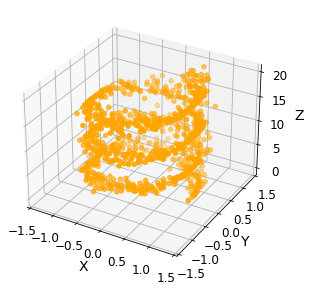

In [4]:
if scenario in ("3d", "helix"):
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    print("X_train= x,y",X_train.shape)
    print("y_train= z",y_train.shape)

    ax = plt.subplot(projection='3d')
    plt.xlim([-1.5,1.5])
    plt.ylim([-1.5,1.5])
    ax.scatter(X_train[:,0], X_train[:,1], y_train, c='orange')
    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    plt.tight_layout()

    
else:
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    plt.scatter(X_train,y_train, c='orange', label='Sample Data')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()

In [5]:
os.system('mkdir Dataset')
os.system('mkdir GANS')
os.system('mkdir GANS/Models')
os.system('mkdir GANS/Losses')
os.system('mkdir GANS/Random_test')
export_excel(X_train, 'Dataset/X_train')
export_excel(y_train, 'Dataset/y_train')

# print(X_train.shape,y_train.shape)
X_train = import_excel('Dataset/X_train')
y_train = import_excel('Dataset/y_train')

print('made dataset')

made dataset


# WGAN

### Architecture

In [6]:
if n_features==3:
    generator=network_3D.build_generator(latent_space, n_var, n_features,use_bias)
    generator.summary()

    discriminator=network_3D.build_critic(n_var, use_bias, n_features)
    discriminator.summary()
    
else:
    generator=network_2D.build_generator(latent_space, n_var, n_features,use_bias)
    generator.summary()

    discriminator=network_2D.build_critic(n_var, use_bias, n_features)
    discriminator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                30000     
_________________________________________________________________
batch_normalization (BatchNo (None, 30)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
batch_normalization_1 (Batch (None, 10)                40        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
batch_normalization_2 (Batch (None, 10)                40        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 3

In [7]:
if n_features==3:
    wgan = WGAN_Model_3D.WGAN(n_features,latent_space,BATCH_SIZE,n_var,use_bias)
else:
    wgan = WGAN_Model_2D.WGAN(n_features,latent_space,BATCH_SIZE,n_var,use_bias)
    
wgan.wgan.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 3)                 30650     
_________________________________________________________________
sequential_3 (Sequential)    (None, 1)                 2561      
Total params: 33,211
Trainable params: 33,111
Non-trainable params: 100
_________________________________________________________________


### Preprocessing

In [8]:
train_dataset, scaler, X_train_scaled = wgan.preproc(X_train, y_train, scaled)

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_train_scaled",X_train_scaled.shape)

data shape_1 (100, 3)
data shape_2 (100, 3)
data shape_3 (100, 3)
data shape_4 (100, 3)
data shape_5 (100, 3)
data shape_6 (100, 3)
data shape_7 (100, 3)
data shape_8 (100, 3)
data shape_9 (100, 3)
data shape_10 (100, 3)
Cycles:  10
X_train (1000, 2)
y_train (1000, 1)
X_train_scaled (1000, 3)


In [9]:
for data in train_dataset:
    print('train_dataset',data.shape)

train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)


## Training

In [10]:
hist = wgan.train(train_dataset, epochs, scaler, scaled, X_train, y_train)

Epoch 1/50000
critic: 3.229542 - generator: -0.036461 - 3s
Epoch 2/50000
critic: 0.575856 - generator: -0.016403 - 0s
Epoch 3/50000
critic: 0.116816 - generator: -0.011285 - 0s
Epoch 4/50000
critic: 0.054383 - generator: -0.013798 - 0s
Epoch 5/50000
critic: 0.042191 - generator: -0.022000 - 0s
Epoch 6/50000
critic: 0.039193 - generator: -0.024006 - 0s
Epoch 7/50000
critic: 0.024923 - generator: -0.029463 - 0s
Epoch 8/50000
critic: 0.038916 - generator: -0.034516 - 0s
Epoch 9/50000
critic: 0.022796 - generator: -0.044695 - 0s
Epoch 10/50000
critic: 0.029128 - generator: -0.051535 - 0s
Epoch 11/50000
critic: 0.017627 - generator: -0.060408 - 0s
Epoch 12/50000
critic: 0.016412 - generator: -0.067942 - 0s
Epoch 13/50000
critic: 0.017184 - generator: -0.074022 - 0s
Epoch 14/50000
critic: 0.028104 - generator: -0.078588 - 0s
Epoch 15/50000
critic: 0.027240 - generator: -0.086572 - 0s
Epoch 16/50000
critic: 0.014098 - generator: -0.090347 - 0s
Epoch 17/50000
critic: 0.010404 - generator: -0.0

critic: 0.012237 - generator: -0.164042 - 0s
Epoch 138/50000
critic: 0.013593 - generator: -0.160183 - 0s
Epoch 139/50000
critic: 0.015712 - generator: -0.160484 - 0s
Epoch 140/50000
critic: 0.022160 - generator: -0.162634 - 0s
Epoch 141/50000
critic: 0.008633 - generator: -0.159259 - 0s
Epoch 142/50000
critic: 0.021288 - generator: -0.162210 - 0s
Epoch 143/50000
critic: 0.017182 - generator: -0.164909 - 0s
Epoch 144/50000
critic: 0.009600 - generator: -0.154146 - 0s
Epoch 145/50000
critic: 0.014881 - generator: -0.160366 - 0s
Epoch 146/50000
critic: 0.014194 - generator: -0.163676 - 0s
Epoch 147/50000
critic: 0.017693 - generator: -0.158659 - 0s
Epoch 148/50000
critic: 0.010467 - generator: -0.156022 - 0s
Epoch 149/50000
critic: 0.014062 - generator: -0.160368 - 0s
Epoch 150/50000
critic: 0.013448 - generator: -0.155465 - 0s
Epoch 151/50000
critic: 0.014565 - generator: -0.162115 - 0s
Epoch 152/50000
critic: 0.010208 - generator: -0.156455 - 0s
Epoch 153/50000
critic: 0.008956 - gener

critic: 0.017869 - generator: -0.169242 - 0s
Epoch 273/50000
critic: 0.018370 - generator: -0.175742 - 0s
Epoch 274/50000
critic: 0.011731 - generator: -0.178793 - 0s
Epoch 275/50000
critic: 0.015050 - generator: -0.176369 - 0s
Epoch 276/50000
critic: 0.012553 - generator: -0.176404 - 0s
Epoch 277/50000
critic: 0.008337 - generator: -0.177644 - 0s
Epoch 278/50000
critic: 0.014905 - generator: -0.174524 - 0s
Epoch 279/50000
critic: 0.013116 - generator: -0.169119 - 0s
Epoch 280/50000
critic: 0.010592 - generator: -0.170657 - 0s
Epoch 281/50000
critic: 0.006317 - generator: -0.172242 - 0s
Epoch 282/50000
critic: 0.016239 - generator: -0.175274 - 0s
Epoch 283/50000
critic: 0.010253 - generator: -0.174635 - 0s
Epoch 284/50000
critic: 0.014671 - generator: -0.176045 - 0s
Epoch 285/50000
critic: 0.010884 - generator: -0.179867 - 0s
Epoch 286/50000
critic: 0.009981 - generator: -0.182969 - 0s
Epoch 287/50000
critic: 0.012323 - generator: -0.175323 - 0s
Epoch 288/50000
critic: 0.012539 - gener

critic: 0.017041 - generator: -0.143964 - 0s
Epoch 408/50000
critic: 0.011831 - generator: -0.148829 - 0s
Epoch 409/50000
critic: 0.012181 - generator: -0.144863 - 0s
Epoch 410/50000
critic: 0.015873 - generator: -0.141579 - 0s
Epoch 411/50000
critic: 0.010169 - generator: -0.145994 - 0s
Epoch 412/50000
critic: 0.013060 - generator: -0.143262 - 0s
Epoch 413/50000
critic: 0.008976 - generator: -0.139425 - 0s
Epoch 414/50000
critic: 0.008408 - generator: -0.144914 - 0s
Epoch 415/50000
critic: 0.013368 - generator: -0.144163 - 0s
Epoch 416/50000
critic: 0.010280 - generator: -0.144629 - 0s
Epoch 417/50000
critic: 0.009436 - generator: -0.142468 - 0s
Epoch 418/50000
critic: 0.016971 - generator: -0.139925 - 0s
Epoch 419/50000
critic: 0.018601 - generator: -0.142062 - 0s
Epoch 420/50000
critic: 0.009205 - generator: -0.143267 - 0s
Epoch 421/50000
critic: 0.011530 - generator: -0.139990 - 0s
Epoch 422/50000
critic: 0.011525 - generator: -0.139285 - 0s
Epoch 423/50000
critic: 0.007633 - gener

critic: 0.010583 - generator: -0.119166 - 0s
Epoch 543/50000
critic: 0.017694 - generator: -0.119412 - 0s
Epoch 544/50000
critic: 0.006991 - generator: -0.125952 - 0s
Epoch 545/50000
critic: 0.017320 - generator: -0.120409 - 0s
Epoch 546/50000
critic: 0.016128 - generator: -0.118470 - 0s
Epoch 547/50000
critic: 0.007862 - generator: -0.118869 - 0s
Epoch 548/50000
critic: 0.011184 - generator: -0.116349 - 0s
Epoch 549/50000
critic: 0.011258 - generator: -0.113977 - 0s
Epoch 550/50000
critic: 0.005447 - generator: -0.115098 - 0s
Epoch 551/50000
critic: 0.015231 - generator: -0.113470 - 0s
Epoch 552/50000
critic: 0.010138 - generator: -0.115439 - 0s
Epoch 553/50000
critic: 0.010838 - generator: -0.119811 - 0s
Epoch 554/50000
critic: 0.009568 - generator: -0.111446 - 0s
Epoch 555/50000
critic: 0.004905 - generator: -0.115765 - 0s
Epoch 556/50000
critic: 0.008562 - generator: -0.120212 - 0s
Epoch 557/50000
critic: 0.004617 - generator: -0.115632 - 0s
Epoch 558/50000
critic: 0.011288 - gener

critic: 0.009445 - generator: -0.115625 - 0s
Epoch 678/50000
critic: 0.009550 - generator: -0.111731 - 0s
Epoch 679/50000
critic: 0.011357 - generator: -0.107191 - 0s
Epoch 680/50000
critic: 0.010888 - generator: -0.107978 - 0s
Epoch 681/50000
critic: 0.013814 - generator: -0.104581 - 0s
Epoch 682/50000
critic: 0.013051 - generator: -0.104280 - 0s
Epoch 683/50000
critic: 0.011496 - generator: -0.107713 - 0s
Epoch 684/50000
critic: 0.011425 - generator: -0.105001 - 0s
Epoch 685/50000
critic: 0.011773 - generator: -0.105466 - 0s
Epoch 686/50000
critic: 0.012321 - generator: -0.104911 - 0s
Epoch 687/50000
critic: 0.012061 - generator: -0.099296 - 0s
Epoch 688/50000
critic: 0.008972 - generator: -0.102902 - 0s
Epoch 689/50000
critic: 0.011098 - generator: -0.099742 - 0s
Epoch 690/50000
critic: 0.011711 - generator: -0.097091 - 0s
Epoch 691/50000
critic: 0.012591 - generator: -0.090093 - 0s
Epoch 692/50000
critic: 0.008805 - generator: -0.094498 - 0s
Epoch 693/50000
critic: 0.010860 - gener

critic: 0.004932 - generator: -0.085980 - 0s
Epoch 813/50000
critic: 0.009704 - generator: -0.087647 - 0s
Epoch 814/50000
critic: 0.009568 - generator: -0.090268 - 0s
Epoch 815/50000
critic: 0.009416 - generator: -0.085738 - 0s
Epoch 816/50000
critic: 0.007953 - generator: -0.086966 - 0s
Epoch 817/50000
critic: 0.009925 - generator: -0.089658 - 0s
Epoch 818/50000
critic: 0.003814 - generator: -0.084014 - 0s
Epoch 819/50000
critic: 0.010941 - generator: -0.076979 - 0s
Epoch 820/50000
critic: 0.008424 - generator: -0.086406 - 0s
Epoch 821/50000
critic: 0.008020 - generator: -0.086649 - 0s
Epoch 822/50000
critic: 0.013838 - generator: -0.082103 - 0s
Epoch 823/50000
critic: 0.008017 - generator: -0.082270 - 0s
Epoch 824/50000
critic: 0.004813 - generator: -0.081623 - 0s
Epoch 825/50000
critic: 0.008467 - generator: -0.079618 - 0s
Epoch 826/50000
critic: 0.010287 - generator: -0.084421 - 0s
Epoch 827/50000
critic: 0.004994 - generator: -0.083420 - 0s
Epoch 828/50000
critic: 0.006000 - gener

critic: 0.008542 - generator: -0.079508 - 0s
Epoch 948/50000
critic: 0.012834 - generator: -0.074616 - 1s
Epoch 949/50000
critic: 0.009182 - generator: -0.075705 - 0s
Epoch 950/50000
critic: 0.007868 - generator: -0.074566 - 1s
Epoch 951/50000
critic: 0.004978 - generator: -0.071802 - 1s
Epoch 952/50000
critic: 0.008152 - generator: -0.074161 - 1s
Epoch 953/50000
critic: 0.007043 - generator: -0.075454 - 0s
Epoch 954/50000
critic: 0.010242 - generator: -0.076715 - 0s
Epoch 955/50000
critic: 0.009358 - generator: -0.069695 - 1s
Epoch 956/50000
critic: 0.009441 - generator: -0.070181 - 1s
Epoch 957/50000
critic: 0.009304 - generator: -0.071077 - 0s
Epoch 958/50000
critic: 0.005291 - generator: -0.074908 - 0s
Epoch 959/50000
critic: 0.008566 - generator: -0.071669 - 0s
Epoch 960/50000
critic: 0.004668 - generator: -0.073794 - 0s
Epoch 961/50000
critic: 0.005678 - generator: -0.077125 - 0s
Epoch 962/50000
critic: 0.009923 - generator: -0.075373 - 0s
Epoch 963/50000
critic: 0.009131 - gener

critic: 0.009313 - generator: -0.068414 - 1s
Epoch 1081/50000
critic: 0.005490 - generator: -0.068582 - 0s
Epoch 1082/50000
critic: 0.004830 - generator: -0.069064 - 0s
Epoch 1083/50000
critic: 0.006262 - generator: -0.066720 - 0s
Epoch 1084/50000
critic: 0.004110 - generator: -0.068737 - 0s
Epoch 1085/50000
critic: 0.006859 - generator: -0.067316 - 0s
Epoch 1086/50000
critic: 0.011770 - generator: -0.064445 - 0s
Epoch 1087/50000
critic: 0.004122 - generator: -0.065307 - 0s
Epoch 1088/50000
critic: 0.009761 - generator: -0.065156 - 1s
Epoch 1089/50000
critic: 0.009210 - generator: -0.064437 - 1s
Epoch 1090/50000
critic: 0.006714 - generator: -0.060486 - 1s
Epoch 1091/50000
critic: 0.006002 - generator: -0.066961 - 1s
Epoch 1092/50000
critic: 0.005480 - generator: -0.065116 - 1s
Epoch 1093/50000
critic: 0.007297 - generator: -0.069240 - 1s
Epoch 1094/50000
critic: 0.004626 - generator: -0.065956 - 1s
Epoch 1095/50000
critic: 0.008154 - generator: -0.070794 - 1s
Epoch 1096/50000
critic: 

critic: 0.007421 - generator: -0.061366 - 0s
Epoch 1214/50000
critic: 0.011774 - generator: -0.057516 - 0s
Epoch 1215/50000
critic: 0.004994 - generator: -0.056742 - 0s
Epoch 1216/50000
critic: 0.008675 - generator: -0.060445 - 0s
Epoch 1217/50000
critic: 0.010065 - generator: -0.059023 - 0s
Epoch 1218/50000
critic: 0.006724 - generator: -0.059596 - 0s
Epoch 1219/50000
critic: 0.007173 - generator: -0.056392 - 0s
Epoch 1220/50000
critic: 0.004293 - generator: -0.057012 - 0s
Epoch 1221/50000
critic: 0.006407 - generator: -0.060589 - 0s
Epoch 1222/50000
critic: 0.007198 - generator: -0.058367 - 0s
Epoch 1223/50000
critic: 0.007840 - generator: -0.055687 - 0s
Epoch 1224/50000
critic: 0.008397 - generator: -0.059013 - 0s
Epoch 1225/50000
critic: 0.006827 - generator: -0.055066 - 0s
Epoch 1226/50000
critic: 0.008340 - generator: -0.053997 - 0s
Epoch 1227/50000
critic: 0.007062 - generator: -0.056543 - 0s
Epoch 1228/50000
critic: 0.003293 - generator: -0.057541 - 0s
Epoch 1229/50000
critic: 

critic: 0.004927 - generator: -0.048635 - 1s
Epoch 1347/50000
critic: 0.008994 - generator: -0.048309 - 1s
Epoch 1348/50000
critic: 0.007098 - generator: -0.046432 - 1s
Epoch 1349/50000
critic: 0.005777 - generator: -0.047516 - 1s
Epoch 1350/50000
critic: 0.006389 - generator: -0.047569 - 1s
Epoch 1351/50000
critic: 0.005318 - generator: -0.047948 - 1s
Epoch 1352/50000
critic: 0.006640 - generator: -0.051366 - 1s
Epoch 1353/50000
critic: 0.008398 - generator: -0.051024 - 1s
Epoch 1354/50000
critic: 0.010652 - generator: -0.051611 - 1s
Epoch 1355/50000
critic: 0.005125 - generator: -0.049894 - 1s
Epoch 1356/50000
critic: 0.005954 - generator: -0.046806 - 1s
Epoch 1357/50000
critic: 0.008256 - generator: -0.045396 - 1s
Epoch 1358/50000
critic: 0.009139 - generator: -0.044723 - 1s
Epoch 1359/50000
critic: 0.008446 - generator: -0.045850 - 1s
Epoch 1360/50000
critic: 0.009446 - generator: -0.047298 - 1s
Epoch 1361/50000
critic: 0.008988 - generator: -0.046666 - 1s
Epoch 1362/50000
critic: 

critic: 0.009367 - generator: -0.054602 - 0s
Epoch 1480/50000
critic: 0.007515 - generator: -0.055001 - 1s
Epoch 1481/50000
critic: 0.009891 - generator: -0.058232 - 0s
Epoch 1482/50000
critic: 0.009352 - generator: -0.057749 - 1s
Epoch 1483/50000
critic: 0.008293 - generator: -0.053620 - 1s
Epoch 1484/50000
critic: 0.007448 - generator: -0.053816 - 1s
Epoch 1485/50000
critic: 0.007706 - generator: -0.055159 - 1s
Epoch 1486/50000
critic: 0.007928 - generator: -0.057122 - 1s
Epoch 1487/50000
critic: 0.006712 - generator: -0.055834 - 1s
Epoch 1488/50000
critic: 0.006466 - generator: -0.055404 - 1s
Epoch 1489/50000
critic: 0.008188 - generator: -0.054885 - 0s
Epoch 1490/50000
critic: 0.006765 - generator: -0.050601 - 1s
Epoch 1491/50000
critic: 0.007757 - generator: -0.051705 - 1s
Epoch 1492/50000
critic: 0.007034 - generator: -0.047163 - 1s
Epoch 1493/50000
critic: 0.007300 - generator: -0.051883 - 1s
Epoch 1494/50000
critic: 0.006665 - generator: -0.049236 - 1s
Epoch 1495/50000
critic: 

critic: 0.007927 - generator: -0.036915 - 0s
Epoch 1613/50000
critic: 0.008074 - generator: -0.035415 - 0s
Epoch 1614/50000
critic: 0.008046 - generator: -0.035040 - 1s
Epoch 1615/50000
critic: 0.009497 - generator: -0.039228 - 1s
Epoch 1616/50000
critic: 0.004797 - generator: -0.037040 - 1s
Epoch 1617/50000
critic: 0.006586 - generator: -0.031586 - 1s
Epoch 1618/50000
critic: 0.011305 - generator: -0.035075 - 1s
Epoch 1619/50000
critic: 0.003155 - generator: -0.037074 - 1s
Epoch 1620/50000
critic: 0.007424 - generator: -0.040010 - 1s
Epoch 1621/50000
critic: 0.005006 - generator: -0.038408 - 0s
Epoch 1622/50000
critic: 0.003878 - generator: -0.040298 - 1s
Epoch 1623/50000
critic: 0.006128 - generator: -0.041216 - 1s
Epoch 1624/50000
critic: 0.004401 - generator: -0.041014 - 0s
Epoch 1625/50000
critic: 0.008069 - generator: -0.041360 - 1s
Epoch 1626/50000
critic: 0.007217 - generator: -0.041968 - 0s
Epoch 1627/50000
critic: 0.004961 - generator: -0.043466 - 0s
Epoch 1628/50000
critic: 

critic: 0.005529 - generator: -0.044758 - 0s
Epoch 1746/50000
critic: 0.008350 - generator: -0.042979 - 0s
Epoch 1747/50000
critic: 0.009178 - generator: -0.039761 - 0s
Epoch 1748/50000
critic: 0.009136 - generator: -0.039336 - 0s
Epoch 1749/50000
critic: 0.005856 - generator: -0.042410 - 0s
Epoch 1750/50000
critic: 0.006773 - generator: -0.040199 - 0s
Epoch 1751/50000
critic: 0.009733 - generator: -0.037494 - 0s
Epoch 1752/50000
critic: 0.007886 - generator: -0.040059 - 0s
Epoch 1753/50000
critic: 0.005940 - generator: -0.041922 - 0s
Epoch 1754/50000
critic: 0.002821 - generator: -0.039191 - 0s
Epoch 1755/50000
critic: 0.007183 - generator: -0.038459 - 0s
Epoch 1756/50000
critic: 0.010284 - generator: -0.040018 - 0s
Epoch 1757/50000
critic: 0.006301 - generator: -0.039534 - 0s
Epoch 1758/50000
critic: 0.003392 - generator: -0.040896 - 0s
Epoch 1759/50000
critic: 0.009027 - generator: -0.038936 - 0s
Epoch 1760/50000
critic: 0.005223 - generator: -0.039839 - 0s
Epoch 1761/50000
critic: 

critic: 0.007609 - generator: -0.033741 - 0s
Epoch 1879/50000
critic: 0.004267 - generator: -0.036105 - 0s
Epoch 1880/50000
critic: 0.005686 - generator: -0.033805 - 0s
Epoch 1881/50000
critic: 0.003449 - generator: -0.029434 - 0s
Epoch 1882/50000
critic: 0.007565 - generator: -0.031779 - 0s
Epoch 1883/50000
critic: 0.005332 - generator: -0.030179 - 0s
Epoch 1884/50000
critic: 0.007142 - generator: -0.036498 - 0s
Epoch 1885/50000
critic: 0.005209 - generator: -0.034283 - 0s
Epoch 1886/50000
critic: 0.004016 - generator: -0.034660 - 0s
Epoch 1887/50000
critic: 0.006984 - generator: -0.033085 - 0s
Epoch 1888/50000
critic: 0.009105 - generator: -0.035368 - 0s
Epoch 1889/50000
critic: 0.006925 - generator: -0.031452 - 0s
Epoch 1890/50000
critic: 0.005782 - generator: -0.033225 - 0s
Epoch 1891/50000
critic: 0.003586 - generator: -0.035844 - 0s
Epoch 1892/50000
critic: 0.004821 - generator: -0.036458 - 0s
Epoch 1893/50000
critic: 0.006390 - generator: -0.034994 - 0s
Epoch 1894/50000
critic: 

critic: 0.005700 - generator: -0.025354 - 0s
Epoch 2012/50000
critic: 0.004157 - generator: -0.026902 - 0s
Epoch 2013/50000
critic: 0.007788 - generator: -0.023706 - 0s
Epoch 2014/50000
critic: 0.008746 - generator: -0.026552 - 0s
Epoch 2015/50000
critic: 0.008927 - generator: -0.020634 - 0s
Epoch 2016/50000
critic: 0.007493 - generator: -0.023128 - 0s
Epoch 2017/50000
critic: 0.007915 - generator: -0.024768 - 0s
Epoch 2018/50000
critic: 0.004865 - generator: -0.022024 - 0s
Epoch 2019/50000
critic: 0.007352 - generator: -0.023307 - 0s
Epoch 2020/50000
critic: 0.009085 - generator: -0.023611 - 0s
Epoch 2021/50000
critic: 0.004712 - generator: -0.021545 - 0s
Epoch 2022/50000
critic: 0.009664 - generator: -0.023991 - 0s
Epoch 2023/50000
critic: 0.008986 - generator: -0.021374 - 0s
Epoch 2024/50000
critic: 0.005193 - generator: -0.025741 - 0s
Epoch 2025/50000
critic: 0.007194 - generator: -0.021661 - 0s
Epoch 2026/50000
critic: 0.007095 - generator: -0.022506 - 0s
Epoch 2027/50000
critic: 

critic: 0.010618 - generator: -0.017825 - 0s
Epoch 2145/50000
critic: 0.006333 - generator: -0.015754 - 0s
Epoch 2146/50000
critic: 0.005922 - generator: -0.015130 - 0s
Epoch 2147/50000
critic: 0.007641 - generator: -0.014919 - 0s
Epoch 2148/50000
critic: 0.008877 - generator: -0.016561 - 0s
Epoch 2149/50000
critic: 0.005031 - generator: -0.012127 - 0s
Epoch 2150/50000
critic: 0.008504 - generator: -0.014894 - 0s
Epoch 2151/50000
critic: 0.008192 - generator: -0.011930 - 0s
Epoch 2152/50000
critic: 0.006607 - generator: -0.014718 - 0s
Epoch 2153/50000
critic: 0.005925 - generator: -0.013643 - 0s
Epoch 2154/50000
critic: 0.006768 - generator: -0.018693 - 0s
Epoch 2155/50000
critic: 0.006581 - generator: -0.011840 - 0s
Epoch 2156/50000
critic: 0.009819 - generator: -0.011000 - 0s
Epoch 2157/50000
critic: 0.008125 - generator: -0.012566 - 0s
Epoch 2158/50000
critic: 0.004096 - generator: -0.012079 - 0s
Epoch 2159/50000
critic: 0.006766 - generator: -0.010802 - 0s
Epoch 2160/50000
critic: 

critic: 0.007156 - generator: -0.001559 - 0s
Epoch 2278/50000
critic: 0.006980 - generator: 0.001234 - 0s
Epoch 2279/50000
critic: 0.003252 - generator: -0.001315 - 0s
Epoch 2280/50000
critic: 0.008324 - generator: -0.002454 - 0s
Epoch 2281/50000
critic: 0.010424 - generator: -0.001682 - 0s
Epoch 2282/50000
critic: 0.007123 - generator: -0.000950 - 0s
Epoch 2283/50000
critic: 0.007520 - generator: -0.001156 - 0s
Epoch 2284/50000
critic: 0.006440 - generator: -0.002730 - 0s
Epoch 2285/50000
critic: 0.005564 - generator: -0.000456 - 0s
Epoch 2286/50000
critic: 0.006338 - generator: -0.003320 - 0s
Epoch 2287/50000
critic: 0.007690 - generator: -0.004128 - 0s
Epoch 2288/50000
critic: 0.008081 - generator: -0.003011 - 0s
Epoch 2289/50000
critic: 0.007027 - generator: -0.005177 - 0s
Epoch 2290/50000
critic: 0.007671 - generator: -0.001387 - 0s
Epoch 2291/50000
critic: 0.008561 - generator: -0.001016 - 0s
Epoch 2292/50000
critic: 0.004401 - generator: -0.001663 - 0s
Epoch 2293/50000
critic: 0

critic: 0.004199 - generator: 0.020171 - 0s
Epoch 2412/50000
critic: 0.005315 - generator: 0.019179 - 0s
Epoch 2413/50000
critic: 0.004282 - generator: 0.019351 - 0s
Epoch 2414/50000
critic: 0.004654 - generator: 0.017938 - 0s
Epoch 2415/50000
critic: 0.004170 - generator: 0.018469 - 0s
Epoch 2416/50000
critic: 0.006672 - generator: 0.021738 - 0s
Epoch 2417/50000
critic: 0.006222 - generator: 0.024821 - 0s
Epoch 2418/50000
critic: 0.008095 - generator: 0.023527 - 0s
Epoch 2419/50000
critic: 0.008949 - generator: 0.022118 - 0s
Epoch 2420/50000
critic: 0.006341 - generator: 0.018326 - 0s
Epoch 2421/50000
critic: 0.008195 - generator: 0.021953 - 0s
Epoch 2422/50000
critic: 0.005109 - generator: 0.022383 - 0s
Epoch 2423/50000
critic: 0.005227 - generator: 0.022446 - 0s
Epoch 2424/50000
critic: 0.006474 - generator: 0.021616 - 0s
Epoch 2425/50000
critic: 0.006744 - generator: 0.020900 - 0s
Epoch 2426/50000
critic: 0.004074 - generator: 0.024648 - 0s
Epoch 2427/50000
critic: 0.008586 - gener

critic: 0.005984 - generator: 0.027722 - 0s
Epoch 2547/50000
critic: 0.006273 - generator: 0.025958 - 0s
Epoch 2548/50000
critic: 0.006578 - generator: 0.028867 - 0s
Epoch 2549/50000
critic: 0.006470 - generator: 0.028462 - 0s
Epoch 2550/50000
critic: 0.008259 - generator: 0.025851 - 0s
Epoch 2551/50000
critic: 0.006259 - generator: 0.023529 - 0s
Epoch 2552/50000
critic: 0.008927 - generator: 0.025662 - 0s
Epoch 2553/50000
critic: 0.004864 - generator: 0.024900 - 0s
Epoch 2554/50000
critic: 0.006105 - generator: 0.022812 - 0s
Epoch 2555/50000
critic: 0.009665 - generator: 0.020672 - 0s
Epoch 2556/50000
critic: 0.006845 - generator: 0.017729 - 0s
Epoch 2557/50000
critic: 0.007021 - generator: 0.021620 - 0s
Epoch 2558/50000
critic: 0.006922 - generator: 0.020139 - 0s
Epoch 2559/50000
critic: 0.008352 - generator: 0.024216 - 0s
Epoch 2560/50000
critic: 0.004199 - generator: 0.021512 - 0s
Epoch 2561/50000
critic: 0.006473 - generator: 0.021920 - 0s
Epoch 2562/50000
critic: 0.005206 - gener

critic: 0.007040 - generator: 0.033308 - 0s
Epoch 2682/50000
critic: 0.006197 - generator: 0.035692 - 0s
Epoch 2683/50000
critic: 0.007567 - generator: 0.034465 - 0s
Epoch 2684/50000
critic: 0.007510 - generator: 0.032489 - 0s
Epoch 2685/50000
critic: 0.007038 - generator: 0.031677 - 0s
Epoch 2686/50000
critic: 0.007892 - generator: 0.034148 - 0s
Epoch 2687/50000
critic: 0.008390 - generator: 0.033578 - 0s
Epoch 2688/50000
critic: 0.005884 - generator: 0.030873 - 0s
Epoch 2689/50000
critic: 0.006394 - generator: 0.033538 - 0s
Epoch 2690/50000
critic: 0.011073 - generator: 0.035870 - 0s
Epoch 2691/50000
critic: 0.004467 - generator: 0.038299 - 0s
Epoch 2692/50000
critic: 0.008328 - generator: 0.037897 - 0s
Epoch 2693/50000
critic: 0.006496 - generator: 0.037297 - 0s
Epoch 2694/50000
critic: 0.006052 - generator: 0.039185 - 0s
Epoch 2695/50000
critic: 0.006188 - generator: 0.039103 - 0s
Epoch 2696/50000
critic: 0.008941 - generator: 0.040946 - 0s
Epoch 2697/50000
critic: 0.005059 - gener

critic: 0.004686 - generator: 0.034505 - 0s
Epoch 2817/50000
critic: 0.005225 - generator: 0.032319 - 0s
Epoch 2818/50000
critic: 0.006905 - generator: 0.032173 - 0s
Epoch 2819/50000
critic: 0.007409 - generator: 0.037107 - 0s
Epoch 2820/50000
critic: 0.004952 - generator: 0.036186 - 0s
Epoch 2821/50000
critic: 0.006484 - generator: 0.040680 - 0s
Epoch 2822/50000
critic: 0.003922 - generator: 0.045593 - 0s
Epoch 2823/50000
critic: 0.003815 - generator: 0.049654 - 0s
Epoch 2824/50000
critic: 0.005875 - generator: 0.050700 - 0s
Epoch 2825/50000
critic: 0.006621 - generator: 0.051638 - 0s
Epoch 2826/50000
critic: 0.005982 - generator: 0.049655 - 0s
Epoch 2827/50000
critic: 0.002836 - generator: 0.048768 - 0s
Epoch 2828/50000
critic: 0.008603 - generator: 0.045830 - 0s
Epoch 2829/50000
critic: 0.005648 - generator: 0.046676 - 0s
Epoch 2830/50000
critic: 0.004894 - generator: 0.045893 - 0s
Epoch 2831/50000
critic: 0.004719 - generator: 0.042471 - 0s
Epoch 2832/50000
critic: 0.006036 - gener

critic: 0.005057 - generator: 0.043347 - 0s
Epoch 2952/50000
critic: 0.005060 - generator: 0.038994 - 0s
Epoch 2953/50000
critic: 0.004313 - generator: 0.043575 - 0s
Epoch 2954/50000
critic: 0.005085 - generator: 0.040282 - 0s
Epoch 2955/50000
critic: 0.003228 - generator: 0.036584 - 0s
Epoch 2956/50000
critic: 0.007717 - generator: 0.039240 - 0s
Epoch 2957/50000
critic: 0.005759 - generator: 0.033842 - 0s
Epoch 2958/50000
critic: 0.007478 - generator: 0.032194 - 0s
Epoch 2959/50000
critic: 0.004178 - generator: 0.034753 - 0s
Epoch 2960/50000
critic: 0.007665 - generator: 0.033286 - 0s
Epoch 2961/50000
critic: 0.004306 - generator: 0.032567 - 0s
Epoch 2962/50000
critic: 0.007495 - generator: 0.034794 - 0s
Epoch 2963/50000
critic: 0.006700 - generator: 0.032080 - 0s
Epoch 2964/50000
critic: 0.005296 - generator: 0.034540 - 0s
Epoch 2965/50000
critic: 0.005867 - generator: 0.032459 - 0s
Epoch 2966/50000
critic: 0.005742 - generator: 0.033379 - 0s
Epoch 2967/50000
critic: 0.006345 - gener

critic: 0.006450 - generator: 0.049272 - 0s
Epoch 3087/50000
critic: 0.006092 - generator: 0.046557 - 0s
Epoch 3088/50000
critic: 0.006784 - generator: 0.046029 - 0s
Epoch 3089/50000
critic: 0.005552 - generator: 0.046300 - 0s
Epoch 3090/50000
critic: 0.004777 - generator: 0.045237 - 0s
Epoch 3091/50000
critic: 0.006100 - generator: 0.042180 - 0s
Epoch 3092/50000
critic: 0.008282 - generator: 0.046910 - 0s
Epoch 3093/50000
critic: 0.006821 - generator: 0.045815 - 0s
Epoch 3094/50000
critic: 0.005910 - generator: 0.046606 - 0s
Epoch 3095/50000
critic: 0.006614 - generator: 0.045697 - 0s
Epoch 3096/50000
critic: 0.005720 - generator: 0.048833 - 0s
Epoch 3097/50000
critic: 0.006979 - generator: 0.051796 - 0s
Epoch 3098/50000
critic: 0.005694 - generator: 0.051056 - 0s
Epoch 3099/50000
critic: 0.006574 - generator: 0.046985 - 0s
Epoch 3100/50000
critic: 0.006160 - generator: 0.049765 - 0s
Epoch 3101/50000
critic: 0.006113 - generator: 0.056261 - 0s
Epoch 3102/50000
critic: 0.005132 - gener

critic: 0.008405 - generator: 0.071102 - 0s
Epoch 3222/50000
critic: 0.007525 - generator: 0.070811 - 0s
Epoch 3223/50000
critic: 0.009031 - generator: 0.073742 - 0s
Epoch 3224/50000
critic: 0.005726 - generator: 0.076290 - 0s
Epoch 3225/50000
critic: 0.007061 - generator: 0.078176 - 0s
Epoch 3226/50000
critic: 0.005010 - generator: 0.080868 - 0s
Epoch 3227/50000
critic: 0.007176 - generator: 0.078692 - 0s
Epoch 3228/50000
critic: 0.007052 - generator: 0.079528 - 0s
Epoch 3229/50000
critic: 0.005072 - generator: 0.078860 - 0s
Epoch 3230/50000
critic: 0.009727 - generator: 0.079295 - 0s
Epoch 3231/50000
critic: 0.005019 - generator: 0.076709 - 0s
Epoch 3232/50000
critic: 0.004178 - generator: 0.076743 - 0s
Epoch 3233/50000
critic: 0.004449 - generator: 0.078781 - 0s
Epoch 3234/50000
critic: 0.007202 - generator: 0.078757 - 0s
Epoch 3235/50000
critic: 0.008144 - generator: 0.075872 - 0s
Epoch 3236/50000
critic: 0.004553 - generator: 0.079401 - 0s
Epoch 3237/50000
critic: 0.003678 - gener

critic: 0.003514 - generator: 0.093617 - 0s
Epoch 3357/50000
critic: 0.009370 - generator: 0.091173 - 0s
Epoch 3358/50000
critic: 0.002937 - generator: 0.089154 - 0s
Epoch 3359/50000
critic: 0.006206 - generator: 0.087176 - 0s
Epoch 3360/50000
critic: 0.005811 - generator: 0.084841 - 0s
Epoch 3361/50000
critic: 0.006523 - generator: 0.082311 - 0s
Epoch 3362/50000
critic: 0.004541 - generator: 0.078562 - 0s
Epoch 3363/50000
critic: 0.002707 - generator: 0.075114 - 0s
Epoch 3364/50000
critic: 0.004770 - generator: 0.073746 - 0s
Epoch 3365/50000
critic: 0.004291 - generator: 0.072747 - 0s
Epoch 3366/50000
critic: 0.005114 - generator: 0.072214 - 0s
Epoch 3367/50000
critic: 0.005269 - generator: 0.066809 - 0s
Epoch 3368/50000
critic: 0.006563 - generator: 0.071846 - 0s
Epoch 3369/50000
critic: 0.007651 - generator: 0.071074 - 0s
Epoch 3370/50000
critic: 0.005572 - generator: 0.069658 - 0s
Epoch 3371/50000
critic: 0.008377 - generator: 0.068879 - 0s
Epoch 3372/50000
critic: 0.006647 - gener

critic: 0.005876 - generator: 0.108342 - 0s
Epoch 3492/50000
critic: 0.010042 - generator: 0.108586 - 0s
Epoch 3493/50000
critic: 0.004529 - generator: 0.108858 - 0s
Epoch 3494/50000
critic: 0.004413 - generator: 0.111940 - 0s
Epoch 3495/50000
critic: 0.007097 - generator: 0.107853 - 0s
Epoch 3496/50000
critic: 0.008542 - generator: 0.110485 - 0s
Epoch 3497/50000
critic: 0.006157 - generator: 0.105715 - 0s
Epoch 3498/50000
critic: 0.009540 - generator: 0.104050 - 0s
Epoch 3499/50000
critic: 0.005588 - generator: 0.099505 - 0s
Epoch 3500/50000
critic: 0.006420 - generator: 0.098351 - 0s
Epoch 3501/50000
critic: 0.007405 - generator: 0.094928 - 0s
Epoch 3502/50000
critic: 0.004590 - generator: 0.092801 - 0s
Epoch 3503/50000
critic: 0.006934 - generator: 0.090259 - 0s
Epoch 3504/50000
critic: 0.006091 - generator: 0.091967 - 0s
Epoch 3505/50000
critic: 0.006154 - generator: 0.087504 - 0s
Epoch 3506/50000
critic: 0.008149 - generator: 0.087708 - 1s
Epoch 3507/50000
critic: 0.007385 - gener

critic: 0.006862 - generator: 0.082826 - 0s
Epoch 3627/50000
critic: 0.011615 - generator: 0.081242 - 0s
Epoch 3628/50000
critic: 0.008826 - generator: 0.081117 - 0s
Epoch 3629/50000
critic: 0.004825 - generator: 0.088536 - 0s
Epoch 3630/50000
critic: 0.002952 - generator: 0.088887 - 0s
Epoch 3631/50000
critic: 0.008873 - generator: 0.095757 - 0s
Epoch 3632/50000
critic: 0.010629 - generator: 0.097361 - 0s
Epoch 3633/50000
critic: 0.002912 - generator: 0.103830 - 0s
Epoch 3634/50000
critic: 0.003923 - generator: 0.111540 - 0s
Epoch 3635/50000
critic: 0.005510 - generator: 0.111740 - 0s
Epoch 3636/50000
critic: 0.006275 - generator: 0.111962 - 0s
Epoch 3637/50000
critic: 0.003499 - generator: 0.119095 - 0s
Epoch 3638/50000
critic: 0.005377 - generator: 0.121747 - 0s
Epoch 3639/50000
critic: 0.006251 - generator: 0.118562 - 0s
Epoch 3640/50000
critic: 0.003964 - generator: 0.126265 - 0s
Epoch 3641/50000
critic: 0.005349 - generator: 0.126537 - 0s
Epoch 3642/50000
critic: 0.008019 - gener

critic: 0.002927 - generator: 0.097546 - 0s
Epoch 3762/50000
critic: 0.002934 - generator: 0.093253 - 0s
Epoch 3763/50000
critic: 0.006135 - generator: 0.093905 - 0s
Epoch 3764/50000
critic: 0.004243 - generator: 0.089592 - 0s
Epoch 3765/50000
critic: 0.006404 - generator: 0.093230 - 0s
Epoch 3766/50000
critic: 0.006028 - generator: 0.094049 - 0s
Epoch 3767/50000
critic: 0.006047 - generator: 0.094577 - 0s
Epoch 3768/50000
critic: 0.007335 - generator: 0.096806 - 0s
Epoch 3769/50000
critic: 0.008306 - generator: 0.096485 - 0s
Epoch 3770/50000
critic: 0.008865 - generator: 0.097368 - 0s
Epoch 3771/50000
critic: 0.007545 - generator: 0.097940 - 0s
Epoch 3772/50000
critic: 0.007289 - generator: 0.095428 - 0s
Epoch 3773/50000
critic: 0.008960 - generator: 0.099405 - 0s
Epoch 3774/50000
critic: 0.007040 - generator: 0.099283 - 0s
Epoch 3775/50000
critic: 0.008711 - generator: 0.105811 - 0s
Epoch 3776/50000
critic: 0.005997 - generator: 0.107416 - 0s
Epoch 3777/50000
critic: 0.004541 - gener

critic: 0.005275 - generator: 0.133627 - 0s
Epoch 3897/50000
critic: 0.006103 - generator: 0.131738 - 0s
Epoch 3898/50000
critic: 0.009116 - generator: 0.136077 - 0s
Epoch 3899/50000
critic: 0.004920 - generator: 0.132946 - 0s
Epoch 3900/50000
critic: 0.007818 - generator: 0.131639 - 0s
Epoch 3901/50000
critic: 0.007910 - generator: 0.133135 - 0s
Epoch 3902/50000
critic: 0.004581 - generator: 0.122474 - 0s
Epoch 3903/50000
critic: 0.005815 - generator: 0.123089 - 0s
Epoch 3904/50000
critic: 0.005500 - generator: 0.120096 - 0s
Epoch 3905/50000
critic: 0.005563 - generator: 0.118113 - 0s
Epoch 3906/50000
critic: 0.007070 - generator: 0.114723 - 0s
Epoch 3907/50000
critic: 0.004012 - generator: 0.110419 - 0s
Epoch 3908/50000
critic: 0.006326 - generator: 0.105850 - 0s
Epoch 3909/50000
critic: 0.005628 - generator: 0.104290 - 0s
Epoch 3910/50000
critic: 0.000713 - generator: 0.102567 - 0s
Epoch 3911/50000
critic: -0.000365 - generator: 0.105987 - 0s
Epoch 3912/50000
critic: 0.001803 - gene

critic: 0.007985 - generator: 0.125474 - 0s
Epoch 4032/50000
critic: 0.005892 - generator: 0.129828 - 0s
Epoch 4033/50000
critic: 0.003393 - generator: 0.134598 - 0s
Epoch 4034/50000
critic: 0.005641 - generator: 0.139932 - 0s
Epoch 4035/50000
critic: 0.003381 - generator: 0.148365 - 0s
Epoch 4036/50000
critic: 0.002863 - generator: 0.147341 - 0s
Epoch 4037/50000
critic: 0.002716 - generator: 0.149442 - 0s
Epoch 4038/50000
critic: 0.005910 - generator: 0.150558 - 0s
Epoch 4039/50000
critic: 0.005288 - generator: 0.152998 - 0s
Epoch 4040/50000
critic: 0.003954 - generator: 0.156546 - 0s
Epoch 4041/50000
critic: 0.004493 - generator: 0.154808 - 0s
Epoch 4042/50000
critic: 0.004769 - generator: 0.155028 - 0s
Epoch 4043/50000
critic: 0.005015 - generator: 0.155318 - 1s
Epoch 4044/50000
critic: 0.006232 - generator: 0.150570 - 0s
Epoch 4045/50000
critic: 0.003636 - generator: 0.151795 - 0s
Epoch 4046/50000
critic: 0.007059 - generator: 0.147983 - 0s
Epoch 4047/50000
critic: 0.003008 - gener

critic: 0.003693 - generator: 0.146860 - 0s
Epoch 4167/50000
critic: 0.004657 - generator: 0.143818 - 0s
Epoch 4168/50000
critic: 0.007288 - generator: 0.143698 - 0s
Epoch 4169/50000
critic: 0.006915 - generator: 0.138878 - 0s
Epoch 4170/50000
critic: 0.006590 - generator: 0.136758 - 0s
Epoch 4171/50000
critic: 0.007408 - generator: 0.133889 - 0s
Epoch 4172/50000
critic: 0.001776 - generator: 0.128398 - 0s
Epoch 4173/50000
critic: 0.005689 - generator: 0.126801 - 0s
Epoch 4174/50000
critic: 0.003097 - generator: 0.123900 - 0s
Epoch 4175/50000
critic: 0.003468 - generator: 0.124318 - 0s
Epoch 4176/50000
critic: 0.003210 - generator: 0.123652 - 0s
Epoch 4177/50000
critic: 0.000999 - generator: 0.125561 - 0s
Epoch 4178/50000
critic: 0.003369 - generator: 0.124772 - 0s
Epoch 4179/50000
critic: 0.002773 - generator: 0.127020 - 0s
Epoch 4180/50000
critic: 0.005350 - generator: 0.128005 - 0s
Epoch 4181/50000
critic: 0.008392 - generator: 0.128058 - 0s
Epoch 4182/50000
critic: 0.004245 - gener

critic: 0.007221 - generator: 0.120862 - 0s
Epoch 4302/50000
critic: 0.008168 - generator: 0.124575 - 0s
Epoch 4303/50000
critic: 0.009372 - generator: 0.130248 - 0s
Epoch 4304/50000
critic: 0.012104 - generator: 0.134474 - 0s
Epoch 4305/50000
critic: 0.009201 - generator: 0.139426 - 0s
Epoch 4306/50000
critic: 0.011209 - generator: 0.142693 - 0s
Epoch 4307/50000
critic: 0.011575 - generator: 0.140813 - 0s
Epoch 4308/50000
critic: 0.011278 - generator: 0.140090 - 0s
Epoch 4309/50000
critic: 0.010668 - generator: 0.143088 - 0s
Epoch 4310/50000
critic: 0.007448 - generator: 0.143360 - 0s
Epoch 4311/50000
critic: 0.005261 - generator: 0.147710 - 0s
Epoch 4312/50000
critic: 0.001574 - generator: 0.152145 - 0s
Epoch 4313/50000
critic: 0.002738 - generator: 0.153998 - 0s
Epoch 4314/50000
critic: 0.002348 - generator: 0.161003 - 0s
Epoch 4315/50000
critic: 0.004279 - generator: 0.164287 - 0s
Epoch 4316/50000
critic: 0.004801 - generator: 0.160095 - 0s
Epoch 4317/50000
critic: 0.002082 - gener

critic: 0.005189 - generator: 0.182104 - 0s
Epoch 4437/50000
critic: 0.006192 - generator: 0.186726 - 0s
Epoch 4438/50000
critic: 0.007476 - generator: 0.184344 - 0s
Epoch 4439/50000
critic: 0.006910 - generator: 0.179369 - 0s
Epoch 4440/50000
critic: 0.011914 - generator: 0.178322 - 0s
Epoch 4441/50000
critic: 0.007626 - generator: 0.175079 - 0s
Epoch 4442/50000
critic: 0.004782 - generator: 0.174890 - 0s
Epoch 4443/50000
critic: 0.006303 - generator: 0.172051 - 0s
Epoch 4444/50000
critic: 0.005722 - generator: 0.170074 - 0s
Epoch 4445/50000
critic: 0.008205 - generator: 0.169087 - 0s
Epoch 4446/50000
critic: 0.008485 - generator: 0.170588 - 0s
Epoch 4447/50000
critic: 0.002845 - generator: 0.166124 - 0s
Epoch 4448/50000
critic: 0.006938 - generator: 0.163193 - 0s
Epoch 4449/50000
critic: 0.010291 - generator: 0.158308 - 0s
Epoch 4450/50000
critic: 0.006338 - generator: 0.158812 - 0s
Epoch 4451/50000
critic: 0.002168 - generator: 0.158759 - 0s
Epoch 4452/50000
critic: 0.002760 - gener

critic: 0.006692 - generator: 0.154296 - 0s
Epoch 4572/50000
critic: 0.005245 - generator: 0.154520 - 0s
Epoch 4573/50000
critic: 0.007535 - generator: 0.155158 - 0s
Epoch 4574/50000
critic: 0.004221 - generator: 0.157577 - 0s
Epoch 4575/50000
critic: 0.009083 - generator: 0.159861 - 0s
Epoch 4576/50000
critic: 0.007625 - generator: 0.161500 - 0s
Epoch 4577/50000
critic: 0.008954 - generator: 0.165591 - 0s
Epoch 4578/50000
critic: 0.008229 - generator: 0.163804 - 0s
Epoch 4579/50000
critic: 0.010609 - generator: 0.164578 - 0s
Epoch 4580/50000
critic: 0.006127 - generator: 0.168951 - 0s
Epoch 4581/50000
critic: 0.005031 - generator: 0.172729 - 0s
Epoch 4582/50000
critic: 0.003596 - generator: 0.180323 - 0s
Epoch 4583/50000
critic: 0.003147 - generator: 0.184725 - 0s
Epoch 4584/50000
critic: 0.005273 - generator: 0.184589 - 0s
Epoch 4585/50000
critic: 0.000225 - generator: 0.193667 - 0s
Epoch 4586/50000
critic: 0.007112 - generator: 0.195164 - 0s
Epoch 4587/50000
critic: 0.007220 - gener

critic: 0.006676 - generator: 0.218349 - 0s
Epoch 4707/50000
critic: 0.004901 - generator: 0.214182 - 0s
Epoch 4708/50000
critic: 0.007690 - generator: 0.209679 - 0s
Epoch 4709/50000
critic: 0.008304 - generator: 0.206485 - 0s
Epoch 4710/50000
critic: 0.006081 - generator: 0.201393 - 0s
Epoch 4711/50000
critic: 0.003815 - generator: 0.201564 - 0s
Epoch 4712/50000
critic: 0.005993 - generator: 0.196781 - 0s
Epoch 4713/50000
critic: 0.007827 - generator: 0.191263 - 0s
Epoch 4714/50000
critic: 0.005190 - generator: 0.193112 - 0s
Epoch 4715/50000
critic: 0.005353 - generator: 0.187575 - 0s
Epoch 4716/50000
critic: 0.003938 - generator: 0.190071 - 0s
Epoch 4717/50000
critic: 0.009008 - generator: 0.183710 - 0s
Epoch 4718/50000
critic: 0.007033 - generator: 0.188335 - 0s
Epoch 4719/50000
critic: 0.009174 - generator: 0.179573 - 0s
Epoch 4720/50000
critic: 0.006286 - generator: 0.175535 - 0s
Epoch 4721/50000
critic: 0.005319 - generator: 0.175554 - 0s
Epoch 4722/50000
critic: 0.005294 - gener

critic: 0.001759 - generator: 0.151361 - 0s
Epoch 4842/50000
critic: 0.005804 - generator: 0.155705 - 0s
Epoch 4843/50000
critic: 0.004485 - generator: 0.152561 - 0s
Epoch 4844/50000
critic: 0.003575 - generator: 0.145198 - 0s
Epoch 4845/50000
critic: 0.009323 - generator: 0.144782 - 0s
Epoch 4846/50000
critic: 0.009502 - generator: 0.143566 - 0s
Epoch 4847/50000
critic: 0.003629 - generator: 0.138912 - 0s
Epoch 4848/50000
critic: 0.004731 - generator: 0.135585 - 0s
Epoch 4849/50000
critic: 0.001631 - generator: 0.133460 - 1s
Epoch 4850/50000
critic: 0.006319 - generator: 0.136605 - 0s
Epoch 4851/50000
critic: 0.005228 - generator: 0.135268 - 0s
Epoch 4852/50000
critic: 0.002256 - generator: 0.136062 - 1s
Epoch 4853/50000
critic: 0.002044 - generator: 0.132648 - 0s
Epoch 4854/50000
critic: 0.002430 - generator: 0.135164 - 0s
Epoch 4855/50000
critic: 0.008160 - generator: 0.136286 - 0s
Epoch 4856/50000
critic: 0.006046 - generator: 0.140180 - 0s
Epoch 4857/50000
critic: 0.004512 - gener

critic: 0.003725 - generator: 0.165396 - 0s
Epoch 4977/50000
critic: 0.004870 - generator: 0.166130 - 0s
Epoch 4978/50000
critic: 0.003673 - generator: 0.160853 - 0s
Epoch 4979/50000
critic: 0.005856 - generator: 0.166483 - 0s
Epoch 4980/50000
critic: 0.005154 - generator: 0.161913 - 0s
Epoch 4981/50000
critic: 0.009874 - generator: 0.165995 - 0s
Epoch 4982/50000
critic: 0.010708 - generator: 0.161247 - 0s
Epoch 4983/50000
critic: 0.004219 - generator: 0.161604 - 0s
Epoch 4984/50000
critic: 0.007539 - generator: 0.154861 - 0s
Epoch 4985/50000
critic: 0.002608 - generator: 0.150856 - 1s
Epoch 4986/50000
critic: 0.003297 - generator: 0.149804 - 0s
Epoch 4987/50000
critic: 0.003436 - generator: 0.149435 - 0s
Epoch 4988/50000
critic: 0.002047 - generator: 0.142777 - 0s
Epoch 4989/50000
critic: 0.004360 - generator: 0.141326 - 0s
Epoch 4990/50000
critic: 0.002585 - generator: 0.144184 - 0s
Epoch 4991/50000
critic: 0.004472 - generator: 0.146793 - 0s
Epoch 4992/50000
critic: 0.005717 - gener

critic: 0.003360 - generator: 0.184518 - 0s
Epoch 5112/50000
critic: 0.009887 - generator: 0.183692 - 0s
Epoch 5113/50000
critic: 0.006382 - generator: 0.190552 - 0s
Epoch 5114/50000
critic: 0.004470 - generator: 0.189450 - 0s
Epoch 5115/50000
critic: 0.004396 - generator: 0.186675 - 0s
Epoch 5116/50000
critic: 0.005511 - generator: 0.192317 - 0s
Epoch 5117/50000
critic: 0.007421 - generator: 0.183964 - 0s
Epoch 5118/50000
critic: 0.001410 - generator: 0.190759 - 0s
Epoch 5119/50000
critic: 0.006559 - generator: 0.186562 - 0s
Epoch 5120/50000
critic: 0.007831 - generator: 0.182758 - 0s
Epoch 5121/50000
critic: 0.006854 - generator: 0.179931 - 0s
Epoch 5122/50000
critic: 0.006977 - generator: 0.181307 - 1s
Epoch 5123/50000
critic: 0.007344 - generator: 0.174229 - 0s
Epoch 5124/50000
critic: 0.006082 - generator: 0.173509 - 0s
Epoch 5125/50000
critic: 0.003236 - generator: 0.167363 - 0s
Epoch 5126/50000
critic: 0.007605 - generator: 0.164494 - 0s
Epoch 5127/50000
critic: 0.007656 - gener

critic: 0.002964 - generator: 0.149601 - 0s
Epoch 5247/50000
critic: 0.005863 - generator: 0.150973 - 0s
Epoch 5248/50000
critic: 0.003178 - generator: 0.153206 - 0s
Epoch 5249/50000
critic: 0.005828 - generator: 0.154260 - 0s
Epoch 5250/50000
critic: 0.006723 - generator: 0.154457 - 0s
Epoch 5251/50000
critic: 0.007779 - generator: 0.154524 - 0s
Epoch 5252/50000
critic: 0.006788 - generator: 0.155998 - 0s
Epoch 5253/50000
critic: 0.005452 - generator: 0.160933 - 0s
Epoch 5254/50000
critic: 0.005833 - generator: 0.163143 - 0s
Epoch 5255/50000
critic: 0.005098 - generator: 0.164482 - 0s
Epoch 5256/50000
critic: 0.008203 - generator: 0.167434 - 0s
Epoch 5257/50000
critic: 0.006865 - generator: 0.166300 - 0s
Epoch 5258/50000
critic: 0.006294 - generator: 0.166704 - 0s
Epoch 5259/50000
critic: 0.005263 - generator: 0.171498 - 0s
Epoch 5260/50000
critic: 0.004067 - generator: 0.175848 - 0s
Epoch 5261/50000
critic: 0.003781 - generator: 0.180801 - 0s
Epoch 5262/50000
critic: 0.003905 - gener

critic: 0.004171 - generator: 0.184427 - 0s
Epoch 5382/50000
critic: 0.006344 - generator: 0.184662 - 0s
Epoch 5383/50000
critic: 0.004263 - generator: 0.179254 - 0s
Epoch 5384/50000
critic: 0.007430 - generator: 0.182962 - 0s
Epoch 5385/50000
critic: 0.002946 - generator: 0.174014 - 0s
Epoch 5386/50000
critic: 0.005256 - generator: 0.177578 - 0s
Epoch 5387/50000
critic: 0.005660 - generator: 0.174575 - 1s
Epoch 5388/50000
critic: 0.008133 - generator: 0.171986 - 1s
Epoch 5389/50000
critic: 0.002718 - generator: 0.170647 - 1s
Epoch 5390/50000
critic: 0.006110 - generator: 0.170241 - 1s
Epoch 5391/50000
critic: 0.006609 - generator: 0.162640 - 1s
Epoch 5392/50000
critic: 0.003834 - generator: 0.166132 - 1s
Epoch 5393/50000
critic: 0.005003 - generator: 0.160223 - 0s
Epoch 5394/50000
critic: 0.005131 - generator: 0.157189 - 1s
Epoch 5395/50000
critic: 0.003251 - generator: 0.155532 - 1s
Epoch 5396/50000
critic: 0.006810 - generator: 0.154565 - 1s
Epoch 5397/50000
critic: 0.004590 - gener

critic: 0.004084 - generator: 0.158429 - 1s
Epoch 5517/50000
critic: 0.003577 - generator: 0.160406 - 1s
Epoch 5518/50000
critic: 0.001917 - generator: 0.163768 - 1s
Epoch 5519/50000
critic: 0.004582 - generator: 0.161252 - 1s
Epoch 5520/50000
critic: 0.004965 - generator: 0.164050 - 1s
Epoch 5521/50000
critic: 0.004018 - generator: 0.165712 - 1s
Epoch 5522/50000
critic: 0.007385 - generator: 0.164904 - 1s
Epoch 5523/50000
critic: 0.008135 - generator: 0.169873 - 1s
Epoch 5524/50000
critic: 0.008647 - generator: 0.171901 - 0s
Epoch 5525/50000
critic: 0.006557 - generator: 0.171050 - 0s
Epoch 5526/50000
critic: 0.005861 - generator: 0.169161 - 0s
Epoch 5527/50000
critic: 0.005813 - generator: 0.170155 - 0s
Epoch 5528/50000
critic: 0.003304 - generator: 0.176380 - 0s
Epoch 5529/50000
critic: 0.000890 - generator: 0.177808 - 0s
Epoch 5530/50000
critic: 0.006355 - generator: 0.184940 - 0s
Epoch 5531/50000
critic: 0.002153 - generator: 0.182442 - 0s
Epoch 5532/50000
critic: 0.000332 - gener

critic: 0.003295 - generator: 0.184190 - 0s
Epoch 5652/50000
critic: 0.004248 - generator: 0.180542 - 0s
Epoch 5653/50000
critic: 0.003234 - generator: 0.189480 - 0s
Epoch 5654/50000
critic: 0.005707 - generator: 0.184642 - 0s
Epoch 5655/50000
critic: 0.005138 - generator: 0.182986 - 0s
Epoch 5656/50000
critic: 0.005798 - generator: 0.180105 - 0s
Epoch 5657/50000
critic: 0.006750 - generator: 0.178477 - 0s
Epoch 5658/50000
critic: 0.009035 - generator: 0.176915 - 0s
Epoch 5659/50000
critic: 0.004711 - generator: 0.174772 - 0s
Epoch 5660/50000
critic: 0.002437 - generator: 0.170749 - 0s
Epoch 5661/50000
critic: 0.003501 - generator: 0.168869 - 0s
Epoch 5662/50000
critic: 0.004763 - generator: 0.167742 - 0s
Epoch 5663/50000
critic: 0.003736 - generator: 0.164148 - 0s
Epoch 5664/50000
critic: 0.003209 - generator: 0.166877 - 0s
Epoch 5665/50000
critic: 0.003372 - generator: 0.166637 - 0s
Epoch 5666/50000
critic: 0.005817 - generator: 0.164566 - 0s
Epoch 5667/50000
critic: 0.006624 - gener

critic: 0.003907 - generator: 0.176437 - 0s
Epoch 5787/50000
critic: 0.006530 - generator: 0.180498 - 0s
Epoch 5788/50000
critic: 0.006434 - generator: 0.180685 - 0s
Epoch 5789/50000
critic: 0.005360 - generator: 0.181886 - 0s
Epoch 5790/50000
critic: 0.005991 - generator: 0.183687 - 0s
Epoch 5791/50000
critic: 0.003374 - generator: 0.186645 - 0s
Epoch 5792/50000
critic: 0.004374 - generator: 0.186657 - 0s
Epoch 5793/50000
critic: 0.001231 - generator: 0.186953 - 0s
Epoch 5794/50000
critic: 0.001551 - generator: 0.194618 - 0s
Epoch 5795/50000
critic: 0.001205 - generator: 0.197090 - 0s
Epoch 5796/50000
critic: 0.003655 - generator: 0.197629 - 0s
Epoch 5797/50000
critic: 0.008236 - generator: 0.194743 - 0s
Epoch 5798/50000
critic: 0.005966 - generator: 0.194653 - 0s
Epoch 5799/50000
critic: 0.003437 - generator: 0.194855 - 0s
Epoch 5800/50000
critic: 0.002527 - generator: 0.190087 - 0s
Epoch 5801/50000
critic: 0.005374 - generator: 0.195445 - 0s
Epoch 5802/50000
critic: 0.006969 - gener

critic: 0.005274 - generator: 0.183611 - 0s
Epoch 5922/50000
critic: 0.005858 - generator: 0.187092 - 1s
Epoch 5923/50000
critic: 0.003380 - generator: 0.186819 - 1s
Epoch 5924/50000
critic: 0.006275 - generator: 0.185350 - 0s
Epoch 5925/50000
critic: 0.005354 - generator: 0.190995 - 0s
Epoch 5926/50000
critic: 0.002339 - generator: 0.191559 - 0s
Epoch 5927/50000
critic: 0.006129 - generator: 0.193143 - 1s
Epoch 5928/50000
critic: 0.004913 - generator: 0.196508 - 1s
Epoch 5929/50000
critic: 0.004253 - generator: 0.193097 - 1s
Epoch 5930/50000
critic: 0.004762 - generator: 0.200622 - 0s
Epoch 5931/50000
critic: 0.002807 - generator: 0.198240 - 0s
Epoch 5932/50000
critic: 0.006286 - generator: 0.203741 - 0s
Epoch 5933/50000
critic: 0.005800 - generator: 0.206412 - 1s
Epoch 5934/50000
critic: 0.005972 - generator: 0.203543 - 1s
Epoch 5935/50000
critic: 0.006442 - generator: 0.202644 - 1s
Epoch 5936/50000
critic: 0.005539 - generator: 0.203836 - 1s
Epoch 5937/50000
critic: 0.005146 - gener

critic: 0.003976 - generator: 0.198783 - 1s
Epoch 6057/50000
critic: 0.003030 - generator: 0.200213 - 1s
Epoch 6058/50000
critic: 0.005288 - generator: 0.198419 - 1s
Epoch 6059/50000
critic: 0.003033 - generator: 0.207920 - 1s
Epoch 6060/50000
critic: 0.001473 - generator: 0.209007 - 1s
Epoch 6061/50000
critic: 0.005600 - generator: 0.201796 - 1s
Epoch 6062/50000
critic: 0.003979 - generator: 0.204689 - 1s
Epoch 6063/50000
critic: 0.004079 - generator: 0.203000 - 1s
Epoch 6064/50000
critic: 0.004380 - generator: 0.202659 - 1s
Epoch 6065/50000
critic: 0.007101 - generator: 0.202941 - 1s
Epoch 6066/50000
critic: 0.005112 - generator: 0.202007 - 1s
Epoch 6067/50000
critic: 0.004991 - generator: 0.204988 - 1s
Epoch 6068/50000
critic: 0.006314 - generator: 0.198536 - 1s
Epoch 6069/50000
critic: 0.004876 - generator: 0.202291 - 1s
Epoch 6070/50000
critic: 0.005347 - generator: 0.199085 - 1s
Epoch 6071/50000
critic: 0.005420 - generator: 0.198232 - 1s
Epoch 6072/50000
critic: 0.005329 - gener

critic: 0.001490 - generator: 0.196720 - 1s
Epoch 6192/50000
critic: 0.005990 - generator: 0.185644 - 0s
Epoch 6193/50000
critic: 0.006455 - generator: 0.185793 - 0s
Epoch 6194/50000
critic: 0.004073 - generator: 0.184016 - 0s
Epoch 6195/50000
critic: 0.004059 - generator: 0.180195 - 1s
Epoch 6196/50000
critic: 0.001892 - generator: 0.185199 - 1s
Epoch 6197/50000
critic: 0.003504 - generator: 0.188031 - 1s
Epoch 6198/50000
critic: 0.003056 - generator: 0.186797 - 1s
Epoch 6199/50000
critic: 0.002668 - generator: 0.185941 - 1s
Epoch 6200/50000
critic: 0.007532 - generator: 0.183799 - 1s
Epoch 6201/50000
critic: 0.005212 - generator: 0.188133 - 1s
Epoch 6202/50000
critic: 0.005389 - generator: 0.189009 - 1s
Epoch 6203/50000
critic: 0.005726 - generator: 0.188678 - 1s
Epoch 6204/50000
critic: 0.003230 - generator: 0.189673 - 1s
Epoch 6205/50000
critic: 0.005242 - generator: 0.190879 - 1s
Epoch 6206/50000
critic: 0.001653 - generator: 0.197885 - 1s
Epoch 6207/50000
critic: 0.003495 - gener

critic: 0.006146 - generator: 0.180384 - 0s
Epoch 6327/50000
critic: 0.007310 - generator: 0.180412 - 0s
Epoch 6328/50000
critic: 0.006440 - generator: 0.184764 - 0s
Epoch 6329/50000
critic: 0.005246 - generator: 0.183489 - 0s
Epoch 6330/50000
critic: 0.004202 - generator: 0.180070 - 0s
Epoch 6331/50000
critic: 0.002557 - generator: 0.186652 - 0s
Epoch 6332/50000
critic: 0.006490 - generator: 0.189229 - 0s
Epoch 6333/50000
critic: 0.001959 - generator: 0.186548 - 0s
Epoch 6334/50000
critic: 0.004732 - generator: 0.190024 - 0s
Epoch 6335/50000
critic: 0.004652 - generator: 0.191209 - 0s
Epoch 6336/50000
critic: 0.004496 - generator: 0.191244 - 1s
Epoch 6337/50000
critic: 0.004689 - generator: 0.186456 - 0s
Epoch 6338/50000
critic: 0.005935 - generator: 0.188842 - 0s
Epoch 6339/50000
critic: 0.002371 - generator: 0.193568 - 0s
Epoch 6340/50000
critic: 0.006721 - generator: 0.190371 - 1s
Epoch 6341/50000
critic: 0.003709 - generator: 0.192934 - 1s
Epoch 6342/50000
critic: 0.005872 - gener

critic: 0.004939 - generator: 0.191093 - 1s
Epoch 6462/50000
critic: 0.005068 - generator: 0.185940 - 1s
Epoch 6463/50000
critic: 0.001089 - generator: 0.188277 - 1s
Epoch 6464/50000
critic: 0.003973 - generator: 0.185131 - 1s
Epoch 6465/50000
critic: 0.002674 - generator: 0.186832 - 1s
Epoch 6466/50000
critic: 0.006223 - generator: 0.187719 - 1s
Epoch 6467/50000
critic: 0.007759 - generator: 0.185685 - 1s
Epoch 6468/50000
critic: 0.006394 - generator: 0.188431 - 1s
Epoch 6469/50000
critic: 0.006195 - generator: 0.184173 - 1s
Epoch 6470/50000
critic: 0.005509 - generator: 0.185085 - 1s
Epoch 6471/50000
critic: 0.005160 - generator: 0.189105 - 1s
Epoch 6472/50000
critic: 0.003734 - generator: 0.190414 - 1s
Epoch 6473/50000
critic: 0.005514 - generator: 0.189645 - 1s
Epoch 6474/50000
critic: 0.002603 - generator: 0.194605 - 1s
Epoch 6475/50000
critic: 0.002522 - generator: 0.192917 - 1s
Epoch 6476/50000
critic: 0.002825 - generator: 0.191304 - 1s
Epoch 6477/50000
critic: 0.008264 - gener

critic: 0.004487 - generator: 0.194369 - 0s
Epoch 6597/50000
critic: 0.005045 - generator: 0.194576 - 0s
Epoch 6598/50000
critic: 0.003473 - generator: 0.197056 - 0s
Epoch 6599/50000
critic: 0.002857 - generator: 0.194575 - 0s
Epoch 6600/50000
critic: 0.004011 - generator: 0.194410 - 0s
Epoch 6601/50000
critic: 0.006503 - generator: 0.197483 - 0s
Epoch 6602/50000
critic: 0.005416 - generator: 0.193140 - 1s
Epoch 6603/50000
critic: 0.003661 - generator: 0.193043 - 1s
Epoch 6604/50000
critic: 0.003766 - generator: 0.190739 - 0s
Epoch 6605/50000
critic: 0.003440 - generator: 0.187951 - 0s
Epoch 6606/50000
critic: 0.005075 - generator: 0.188537 - 0s
Epoch 6607/50000
critic: 0.002805 - generator: 0.187922 - 0s
Epoch 6608/50000
critic: 0.005746 - generator: 0.188453 - 0s
Epoch 6609/50000
critic: 0.004753 - generator: 0.186681 - 1s
Epoch 6610/50000
critic: 0.002592 - generator: 0.191626 - 1s
Epoch 6611/50000
critic: 0.006010 - generator: 0.192260 - 0s
Epoch 6612/50000
critic: 0.003676 - gener

critic: 0.003775 - generator: 0.205290 - 0s
Epoch 6732/50000
critic: 0.003997 - generator: 0.205824 - 1s
Epoch 6733/50000
critic: 0.001065 - generator: 0.208075 - 1s
Epoch 6734/50000
critic: 0.002610 - generator: 0.209230 - 0s
Epoch 6735/50000
critic: 0.003797 - generator: 0.208437 - 1s
Epoch 6736/50000
critic: 0.004810 - generator: 0.204655 - 1s
Epoch 6737/50000
critic: 0.004246 - generator: 0.207542 - 1s
Epoch 6738/50000
critic: 0.006362 - generator: 0.202129 - 1s
Epoch 6739/50000
critic: 0.005167 - generator: 0.205783 - 1s
Epoch 6740/50000
critic: 0.004824 - generator: 0.208790 - 1s
Epoch 6741/50000
critic: 0.003365 - generator: 0.206911 - 1s
Epoch 6742/50000
critic: 0.004685 - generator: 0.210905 - 1s
Epoch 6743/50000
critic: 0.005405 - generator: 0.208600 - 0s
Epoch 6744/50000
critic: 0.006028 - generator: 0.209374 - 1s
Epoch 6745/50000
critic: 0.005872 - generator: 0.210113 - 0s
Epoch 6746/50000
critic: 0.001788 - generator: 0.207726 - 1s
Epoch 6747/50000
critic: 0.004734 - gener

critic: 0.004232 - generator: 0.213600 - 1s
Epoch 6867/50000
critic: 0.002432 - generator: 0.213592 - 1s
Epoch 6868/50000
critic: 0.002460 - generator: 0.217593 - 1s
Epoch 6869/50000
critic: 0.006889 - generator: 0.216603 - 1s
Epoch 6870/50000
critic: 0.004333 - generator: 0.223189 - 1s
Epoch 6871/50000
critic: 0.004596 - generator: 0.218673 - 1s
Epoch 6872/50000
critic: 0.001352 - generator: 0.219283 - 1s
Epoch 6873/50000
critic: 0.004160 - generator: 0.218692 - 1s
Epoch 6874/50000
critic: 0.006554 - generator: 0.218198 - 1s
Epoch 6875/50000
critic: 0.005189 - generator: 0.222818 - 1s
Epoch 6876/50000
critic: 0.005944 - generator: 0.215517 - 1s
Epoch 6877/50000
critic: 0.003143 - generator: 0.220594 - 1s
Epoch 6878/50000
critic: 0.005335 - generator: 0.215225 - 1s
Epoch 6879/50000
critic: 0.004993 - generator: 0.212351 - 1s
Epoch 6880/50000
critic: 0.004847 - generator: 0.212638 - 1s
Epoch 6881/50000
critic: 0.006874 - generator: 0.211348 - 1s
Epoch 6882/50000
critic: 0.007335 - gener

critic: 0.005004 - generator: 0.222106 - 1s
Epoch 7002/50000
critic: 0.003429 - generator: 0.221194 - 1s
Epoch 7003/50000
critic: 0.006195 - generator: 0.223101 - 0s
Epoch 7004/50000
critic: 0.005635 - generator: 0.226058 - 1s
Epoch 7005/50000
critic: 0.006747 - generator: 0.223282 - 1s
Epoch 7006/50000
critic: 0.005586 - generator: 0.219684 - 1s
Epoch 7007/50000
critic: 0.006117 - generator: 0.218264 - 1s
Epoch 7008/50000
critic: 0.002796 - generator: 0.218767 - 1s
Epoch 7009/50000
critic: 0.006627 - generator: 0.215782 - 1s
Epoch 7010/50000
critic: 0.004743 - generator: 0.215617 - 1s
Epoch 7011/50000
critic: 0.003989 - generator: 0.215861 - 1s
Epoch 7012/50000
critic: 0.007070 - generator: 0.212188 - 1s
Epoch 7013/50000
critic: 0.003868 - generator: 0.213106 - 1s
Epoch 7014/50000
critic: 0.005587 - generator: 0.211446 - 1s
Epoch 7015/50000
critic: 0.004658 - generator: 0.210098 - 1s
Epoch 7016/50000
critic: 0.005173 - generator: 0.209705 - 1s
Epoch 7017/50000
critic: 0.004689 - gener

critic: 0.004288 - generator: 0.221045 - 1s
Epoch 7137/50000
critic: 0.004140 - generator: 0.225623 - 1s
Epoch 7138/50000
critic: 0.005058 - generator: 0.220296 - 1s
Epoch 7139/50000
critic: 0.006005 - generator: 0.220340 - 1s
Epoch 7140/50000
critic: 0.004220 - generator: 0.217716 - 1s
Epoch 7141/50000
critic: 0.006793 - generator: 0.222218 - 1s
Epoch 7142/50000
critic: 0.004233 - generator: 0.227153 - 1s
Epoch 7143/50000
critic: 0.002682 - generator: 0.223365 - 1s
Epoch 7144/50000
critic: 0.002323 - generator: 0.230592 - 1s
Epoch 7145/50000
critic: 0.003473 - generator: 0.224485 - 1s
Epoch 7146/50000
critic: 0.003496 - generator: 0.228142 - 1s
Epoch 7147/50000
critic: 0.004491 - generator: 0.231426 - 1s
Epoch 7148/50000
critic: 0.003194 - generator: 0.230044 - 1s
Epoch 7149/50000
critic: 0.005097 - generator: 0.226335 - 1s
Epoch 7150/50000
critic: 0.004580 - generator: 0.225756 - 1s
Epoch 7151/50000
critic: 0.004137 - generator: 0.231099 - 0s
Epoch 7152/50000
critic: 0.004930 - gener

critic: 0.001508 - generator: 0.243834 - 0s
Epoch 7272/50000
critic: 0.008984 - generator: 0.247226 - 1s
Epoch 7273/50000
critic: 0.005470 - generator: 0.242119 - 0s
Epoch 7274/50000
critic: 0.006569 - generator: 0.245328 - 0s
Epoch 7275/50000
critic: 0.006490 - generator: 0.245087 - 0s
Epoch 7276/50000
critic: 0.001908 - generator: 0.240050 - 0s
Epoch 7277/50000
critic: 0.005193 - generator: 0.238535 - 1s
Epoch 7278/50000
critic: 0.006377 - generator: 0.237305 - 1s
Epoch 7279/50000
critic: 0.003286 - generator: 0.235687 - 1s
Epoch 7280/50000
critic: 0.001912 - generator: 0.235317 - 0s
Epoch 7281/50000
critic: 0.002487 - generator: 0.230970 - 1s
Epoch 7282/50000
critic: 0.004787 - generator: 0.236050 - 0s
Epoch 7283/50000
critic: 0.003912 - generator: 0.228035 - 1s
Epoch 7284/50000
critic: 0.004042 - generator: 0.238761 - 0s
Epoch 7285/50000
critic: 0.003669 - generator: 0.233166 - 0s
Epoch 7286/50000
critic: 0.003255 - generator: 0.231421 - 1s
Epoch 7287/50000
critic: 0.005729 - gener

critic: 0.004772 - generator: 0.253557 - 0s
Epoch 7407/50000
critic: 0.005551 - generator: 0.258037 - 0s
Epoch 7408/50000
critic: 0.005568 - generator: 0.258783 - 0s
Epoch 7409/50000
critic: 0.005249 - generator: 0.255291 - 0s
Epoch 7410/50000
critic: 0.004016 - generator: 0.261816 - 0s
Epoch 7411/50000
critic: 0.007447 - generator: 0.258483 - 0s
Epoch 7412/50000
critic: 0.003888 - generator: 0.255192 - 0s
Epoch 7413/50000
critic: 0.005346 - generator: 0.262175 - 0s
Epoch 7414/50000
critic: 0.003464 - generator: 0.258933 - 1s
Epoch 7415/50000
critic: 0.003404 - generator: 0.261645 - 0s
Epoch 7416/50000
critic: 0.005368 - generator: 0.260452 - 0s
Epoch 7417/50000
critic: 0.007807 - generator: 0.256820 - 0s
Epoch 7418/50000
critic: 0.004695 - generator: 0.252208 - 0s
Epoch 7419/50000
critic: 0.004437 - generator: 0.254233 - 0s
Epoch 7420/50000
critic: 0.004869 - generator: 0.249752 - 1s
Epoch 7421/50000
critic: 0.005425 - generator: 0.254435 - 0s
Epoch 7422/50000
critic: 0.005261 - gener

critic: 0.001072 - generator: 0.258025 - 0s
Epoch 7542/50000
critic: 0.002671 - generator: 0.257492 - 1s
Epoch 7543/50000
critic: 0.003990 - generator: 0.257696 - 1s
Epoch 7544/50000
critic: 0.003923 - generator: 0.257536 - 1s
Epoch 7545/50000
critic: 0.006075 - generator: 0.261353 - 0s
Epoch 7546/50000
critic: 0.004621 - generator: 0.256429 - 0s
Epoch 7547/50000
critic: 0.001224 - generator: 0.254744 - 0s
Epoch 7548/50000
critic: 0.003368 - generator: 0.258281 - 0s
Epoch 7549/50000
critic: 0.003701 - generator: 0.257455 - 0s
Epoch 7550/50000
critic: 0.007031 - generator: 0.258694 - 0s
Epoch 7551/50000
critic: 0.006386 - generator: 0.254045 - 0s
Epoch 7552/50000
critic: 0.007221 - generator: 0.252218 - 0s
Epoch 7553/50000
critic: 0.006676 - generator: 0.257763 - 0s
Epoch 7554/50000
critic: 0.005095 - generator: 0.258218 - 0s
Epoch 7555/50000
critic: 0.003046 - generator: 0.257355 - 0s
Epoch 7556/50000
critic: 0.004362 - generator: 0.259242 - 0s
Epoch 7557/50000
critic: 0.008463 - gener

critic: 0.006004 - generator: 0.257321 - 1s
Epoch 7677/50000
critic: 0.002609 - generator: 0.260747 - 1s
Epoch 7678/50000
critic: 0.005139 - generator: 0.266030 - 1s
Epoch 7679/50000
critic: 0.007314 - generator: 0.259185 - 1s
Epoch 7680/50000
critic: 0.006913 - generator: 0.259387 - 1s
Epoch 7681/50000
critic: 0.005039 - generator: 0.257925 - 1s
Epoch 7682/50000
critic: 0.006288 - generator: 0.259113 - 1s
Epoch 7683/50000
critic: 0.004834 - generator: 0.255359 - 1s
Epoch 7684/50000
critic: 0.004530 - generator: 0.253485 - 1s
Epoch 7685/50000
critic: 0.005605 - generator: 0.252350 - 1s
Epoch 7686/50000
critic: 0.006235 - generator: 0.250681 - 1s
Epoch 7687/50000
critic: 0.002744 - generator: 0.249452 - 1s
Epoch 7688/50000
critic: 0.004762 - generator: 0.251624 - 1s
Epoch 7689/50000
critic: 0.005590 - generator: 0.249026 - 1s
Epoch 7690/50000
critic: 0.005074 - generator: 0.252008 - 1s
Epoch 7691/50000
critic: 0.004314 - generator: 0.245505 - 1s
Epoch 7692/50000
critic: 0.002316 - gener

critic: 0.006325 - generator: 0.272217 - 0s
Epoch 7812/50000
critic: 0.007184 - generator: 0.267495 - 0s
Epoch 7813/50000
critic: 0.003707 - generator: 0.276845 - 0s
Epoch 7814/50000
critic: 0.003753 - generator: 0.274251 - 0s
Epoch 7815/50000
critic: 0.004838 - generator: 0.263842 - 1s
Epoch 7816/50000
critic: 0.006224 - generator: 0.265083 - 1s
Epoch 7817/50000
critic: 0.003451 - generator: 0.261311 - 0s
Epoch 7818/50000
critic: 0.003032 - generator: 0.261794 - 0s
Epoch 7819/50000
critic: 0.001224 - generator: 0.256346 - 0s
Epoch 7820/50000
critic: 0.001356 - generator: 0.254807 - 0s
Epoch 7821/50000
critic: 0.005018 - generator: 0.248280 - 0s
Epoch 7822/50000
critic: 0.001331 - generator: 0.249752 - 1s
Epoch 7823/50000
critic: 0.006164 - generator: 0.251705 - 0s
Epoch 7824/50000
critic: 0.004915 - generator: 0.251876 - 0s
Epoch 7825/50000
critic: 0.001999 - generator: 0.253717 - 0s
Epoch 7826/50000
critic: 0.005430 - generator: 0.255609 - 0s
Epoch 7827/50000
critic: 0.004565 - gener

critic: 0.003267 - generator: 0.285380 - 1s
Epoch 7947/50000
critic: 0.002660 - generator: 0.282236 - 1s
Epoch 7948/50000
critic: 0.006934 - generator: 0.284700 - 0s
Epoch 7949/50000
critic: 0.003384 - generator: 0.281081 - 1s
Epoch 7950/50000
critic: 0.004769 - generator: 0.287555 - 0s
Epoch 7951/50000
critic: 0.002936 - generator: 0.276575 - 0s
Epoch 7952/50000
critic: 0.003685 - generator: 0.274905 - 0s
Epoch 7953/50000
critic: 0.006634 - generator: 0.277182 - 0s
Epoch 7954/50000
critic: 0.006240 - generator: 0.271717 - 0s
Epoch 7955/50000
critic: 0.007455 - generator: 0.269722 - 0s
Epoch 7956/50000
critic: 0.009183 - generator: 0.267233 - 1s
Epoch 7957/50000
critic: 0.003943 - generator: 0.262845 - 0s
Epoch 7958/50000
critic: 0.005094 - generator: 0.263543 - 0s
Epoch 7959/50000
critic: 0.004456 - generator: 0.260498 - 0s
Epoch 7960/50000
critic: 0.004941 - generator: 0.261548 - 0s
Epoch 7961/50000
critic: 0.003600 - generator: 0.264409 - 0s
Epoch 7962/50000
critic: 0.005980 - gener

critic: 0.005716 - generator: 0.272472 - 0s
Epoch 8082/50000
critic: 0.003152 - generator: 0.268456 - 0s
Epoch 8083/50000
critic: 0.004193 - generator: 0.269624 - 1s
Epoch 8084/50000
critic: 0.001300 - generator: 0.273640 - 0s
Epoch 8085/50000
critic: 0.002962 - generator: 0.270283 - 0s
Epoch 8086/50000
critic: 0.003942 - generator: 0.271377 - 0s
Epoch 8087/50000
critic: 0.007481 - generator: 0.274679 - 0s
Epoch 8088/50000
critic: 0.005644 - generator: 0.275203 - 0s
Epoch 8089/50000
critic: 0.003745 - generator: 0.275187 - 0s
Epoch 8090/50000
critic: 0.004426 - generator: 0.277300 - 0s
Epoch 8091/50000
critic: 0.008150 - generator: 0.273580 - 0s
Epoch 8092/50000
critic: 0.003529 - generator: 0.275337 - 0s
Epoch 8093/50000
critic: 0.002494 - generator: 0.278483 - 0s
Epoch 8094/50000
critic: 0.006481 - generator: 0.282164 - 0s
Epoch 8095/50000
critic: 0.005763 - generator: 0.282174 - 0s
Epoch 8096/50000
critic: 0.005937 - generator: 0.280551 - 0s
Epoch 8097/50000
critic: 0.004454 - gener

critic: 0.003844 - generator: 0.274952 - 1s
Epoch 8217/50000
critic: 0.002447 - generator: 0.274916 - 1s
Epoch 8218/50000
critic: 0.005747 - generator: 0.272992 - 1s
Epoch 8219/50000
critic: 0.005634 - generator: 0.278724 - 1s
Epoch 8220/50000
critic: 0.003579 - generator: 0.273340 - 1s
Epoch 8221/50000
critic: 0.004530 - generator: 0.271968 - 1s
Epoch 8222/50000
critic: 0.004868 - generator: 0.270813 - 1s
Epoch 8223/50000
critic: 0.005606 - generator: 0.268699 - 1s
Epoch 8224/50000
critic: 0.002766 - generator: 0.268726 - 1s
Epoch 8225/50000
critic: 0.006975 - generator: 0.266835 - 1s
Epoch 8226/50000
critic: 0.001507 - generator: 0.266492 - 1s
Epoch 8227/50000
critic: 0.007388 - generator: 0.263343 - 1s
Epoch 8228/50000
critic: 0.005392 - generator: 0.264120 - 1s
Epoch 8229/50000
critic: 0.004539 - generator: 0.264372 - 1s
Epoch 8230/50000
critic: 0.004776 - generator: 0.260582 - 1s
Epoch 8231/50000
critic: 0.003675 - generator: 0.262821 - 1s
Epoch 8232/50000
critic: 0.003546 - gener

critic: 0.003407 - generator: 0.280905 - 1s
Epoch 8352/50000
critic: 0.001751 - generator: 0.277998 - 1s
Epoch 8353/50000
critic: 0.007235 - generator: 0.281044 - 1s
Epoch 8354/50000
critic: 0.004516 - generator: 0.277324 - 1s
Epoch 8355/50000
critic: 0.005290 - generator: 0.272764 - 1s
Epoch 8356/50000
critic: 0.004826 - generator: 0.269890 - 1s
Epoch 8357/50000
critic: 0.001749 - generator: 0.272988 - 1s
Epoch 8358/50000
critic: 0.005292 - generator: 0.275287 - 1s
Epoch 8359/50000
critic: 0.005695 - generator: 0.280612 - 1s
Epoch 8360/50000
critic: 0.005397 - generator: 0.281602 - 1s
Epoch 8361/50000
critic: 0.004029 - generator: 0.283284 - 1s
Epoch 8362/50000
critic: 0.002132 - generator: 0.280388 - 1s
Epoch 8363/50000
critic: 0.004447 - generator: 0.286794 - 1s
Epoch 8364/50000
critic: 0.006094 - generator: 0.281558 - 1s
Epoch 8365/50000
critic: 0.002970 - generator: 0.280906 - 1s
Epoch 8366/50000
critic: 0.007312 - generator: 0.285924 - 1s
Epoch 8367/50000
critic: 0.001746 - gener

critic: 0.005139 - generator: 0.290732 - 1s
Epoch 8487/50000
critic: 0.004881 - generator: 0.294460 - 1s
Epoch 8488/50000
critic: 0.002016 - generator: 0.287783 - 1s
Epoch 8489/50000
critic: 0.005558 - generator: 0.289926 - 1s
Epoch 8490/50000
critic: 0.005843 - generator: 0.290902 - 1s
Epoch 8491/50000
critic: 0.005378 - generator: 0.293708 - 1s
Epoch 8492/50000
critic: 0.004410 - generator: 0.289457 - 1s
Epoch 8493/50000
critic: 0.005502 - generator: 0.286882 - 1s
Epoch 8494/50000
critic: 0.002589 - generator: 0.285769 - 1s
Epoch 8495/50000
critic: 0.003446 - generator: 0.291119 - 1s
Epoch 8496/50000
critic: 0.006070 - generator: 0.292850 - 1s
Epoch 8497/50000
critic: 0.002520 - generator: 0.285179 - 1s
Epoch 8498/50000
critic: 0.005048 - generator: 0.289832 - 1s
Epoch 8499/50000
critic: 0.005931 - generator: 0.294601 - 1s
Epoch 8500/50000
critic: 0.003251 - generator: 0.287930 - 1s
Epoch 8501/50000
critic: 0.002893 - generator: 0.284193 - 1s
Epoch 8502/50000
critic: 0.002494 - gener

critic: 0.004856 - generator: 0.288770 - 1s
Epoch 8622/50000
critic: 0.002698 - generator: 0.286161 - 0s
Epoch 8623/50000
critic: 0.004359 - generator: 0.286956 - 1s
Epoch 8624/50000
critic: 0.004724 - generator: 0.294034 - 1s
Epoch 8625/50000
critic: 0.000359 - generator: 0.291058 - 0s
Epoch 8626/50000
critic: 0.007050 - generator: 0.286867 - 0s
Epoch 8627/50000
critic: 0.008440 - generator: 0.286705 - 1s
Epoch 8628/50000
critic: 0.003647 - generator: 0.280219 - 0s
Epoch 8629/50000
critic: 0.006373 - generator: 0.281120 - 0s
Epoch 8630/50000
critic: 0.005550 - generator: 0.284782 - 1s
Epoch 8631/50000
critic: 0.002259 - generator: 0.280977 - 0s
Epoch 8632/50000
critic: 0.004116 - generator: 0.284760 - 0s
Epoch 8633/50000
critic: 0.005353 - generator: 0.281497 - 0s
Epoch 8634/50000
critic: 0.007131 - generator: 0.280555 - 0s
Epoch 8635/50000
critic: 0.004171 - generator: 0.282020 - 0s
Epoch 8636/50000
critic: 0.005750 - generator: 0.286826 - 0s
Epoch 8637/50000
critic: 0.003274 - gener

critic: 0.002592 - generator: 0.299089 - 1s
Epoch 8757/50000
critic: 0.006227 - generator: 0.299584 - 1s
Epoch 8758/50000
critic: 0.000095 - generator: 0.302226 - 0s
Epoch 8759/50000
critic: 0.003603 - generator: 0.298650 - 1s
Epoch 8760/50000
critic: 0.001411 - generator: 0.296324 - 0s
Epoch 8761/50000
critic: 0.002239 - generator: 0.295168 - 1s
Epoch 8762/50000
critic: 0.008928 - generator: 0.297081 - 0s
Epoch 8763/50000
critic: 0.004640 - generator: 0.298899 - 1s
Epoch 8764/50000
critic: 0.002261 - generator: 0.293743 - 1s
Epoch 8765/50000
critic: 0.003096 - generator: 0.302063 - 1s
Epoch 8766/50000
critic: 0.004509 - generator: 0.290202 - 1s
Epoch 8767/50000
critic: 0.006539 - generator: 0.288936 - 1s
Epoch 8768/50000
critic: 0.004563 - generator: 0.285706 - 0s
Epoch 8769/50000
critic: 0.005038 - generator: 0.291642 - 0s
Epoch 8770/50000
critic: 0.005483 - generator: 0.290552 - 1s
Epoch 8771/50000
critic: 0.005402 - generator: 0.291665 - 0s
Epoch 8772/50000
critic: 0.006557 - gener

critic: 0.002733 - generator: 0.284625 - 1s
Epoch 8892/50000
critic: 0.001442 - generator: 0.284698 - 1s
Epoch 8893/50000
critic: 0.004242 - generator: 0.288245 - 1s
Epoch 8894/50000
critic: 0.007107 - generator: 0.284587 - 1s
Epoch 8895/50000
critic: 0.004790 - generator: 0.282870 - 1s
Epoch 8896/50000
critic: 0.006657 - generator: 0.284978 - 1s
Epoch 8897/50000
critic: 0.001615 - generator: 0.280303 - 1s
Epoch 8898/50000
critic: 0.004368 - generator: 0.282372 - 1s
Epoch 8899/50000
critic: 0.000981 - generator: 0.289486 - 1s
Epoch 8900/50000
critic: 0.005459 - generator: 0.285052 - 1s
Epoch 8901/50000
critic: 0.003469 - generator: 0.289976 - 1s
Epoch 8902/50000
critic: 0.004863 - generator: 0.294281 - 1s
Epoch 8903/50000
critic: 0.000684 - generator: 0.293920 - 0s
Epoch 8904/50000
critic: 0.004066 - generator: 0.294923 - 1s
Epoch 8905/50000
critic: 0.002983 - generator: 0.293360 - 0s
Epoch 8906/50000
critic: 0.005320 - generator: 0.300416 - 1s
Epoch 8907/50000
critic: 0.003925 - gener

critic: 0.001933 - generator: 0.283029 - 0s
Epoch 9027/50000
critic: 0.001631 - generator: 0.285507 - 0s
Epoch 9028/50000
critic: 0.005701 - generator: 0.286413 - 0s
Epoch 9029/50000
critic: 0.002255 - generator: 0.288570 - 0s
Epoch 9030/50000
critic: 0.004341 - generator: 0.284231 - 0s
Epoch 9031/50000
critic: 0.002410 - generator: 0.293132 - 1s
Epoch 9032/50000
critic: 0.003759 - generator: 0.293092 - 0s
Epoch 9033/50000
critic: 0.004830 - generator: 0.292184 - 0s
Epoch 9034/50000
critic: 0.005215 - generator: 0.291155 - 0s
Epoch 9035/50000
critic: 0.005769 - generator: 0.288911 - 0s
Epoch 9036/50000
critic: 0.002516 - generator: 0.289725 - 0s
Epoch 9037/50000
critic: 0.003571 - generator: 0.289066 - 0s
Epoch 9038/50000
critic: 0.003345 - generator: 0.282896 - 0s
Epoch 9039/50000
critic: 0.008494 - generator: 0.283309 - 0s
Epoch 9040/50000
critic: 0.005094 - generator: 0.283094 - 0s
Epoch 9041/50000
critic: 0.005142 - generator: 0.278804 - 0s
Epoch 9042/50000
critic: 0.004914 - gener

critic: 0.004919 - generator: 0.293671 - 0s
Epoch 9162/50000
critic: 0.002374 - generator: 0.285408 - 1s
Epoch 9163/50000
critic: 0.006248 - generator: 0.280839 - 1s
Epoch 9164/50000
critic: 0.004577 - generator: 0.289048 - 0s
Epoch 9165/50000
critic: 0.005322 - generator: 0.290467 - 0s
Epoch 9166/50000
critic: 0.004833 - generator: 0.288252 - 0s
Epoch 9167/50000
critic: 0.003730 - generator: 0.288122 - 0s
Epoch 9168/50000
critic: 0.002918 - generator: 0.298953 - 0s
Epoch 9169/50000
critic: 0.003767 - generator: 0.297326 - 0s
Epoch 9170/50000
critic: 0.005968 - generator: 0.288891 - 0s
Epoch 9171/50000
critic: 0.004054 - generator: 0.297368 - 0s
Epoch 9172/50000
critic: 0.006409 - generator: 0.302172 - 1s
Epoch 9173/50000
critic: 0.002990 - generator: 0.294300 - 0s
Epoch 9174/50000
critic: 0.007317 - generator: 0.299939 - 0s
Epoch 9175/50000
critic: 0.001887 - generator: 0.296444 - 1s
Epoch 9176/50000
critic: 0.001854 - generator: 0.295472 - 0s
Epoch 9177/50000
critic: 0.005472 - gener

critic: 0.006557 - generator: 0.301642 - 1s
Epoch 9297/50000
critic: 0.001445 - generator: 0.299018 - 0s
Epoch 9298/50000
critic: -0.000698 - generator: 0.295732 - 1s
Epoch 9299/50000
critic: 0.001142 - generator: 0.302540 - 1s
Epoch 9300/50000
critic: 0.003677 - generator: 0.298174 - 1s
Epoch 9301/50000
critic: 0.007557 - generator: 0.298097 - 1s
Epoch 9302/50000
critic: 0.000115 - generator: 0.301614 - 0s
Epoch 9303/50000
critic: 0.004762 - generator: 0.302193 - 1s
Epoch 9304/50000
critic: 0.003111 - generator: 0.306584 - 1s
Epoch 9305/50000
critic: 0.003940 - generator: 0.303407 - 1s
Epoch 9306/50000
critic: 0.003349 - generator: 0.304489 - 1s
Epoch 9307/50000
critic: 0.006903 - generator: 0.306056 - 0s
Epoch 9308/50000
critic: 0.003342 - generator: 0.303158 - 1s
Epoch 9309/50000
critic: 0.006412 - generator: 0.302372 - 1s
Epoch 9310/50000
critic: 0.003743 - generator: 0.301257 - 0s
Epoch 9311/50000
critic: 0.002536 - generator: 0.306051 - 0s
Epoch 9312/50000
critic: 0.004697 - gene

critic: 0.003999 - generator: 0.314227 - 0s
Epoch 9432/50000
critic: 0.007336 - generator: 0.311473 - 1s
Epoch 9433/50000
critic: 0.006697 - generator: 0.303971 - 1s
Epoch 9434/50000
critic: 0.001110 - generator: 0.305701 - 0s
Epoch 9435/50000
critic: 0.008082 - generator: 0.306715 - 0s
Epoch 9436/50000
critic: 0.001686 - generator: 0.301460 - 0s
Epoch 9437/50000
critic: 0.004479 - generator: 0.308331 - 1s
Epoch 9438/50000
critic: 0.002852 - generator: 0.300755 - 1s
Epoch 9439/50000
critic: 0.002988 - generator: 0.298859 - 1s
Epoch 9440/50000
critic: 0.006566 - generator: 0.301872 - 0s
Epoch 9441/50000
critic: 0.005014 - generator: 0.303817 - 1s
Epoch 9442/50000
critic: 0.002067 - generator: 0.300630 - 1s
Epoch 9443/50000
critic: 0.005460 - generator: 0.306189 - 1s
Epoch 9444/50000
critic: 0.004010 - generator: 0.303947 - 1s
Epoch 9445/50000
critic: 0.008248 - generator: 0.308203 - 1s
Epoch 9446/50000
critic: 0.001518 - generator: 0.308967 - 1s
Epoch 9447/50000
critic: 0.007251 - gener

critic: 0.004163 - generator: 0.309586 - 0s
Epoch 9567/50000
critic: 0.004873 - generator: 0.312864 - 0s
Epoch 9568/50000
critic: 0.001524 - generator: 0.315142 - 0s
Epoch 9569/50000
critic: 0.005227 - generator: 0.312759 - 0s
Epoch 9570/50000
critic: 0.003541 - generator: 0.313733 - 0s
Epoch 9571/50000
critic: 0.005403 - generator: 0.314089 - 0s
Epoch 9572/50000
critic: 0.002984 - generator: 0.312867 - 0s
Epoch 9573/50000
critic: 0.004435 - generator: 0.314012 - 0s
Epoch 9574/50000
critic: 0.001752 - generator: 0.312245 - 0s
Epoch 9575/50000
critic: 0.006611 - generator: 0.308480 - 0s
Epoch 9576/50000
critic: 0.007846 - generator: 0.312836 - 0s
Epoch 9577/50000
critic: 0.003003 - generator: 0.311060 - 0s
Epoch 9578/50000
critic: 0.003747 - generator: 0.310525 - 0s
Epoch 9579/50000
critic: 0.006402 - generator: 0.306610 - 0s
Epoch 9580/50000
critic: 0.004991 - generator: 0.305717 - 0s
Epoch 9581/50000
critic: 0.005285 - generator: 0.304903 - 0s
Epoch 9582/50000
critic: 0.004688 - gener

critic: 0.004481 - generator: 0.311862 - 0s
Epoch 9702/50000
critic: 0.004499 - generator: 0.308230 - 0s
Epoch 9703/50000
critic: 0.008176 - generator: 0.310086 - 0s
Epoch 9704/50000
critic: 0.001599 - generator: 0.305472 - 0s
Epoch 9705/50000
critic: 0.005588 - generator: 0.309197 - 0s
Epoch 9706/50000
critic: 0.006456 - generator: 0.306299 - 0s
Epoch 9707/50000
critic: 0.002256 - generator: 0.308165 - 0s
Epoch 9708/50000
critic: 0.003069 - generator: 0.308311 - 0s
Epoch 9709/50000
critic: 0.004914 - generator: 0.309908 - 0s
Epoch 9710/50000
critic: 0.004742 - generator: 0.308119 - 0s
Epoch 9711/50000
critic: 0.002666 - generator: 0.306952 - 0s
Epoch 9712/50000
critic: 0.004760 - generator: 0.312244 - 0s
Epoch 9713/50000
critic: 0.004156 - generator: 0.307678 - 0s
Epoch 9714/50000
critic: 0.002313 - generator: 0.306850 - 0s
Epoch 9715/50000
critic: 0.002791 - generator: 0.311018 - 0s
Epoch 9716/50000
critic: 0.003117 - generator: 0.316162 - 0s
Epoch 9717/50000
critic: 0.004393 - gener

critic: 0.003323 - generator: 0.321665 - 0s
Epoch 9837/50000
critic: 0.006408 - generator: 0.314832 - 0s
Epoch 9838/50000
critic: 0.005503 - generator: 0.308998 - 0s
Epoch 9839/50000
critic: 0.005300 - generator: 0.309909 - 0s
Epoch 9840/50000
critic: 0.002740 - generator: 0.320234 - 0s
Epoch 9841/50000
critic: 0.005063 - generator: 0.314054 - 0s
Epoch 9842/50000
critic: 0.007574 - generator: 0.315888 - 0s
Epoch 9843/50000
critic: 0.003571 - generator: 0.313683 - 0s
Epoch 9844/50000
critic: 0.005379 - generator: 0.313785 - 0s
Epoch 9845/50000
critic: 0.007531 - generator: 0.314269 - 0s
Epoch 9846/50000
critic: 0.002197 - generator: 0.313804 - 0s
Epoch 9847/50000
critic: 0.004288 - generator: 0.311385 - 0s
Epoch 9848/50000
critic: 0.003404 - generator: 0.312470 - 0s
Epoch 9849/50000
critic: 0.003424 - generator: 0.308167 - 0s
Epoch 9850/50000
critic: 0.003290 - generator: 0.317547 - 0s
Epoch 9851/50000
critic: 0.008094 - generator: 0.314439 - 0s
Epoch 9852/50000
critic: 0.001277 - gener

critic: 0.002120 - generator: 0.311110 - 0s
Epoch 9972/50000
critic: 0.004301 - generator: 0.312821 - 0s
Epoch 9973/50000
critic: 0.001622 - generator: 0.317031 - 0s
Epoch 9974/50000
critic: 0.002878 - generator: 0.313988 - 0s
Epoch 9975/50000
critic: 0.004435 - generator: 0.317463 - 0s
Epoch 9976/50000
critic: 0.008294 - generator: 0.317127 - 0s
Epoch 9977/50000
critic: 0.000335 - generator: 0.312191 - 0s
Epoch 9978/50000
critic: 0.004788 - generator: 0.317818 - 0s
Epoch 9979/50000
critic: 0.004794 - generator: 0.317442 - 0s
Epoch 9980/50000
critic: 0.008520 - generator: 0.314480 - 0s
Epoch 9981/50000
critic: 0.004576 - generator: 0.316851 - 0s
Epoch 9982/50000
critic: 0.004363 - generator: 0.313942 - 0s
Epoch 9983/50000
critic: 0.006998 - generator: 0.316065 - 0s
Epoch 9984/50000
critic: 0.004022 - generator: 0.315197 - 0s
Epoch 9985/50000
critic: 0.005254 - generator: 0.311137 - 0s
Epoch 9986/50000
critic: 0.004842 - generator: 0.317179 - 0s
Epoch 9987/50000
critic: 0.003840 - gener

critic: 0.006866 - generator: 0.319108 - 0s
Epoch 10105/50000
critic: 0.003654 - generator: 0.311203 - 0s
Epoch 10106/50000
critic: 0.003149 - generator: 0.311835 - 0s
Epoch 10107/50000
critic: 0.003204 - generator: 0.315653 - 0s
Epoch 10108/50000
critic: 0.001773 - generator: 0.315335 - 0s
Epoch 10109/50000
critic: 0.002736 - generator: 0.311469 - 0s
Epoch 10110/50000
critic: 0.002851 - generator: 0.309452 - 0s
Epoch 10111/50000
critic: 0.004207 - generator: 0.311296 - 0s
Epoch 10112/50000
critic: 0.005688 - generator: 0.313034 - 0s
Epoch 10113/50000
critic: 0.006663 - generator: 0.309007 - 0s
Epoch 10114/50000
critic: 0.004340 - generator: 0.309830 - 0s
Epoch 10115/50000
critic: 0.005493 - generator: 0.307458 - 0s
Epoch 10116/50000
critic: 0.006787 - generator: 0.309887 - 0s
Epoch 10117/50000
critic: 0.004363 - generator: 0.308581 - 0s
Epoch 10118/50000
critic: 0.002330 - generator: 0.311256 - 0s
Epoch 10119/50000
critic: 0.003076 - generator: 0.304734 - 0s
Epoch 10120/50000
critic: 

critic: 0.006792 - generator: 0.320861 - 0s
Epoch 10238/50000
critic: 0.000753 - generator: 0.318686 - 0s
Epoch 10239/50000
critic: 0.006507 - generator: 0.317539 - 0s
Epoch 10240/50000
critic: 0.004658 - generator: 0.314787 - 0s
Epoch 10241/50000
critic: 0.001908 - generator: 0.322014 - 0s
Epoch 10242/50000
critic: 0.000834 - generator: 0.317120 - 0s
Epoch 10243/50000
critic: 0.003854 - generator: 0.317407 - 0s
Epoch 10244/50000
critic: 0.008494 - generator: 0.315499 - 0s
Epoch 10245/50000
critic: 0.003581 - generator: 0.318948 - 0s
Epoch 10246/50000
critic: 0.002612 - generator: 0.316008 - 0s
Epoch 10247/50000
critic: 0.004807 - generator: 0.321753 - 0s
Epoch 10248/50000
critic: 0.003035 - generator: 0.322807 - 0s
Epoch 10249/50000
critic: 0.005494 - generator: 0.325153 - 0s
Epoch 10250/50000
critic: 0.006262 - generator: 0.318086 - 0s
Epoch 10251/50000
critic: 0.003098 - generator: 0.323407 - 0s
Epoch 10252/50000
critic: 0.002917 - generator: 0.325047 - 0s
Epoch 10253/50000
critic: 

critic: 0.008098 - generator: 0.306356 - 0s
Epoch 10371/50000
critic: 0.001668 - generator: 0.306835 - 0s
Epoch 10372/50000
critic: 0.002850 - generator: 0.310228 - 0s
Epoch 10373/50000
critic: 0.002422 - generator: 0.308385 - 0s
Epoch 10374/50000
critic: 0.000877 - generator: 0.311303 - 0s
Epoch 10375/50000
critic: 0.003739 - generator: 0.315049 - 0s
Epoch 10376/50000
critic: 0.006921 - generator: 0.311395 - 0s
Epoch 10377/50000
critic: 0.005529 - generator: 0.314481 - 0s
Epoch 10378/50000
critic: 0.004669 - generator: 0.308868 - 0s
Epoch 10379/50000
critic: 0.003193 - generator: 0.313526 - 0s
Epoch 10380/50000
critic: 0.007977 - generator: 0.309606 - 0s
Epoch 10381/50000
critic: 0.004053 - generator: 0.310474 - 0s
Epoch 10382/50000
critic: 0.003569 - generator: 0.309904 - 0s
Epoch 10383/50000
critic: 0.000967 - generator: 0.314869 - 0s
Epoch 10384/50000
critic: 0.002074 - generator: 0.314294 - 0s
Epoch 10385/50000
critic: 0.005009 - generator: 0.312848 - 0s
Epoch 10386/50000
critic: 

critic: 0.002291 - generator: 0.328626 - 0s
Epoch 10504/50000
critic: 0.002627 - generator: 0.330892 - 0s
Epoch 10505/50000
critic: 0.004370 - generator: 0.326662 - 0s
Epoch 10506/50000
critic: 0.004988 - generator: 0.330074 - 0s
Epoch 10507/50000
critic: 0.003803 - generator: 0.327811 - 0s
Epoch 10508/50000
critic: 0.004886 - generator: 0.324816 - 0s
Epoch 10509/50000
critic: 0.003300 - generator: 0.326793 - 0s
Epoch 10510/50000
critic: 0.006191 - generator: 0.324937 - 0s
Epoch 10511/50000
critic: 0.005811 - generator: 0.325133 - 0s
Epoch 10512/50000
critic: 0.001397 - generator: 0.327065 - 0s
Epoch 10513/50000
critic: 0.002805 - generator: 0.325488 - 0s
Epoch 10514/50000
critic: 0.002607 - generator: 0.328530 - 0s
Epoch 10515/50000
critic: 0.004313 - generator: 0.325859 - 0s
Epoch 10516/50000
critic: 0.001316 - generator: 0.329615 - 0s
Epoch 10517/50000
critic: 0.002593 - generator: 0.324371 - 0s
Epoch 10518/50000
critic: 0.006486 - generator: 0.326685 - 0s
Epoch 10519/50000
critic: 

critic: 0.004767 - generator: 0.333142 - 0s
Epoch 10637/50000
critic: 0.005292 - generator: 0.331747 - 0s
Epoch 10638/50000
critic: 0.005144 - generator: 0.336422 - 0s
Epoch 10639/50000
critic: 0.005576 - generator: 0.338220 - 0s
Epoch 10640/50000
critic: 0.005528 - generator: 0.336314 - 0s
Epoch 10641/50000
critic: 0.005012 - generator: 0.332907 - 0s
Epoch 10642/50000
critic: 0.005799 - generator: 0.331547 - 0s
Epoch 10643/50000
critic: 0.004908 - generator: 0.330719 - 0s
Epoch 10644/50000
critic: 0.004036 - generator: 0.333999 - 0s
Epoch 10645/50000
critic: 0.003445 - generator: 0.339244 - 0s
Epoch 10646/50000
critic: 0.003439 - generator: 0.341965 - 0s
Epoch 10647/50000
critic: 0.006810 - generator: 0.343362 - 0s
Epoch 10648/50000
critic: 0.004798 - generator: 0.340146 - 0s
Epoch 10649/50000
critic: 0.005269 - generator: 0.334248 - 0s
Epoch 10650/50000
critic: 0.006451 - generator: 0.341246 - 0s
Epoch 10651/50000
critic: 0.006295 - generator: 0.341665 - 0s
Epoch 10652/50000
critic: 

critic: 0.005115 - generator: 0.335842 - 0s
Epoch 10770/50000
critic: 0.008110 - generator: 0.331333 - 0s
Epoch 10771/50000
critic: 0.004607 - generator: 0.331548 - 0s
Epoch 10772/50000
critic: 0.005898 - generator: 0.329301 - 0s
Epoch 10773/50000
critic: 0.006624 - generator: 0.325602 - 0s
Epoch 10774/50000
critic: -0.001970 - generator: 0.321716 - 0s
Epoch 10775/50000
critic: 0.003565 - generator: 0.322565 - 0s
Epoch 10776/50000
critic: 0.009862 - generator: 0.329867 - 0s
Epoch 10777/50000
critic: 0.006482 - generator: 0.328960 - 0s
Epoch 10778/50000
critic: 0.006849 - generator: 0.332507 - 0s
Epoch 10779/50000
critic: -0.000126 - generator: 0.327301 - 0s
Epoch 10780/50000
critic: 0.005989 - generator: 0.326345 - 0s
Epoch 10781/50000
critic: 0.007590 - generator: 0.322108 - 0s
Epoch 10782/50000
critic: 0.004119 - generator: 0.321555 - 0s
Epoch 10783/50000
critic: 0.005562 - generator: 0.324388 - 0s
Epoch 10784/50000
critic: 0.003329 - generator: 0.327215 - 0s
Epoch 10785/50000
critic

critic: 0.006403 - generator: 0.323787 - 0s
Epoch 10903/50000
critic: 0.002020 - generator: 0.324597 - 0s
Epoch 10904/50000
critic: 0.004639 - generator: 0.322758 - 0s
Epoch 10905/50000
critic: 0.002884 - generator: 0.323845 - 0s
Epoch 10906/50000
critic: 0.002778 - generator: 0.327714 - 0s
Epoch 10907/50000
critic: 0.005934 - generator: 0.323099 - 0s
Epoch 10908/50000
critic: 0.005856 - generator: 0.324742 - 0s
Epoch 10909/50000
critic: 0.004556 - generator: 0.323127 - 0s
Epoch 10910/50000
critic: 0.001477 - generator: 0.327703 - 0s
Epoch 10911/50000
critic: 0.001322 - generator: 0.326301 - 0s
Epoch 10912/50000
critic: 0.000443 - generator: 0.330746 - 0s
Epoch 10913/50000
critic: 0.000678 - generator: 0.328057 - 0s
Epoch 10914/50000
critic: 0.003923 - generator: 0.325808 - 0s
Epoch 10915/50000
critic: 0.003614 - generator: 0.328459 - 0s
Epoch 10916/50000
critic: 0.001850 - generator: 0.333141 - 0s
Epoch 10917/50000
critic: 0.002720 - generator: 0.330382 - 0s
Epoch 10918/50000
critic: 

critic: 0.002851 - generator: 0.335720 - 0s
Epoch 11036/50000
critic: 0.004045 - generator: 0.340114 - 0s
Epoch 11037/50000
critic: 0.009440 - generator: 0.332721 - 1s
Epoch 11038/50000
critic: 0.003322 - generator: 0.332988 - 1s
Epoch 11039/50000
critic: 0.003743 - generator: 0.340502 - 1s
Epoch 11040/50000
critic: 0.002382 - generator: 0.332370 - 1s
Epoch 11041/50000
critic: 0.006102 - generator: 0.333761 - 0s
Epoch 11042/50000
critic: 0.003055 - generator: 0.334582 - 0s
Epoch 11043/50000
critic: -0.000282 - generator: 0.328849 - 1s
Epoch 11044/50000
critic: 0.001720 - generator: 0.338128 - 0s
Epoch 11045/50000
critic: 0.008015 - generator: 0.334893 - 0s
Epoch 11046/50000
critic: 0.000730 - generator: 0.336397 - 0s
Epoch 11047/50000
critic: 0.003965 - generator: 0.338568 - 0s
Epoch 11048/50000
critic: 0.001339 - generator: 0.333500 - 1s
Epoch 11049/50000
critic: 0.005628 - generator: 0.329582 - 1s
Epoch 11050/50000
critic: 0.008660 - generator: 0.331985 - 1s
Epoch 11051/50000
critic:

critic: 0.001748 - generator: 0.343595 - 0s
Epoch 11169/50000
critic: 0.003721 - generator: 0.347045 - 0s
Epoch 11170/50000
critic: 0.003520 - generator: 0.346706 - 0s
Epoch 11171/50000
critic: 0.005239 - generator: 0.341948 - 0s
Epoch 11172/50000
critic: 0.007141 - generator: 0.343779 - 0s
Epoch 11173/50000
critic: 0.006649 - generator: 0.344955 - 0s
Epoch 11174/50000
critic: 0.001534 - generator: 0.341431 - 0s
Epoch 11175/50000
critic: 0.002013 - generator: 0.342230 - 0s
Epoch 11176/50000
critic: 0.004591 - generator: 0.335279 - 0s
Epoch 11177/50000
critic: 0.002876 - generator: 0.334394 - 1s
Epoch 11178/50000
critic: -0.000796 - generator: 0.338950 - 0s
Epoch 11179/50000
critic: 0.003308 - generator: 0.335937 - 0s
Epoch 11180/50000
critic: 0.006307 - generator: 0.334986 - 0s
Epoch 11181/50000
critic: 0.005034 - generator: 0.340029 - 0s
Epoch 11182/50000
critic: 0.002976 - generator: 0.334073 - 1s
Epoch 11183/50000
critic: 0.006124 - generator: 0.329650 - 0s
Epoch 11184/50000
critic:

critic: 0.005443 - generator: 0.353777 - 0s
Epoch 11302/50000
critic: 0.001546 - generator: 0.359159 - 0s
Epoch 11303/50000
critic: 0.000190 - generator: 0.361157 - 0s
Epoch 11304/50000
critic: 0.002514 - generator: 0.359188 - 0s
Epoch 11305/50000
critic: 0.002079 - generator: 0.356973 - 0s
Epoch 11306/50000
critic: 0.002532 - generator: 0.366136 - 0s
Epoch 11307/50000
critic: 0.006574 - generator: 0.360932 - 0s
Epoch 11308/50000
critic: 0.004357 - generator: 0.366565 - 0s
Epoch 11309/50000
critic: 0.002484 - generator: 0.365313 - 0s
Epoch 11310/50000
critic: 0.005343 - generator: 0.363029 - 0s
Epoch 11311/50000
critic: 0.003441 - generator: 0.361594 - 0s
Epoch 11312/50000
critic: 0.004031 - generator: 0.365026 - 0s
Epoch 11313/50000
critic: 0.002892 - generator: 0.362447 - 0s
Epoch 11314/50000
critic: 0.001039 - generator: 0.366644 - 0s
Epoch 11315/50000
critic: 0.002416 - generator: 0.358229 - 0s
Epoch 11316/50000
critic: 0.007152 - generator: 0.366937 - 0s
Epoch 11317/50000
critic: 

critic: 0.006233 - generator: 0.360145 - 0s
Epoch 11435/50000
critic: 0.002272 - generator: 0.367146 - 0s
Epoch 11436/50000
critic: 0.001420 - generator: 0.358335 - 0s
Epoch 11437/50000
critic: 0.006810 - generator: 0.360024 - 1s
Epoch 11438/50000
critic: 0.005432 - generator: 0.365844 - 1s
Epoch 11439/50000
critic: 0.005184 - generator: 0.360649 - 0s
Epoch 11440/50000
critic: 0.006329 - generator: 0.358334 - 0s
Epoch 11441/50000
critic: 0.004683 - generator: 0.362826 - 1s
Epoch 11442/50000
critic: 0.005599 - generator: 0.363115 - 0s
Epoch 11443/50000
critic: 0.009050 - generator: 0.356391 - 0s
Epoch 11444/50000
critic: 0.006544 - generator: 0.357108 - 0s
Epoch 11445/50000
critic: 0.001113 - generator: 0.347868 - 0s
Epoch 11446/50000
critic: 0.005263 - generator: 0.353794 - 1s
Epoch 11447/50000
critic: 0.008520 - generator: 0.358117 - 0s
Epoch 11448/50000
critic: 0.002282 - generator: 0.359070 - 1s
Epoch 11449/50000
critic: 0.005884 - generator: 0.358824 - 1s
Epoch 11450/50000
critic: 

critic: 0.004526 - generator: 0.371134 - 0s
Epoch 11568/50000
critic: 0.003876 - generator: 0.374353 - 0s
Epoch 11569/50000
critic: 0.007325 - generator: 0.368685 - 0s
Epoch 11570/50000
critic: 0.006315 - generator: 0.369723 - 1s
Epoch 11571/50000
critic: 0.005650 - generator: 0.367677 - 0s
Epoch 11572/50000
critic: -0.000510 - generator: 0.371271 - 0s
Epoch 11573/50000
critic: 0.003265 - generator: 0.374669 - 0s
Epoch 11574/50000
critic: 0.008165 - generator: 0.375054 - 0s
Epoch 11575/50000
critic: 0.003788 - generator: 0.372095 - 0s
Epoch 11576/50000
critic: 0.003573 - generator: 0.368166 - 0s
Epoch 11577/50000
critic: 0.006145 - generator: 0.364381 - 0s
Epoch 11578/50000
critic: 0.001948 - generator: 0.362537 - 0s
Epoch 11579/50000
critic: 0.003671 - generator: 0.366545 - 0s
Epoch 11580/50000
critic: 0.002301 - generator: 0.372095 - 0s
Epoch 11581/50000
critic: -0.000627 - generator: 0.367360 - 0s
Epoch 11582/50000
critic: 0.005400 - generator: 0.368170 - 0s
Epoch 11583/50000
critic

critic: 0.003011 - generator: 0.370301 - 0s
Epoch 11700/50000
critic: 0.005713 - generator: 0.379896 - 0s
Epoch 11701/50000
critic: 0.006247 - generator: 0.369454 - 0s
Epoch 11702/50000
critic: 0.005576 - generator: 0.377988 - 0s
Epoch 11703/50000
critic: 0.005362 - generator: 0.367240 - 0s
Epoch 11704/50000
critic: 0.002391 - generator: 0.372920 - 0s
Epoch 11705/50000
critic: 0.006680 - generator: 0.374425 - 0s
Epoch 11706/50000
critic: 0.002828 - generator: 0.373561 - 0s
Epoch 11707/50000
critic: 0.003650 - generator: 0.369743 - 0s
Epoch 11708/50000
critic: 0.003176 - generator: 0.371296 - 0s
Epoch 11709/50000
critic: 0.005016 - generator: 0.368363 - 0s
Epoch 11710/50000
critic: 0.009134 - generator: 0.377748 - 0s
Epoch 11711/50000
critic: 0.005432 - generator: 0.372352 - 0s
Epoch 11712/50000
critic: 0.007820 - generator: 0.373440 - 0s
Epoch 11713/50000
critic: 0.006190 - generator: 0.365596 - 0s
Epoch 11714/50000
critic: 0.000535 - generator: 0.375899 - 0s
Epoch 11715/50000
critic: 

critic: -0.000514 - generator: 0.389519 - 0s
Epoch 11833/50000
critic: 0.005589 - generator: 0.391791 - 0s
Epoch 11834/50000
critic: 0.001222 - generator: 0.390620 - 0s
Epoch 11835/50000
critic: 0.002938 - generator: 0.394064 - 0s
Epoch 11836/50000
critic: 0.005108 - generator: 0.381434 - 0s
Epoch 11837/50000
critic: 0.002663 - generator: 0.387210 - 0s
Epoch 11838/50000
critic: 0.002318 - generator: 0.385615 - 0s
Epoch 11839/50000
critic: 0.002658 - generator: 0.384543 - 0s
Epoch 11840/50000
critic: 0.004529 - generator: 0.378507 - 0s
Epoch 11841/50000
critic: 0.003316 - generator: 0.384526 - 0s
Epoch 11842/50000
critic: 0.005378 - generator: 0.390038 - 0s
Epoch 11843/50000
critic: 0.006363 - generator: 0.391611 - 0s
Epoch 11844/50000
critic: 0.002017 - generator: 0.390799 - 0s
Epoch 11845/50000
critic: 0.006348 - generator: 0.380065 - 0s
Epoch 11846/50000
critic: 0.006650 - generator: 0.381584 - 0s
Epoch 11847/50000
critic: 0.006361 - generator: 0.383141 - 0s
Epoch 11848/50000
critic:

critic: 0.008019 - generator: 0.383698 - 0s
Epoch 11966/50000
critic: 0.005638 - generator: 0.380366 - 0s
Epoch 11967/50000
critic: 0.002896 - generator: 0.378049 - 0s
Epoch 11968/50000
critic: 0.007607 - generator: 0.377845 - 0s
Epoch 11969/50000
critic: 0.002028 - generator: 0.384617 - 0s
Epoch 11970/50000
critic: 0.006802 - generator: 0.380340 - 0s
Epoch 11971/50000
critic: 0.004576 - generator: 0.380540 - 0s
Epoch 11972/50000
critic: 0.005909 - generator: 0.384763 - 0s
Epoch 11973/50000
critic: 0.003763 - generator: 0.384764 - 0s
Epoch 11974/50000
critic: 0.004563 - generator: 0.390873 - 0s
Epoch 11975/50000
critic: 0.002945 - generator: 0.390386 - 0s
Epoch 11976/50000
critic: 0.000121 - generator: 0.389084 - 0s
Epoch 11977/50000
critic: 0.001460 - generator: 0.397577 - 0s
Epoch 11978/50000
critic: 0.004178 - generator: 0.390479 - 0s
Epoch 11979/50000
critic: 0.003755 - generator: 0.393939 - 0s
Epoch 11980/50000
critic: 0.006394 - generator: 0.393207 - 0s
Epoch 11981/50000
critic: 

critic: 0.002436 - generator: 0.381209 - 0s
Epoch 12099/50000
critic: 0.003481 - generator: 0.380762 - 0s
Epoch 12100/50000
critic: 0.002284 - generator: 0.385668 - 0s
Epoch 12101/50000
critic: 0.005301 - generator: 0.384296 - 0s
Epoch 12102/50000
critic: 0.003135 - generator: 0.379082 - 0s
Epoch 12103/50000
critic: 0.003286 - generator: 0.386213 - 0s
Epoch 12104/50000
critic: 0.004391 - generator: 0.385326 - 0s
Epoch 12105/50000
critic: -0.001081 - generator: 0.384705 - 0s
Epoch 12106/50000
critic: 0.004993 - generator: 0.385300 - 0s
Epoch 12107/50000
critic: 0.005812 - generator: 0.383074 - 0s
Epoch 12108/50000
critic: 0.000563 - generator: 0.389489 - 0s
Epoch 12109/50000
critic: 0.001223 - generator: 0.384119 - 0s
Epoch 12110/50000
critic: 0.003787 - generator: 0.382035 - 0s
Epoch 12111/50000
critic: 0.001508 - generator: 0.381139 - 0s
Epoch 12112/50000
critic: 0.005532 - generator: 0.380521 - 0s
Epoch 12113/50000
critic: 0.000510 - generator: 0.376379 - 0s
Epoch 12114/50000
critic:

critic: 0.005364 - generator: 0.363910 - 0s
Epoch 12232/50000
critic: 0.004166 - generator: 0.357142 - 0s
Epoch 12233/50000
critic: 0.000716 - generator: 0.365758 - 0s
Epoch 12234/50000
critic: 0.002802 - generator: 0.375528 - 0s
Epoch 12235/50000
critic: 0.007695 - generator: 0.370127 - 0s
Epoch 12236/50000
critic: 0.005960 - generator: 0.365946 - 0s
Epoch 12237/50000
critic: 0.002952 - generator: 0.374252 - 0s
Epoch 12238/50000
critic: 0.002044 - generator: 0.371373 - 0s
Epoch 12239/50000
critic: 0.001888 - generator: 0.372131 - 0s
Epoch 12240/50000
critic: 0.005359 - generator: 0.368032 - 0s
Epoch 12241/50000
critic: 0.008121 - generator: 0.369708 - 0s
Epoch 12242/50000
critic: 0.001736 - generator: 0.364568 - 0s
Epoch 12243/50000
critic: 0.001226 - generator: 0.362811 - 0s
Epoch 12244/50000
critic: 0.001169 - generator: 0.374994 - 0s
Epoch 12245/50000
critic: 0.003541 - generator: 0.369901 - 0s
Epoch 12246/50000
critic: 0.005222 - generator: 0.372437 - 0s
Epoch 12247/50000
critic: 

critic: 0.005901 - generator: 0.378130 - 0s
Epoch 12365/50000
critic: -0.002939 - generator: 0.373599 - 0s
Epoch 12366/50000
critic: 0.007109 - generator: 0.372494 - 0s
Epoch 12367/50000
critic: 0.002650 - generator: 0.379527 - 0s
Epoch 12368/50000
critic: 0.003076 - generator: 0.377146 - 0s
Epoch 12369/50000
critic: 0.004645 - generator: 0.373922 - 0s
Epoch 12370/50000
critic: 0.002411 - generator: 0.380252 - 0s
Epoch 12371/50000
critic: 0.001731 - generator: 0.381291 - 0s
Epoch 12372/50000
critic: 0.003312 - generator: 0.378871 - 0s
Epoch 12373/50000
critic: 0.003140 - generator: 0.380678 - 0s
Epoch 12374/50000
critic: 0.006252 - generator: 0.382033 - 0s
Epoch 12375/50000
critic: 0.001537 - generator: 0.380223 - 0s
Epoch 12376/50000
critic: 0.004609 - generator: 0.379604 - 0s
Epoch 12377/50000
critic: 0.004300 - generator: 0.378453 - 0s
Epoch 12378/50000
critic: 0.001955 - generator: 0.384298 - 0s
Epoch 12379/50000
critic: 0.003844 - generator: 0.379915 - 0s
Epoch 12380/50000
critic:

critic: 0.005001 - generator: 0.376348 - 0s
Epoch 12498/50000
critic: 0.001850 - generator: 0.379785 - 0s
Epoch 12499/50000
critic: 0.002871 - generator: 0.378086 - 0s
Epoch 12500/50000
critic: 0.006946 - generator: 0.378404 - 0s
Epoch 12501/50000
critic: 0.006852 - generator: 0.382741 - 0s
Epoch 12502/50000
critic: 0.007614 - generator: 0.376414 - 0s
Epoch 12503/50000
critic: 0.005032 - generator: 0.380699 - 0s
Epoch 12504/50000
critic: 0.003831 - generator: 0.375726 - 0s
Epoch 12505/50000
critic: 0.002521 - generator: 0.371720 - 0s
Epoch 12506/50000
critic: 0.005265 - generator: 0.376066 - 0s
Epoch 12507/50000
critic: 0.006440 - generator: 0.375527 - 0s
Epoch 12508/50000
critic: -0.000534 - generator: 0.369451 - 0s
Epoch 12509/50000
critic: 0.005017 - generator: 0.371757 - 0s
Epoch 12510/50000
critic: 0.005388 - generator: 0.375920 - 0s
Epoch 12511/50000
critic: 0.001883 - generator: 0.368647 - 0s
Epoch 12512/50000
critic: 0.003417 - generator: 0.370431 - 0s
Epoch 12513/50000
critic:

critic: 0.004576 - generator: 0.370188 - 0s
Epoch 12631/50000
critic: 0.003208 - generator: 0.366352 - 0s
Epoch 12632/50000
critic: 0.001369 - generator: 0.368689 - 0s
Epoch 12633/50000
critic: -0.000045 - generator: 0.363305 - 0s
Epoch 12634/50000
critic: 0.004674 - generator: 0.373620 - 0s
Epoch 12635/50000
critic: 0.004068 - generator: 0.371433 - 0s
Epoch 12636/50000
critic: 0.003087 - generator: 0.374235 - 0s
Epoch 12637/50000
critic: 0.005988 - generator: 0.368171 - 0s
Epoch 12638/50000
critic: 0.003469 - generator: 0.371366 - 0s
Epoch 12639/50000
critic: 0.004727 - generator: 0.369682 - 0s
Epoch 12640/50000
critic: 0.002305 - generator: 0.370202 - 0s
Epoch 12641/50000
critic: 0.005542 - generator: 0.369916 - 0s
Epoch 12642/50000
critic: 0.006272 - generator: 0.364445 - 0s
Epoch 12643/50000
critic: 0.005471 - generator: 0.365062 - 0s
Epoch 12644/50000
critic: 0.007110 - generator: 0.375638 - 0s
Epoch 12645/50000
critic: 0.006590 - generator: 0.376789 - 0s
Epoch 12646/50000
critic:

critic: 0.005266 - generator: 0.358433 - 0s
Epoch 12764/50000
critic: 0.002334 - generator: 0.372152 - 0s
Epoch 12765/50000
critic: 0.005795 - generator: 0.368909 - 0s
Epoch 12766/50000
critic: 0.003684 - generator: 0.367921 - 0s
Epoch 12767/50000
critic: 0.002246 - generator: 0.367551 - 0s
Epoch 12768/50000
critic: 0.005791 - generator: 0.364002 - 0s
Epoch 12769/50000
critic: 0.005937 - generator: 0.369570 - 0s
Epoch 12770/50000
critic: 0.003001 - generator: 0.366023 - 0s
Epoch 12771/50000
critic: 0.007994 - generator: 0.362976 - 0s
Epoch 12772/50000
critic: 0.002635 - generator: 0.366846 - 0s
Epoch 12773/50000
critic: 0.002710 - generator: 0.368212 - 0s
Epoch 12774/50000
critic: 0.004497 - generator: 0.379573 - 0s
Epoch 12775/50000
critic: 0.003634 - generator: 0.370369 - 0s
Epoch 12776/50000
critic: 0.000724 - generator: 0.376442 - 0s
Epoch 12777/50000
critic: 0.003663 - generator: 0.375536 - 0s
Epoch 12778/50000
critic: 0.002810 - generator: 0.380780 - 0s
Epoch 12779/50000
critic: 

critic: 0.001165 - generator: 0.392155 - 0s
Epoch 12897/50000
critic: 0.005749 - generator: 0.388706 - 0s
Epoch 12898/50000
critic: 0.005034 - generator: 0.387012 - 0s
Epoch 12899/50000
critic: 0.006925 - generator: 0.393775 - 0s
Epoch 12900/50000
critic: 0.005887 - generator: 0.381285 - 0s
Epoch 12901/50000
critic: 0.000586 - generator: 0.382660 - 0s
Epoch 12902/50000
critic: 0.001781 - generator: 0.387115 - 0s
Epoch 12903/50000
critic: 0.001428 - generator: 0.385466 - 0s
Epoch 12904/50000
critic: 0.001830 - generator: 0.392309 - 0s
Epoch 12905/50000
critic: 0.000939 - generator: 0.391910 - 0s
Epoch 12906/50000
critic: 0.002469 - generator: 0.396933 - 0s
Epoch 12907/50000
critic: -0.002253 - generator: 0.395953 - 0s
Epoch 12908/50000
critic: 0.008259 - generator: 0.397592 - 0s
Epoch 12909/50000
critic: 0.005904 - generator: 0.392534 - 0s
Epoch 12910/50000
critic: 0.003799 - generator: 0.392019 - 0s
Epoch 12911/50000
critic: 0.003968 - generator: 0.391224 - 0s
Epoch 12912/50000
critic:

critic: 0.005666 - generator: 0.400319 - 0s
Epoch 13030/50000
critic: 0.000376 - generator: 0.408451 - 0s
Epoch 13031/50000
critic: -0.001046 - generator: 0.405351 - 0s
Epoch 13032/50000
critic: 0.004663 - generator: 0.400141 - 0s
Epoch 13033/50000
critic: 0.007910 - generator: 0.400010 - 0s
Epoch 13034/50000
critic: 0.002675 - generator: 0.396171 - 0s
Epoch 13035/50000
critic: 0.005598 - generator: 0.399057 - 0s
Epoch 13036/50000
critic: -0.000935 - generator: 0.394833 - 0s
Epoch 13037/50000
critic: 0.005566 - generator: 0.395408 - 0s
Epoch 13038/50000
critic: 0.005241 - generator: 0.394380 - 0s
Epoch 13039/50000
critic: 0.004585 - generator: 0.400645 - 0s
Epoch 13040/50000
critic: 0.001234 - generator: 0.396119 - 0s
Epoch 13041/50000
critic: 0.003853 - generator: 0.393080 - 0s
Epoch 13042/50000
critic: 0.000159 - generator: 0.398098 - 0s
Epoch 13043/50000
critic: 0.002926 - generator: 0.393892 - 0s
Epoch 13044/50000
critic: 0.001594 - generator: 0.402528 - 0s
Epoch 13045/50000
critic

critic: 0.008121 - generator: 0.394096 - 0s
Epoch 13163/50000
critic: 0.003543 - generator: 0.397188 - 0s
Epoch 13164/50000
critic: 0.004306 - generator: 0.393098 - 0s
Epoch 13165/50000
critic: 0.000774 - generator: 0.395685 - 0s
Epoch 13166/50000
critic: 0.002991 - generator: 0.390318 - 0s
Epoch 13167/50000
critic: 0.001111 - generator: 0.387878 - 0s
Epoch 13168/50000
critic: 0.002059 - generator: 0.388521 - 0s
Epoch 13169/50000
critic: 0.003244 - generator: 0.390998 - 0s
Epoch 13170/50000
critic: 0.001741 - generator: 0.401483 - 0s
Epoch 13171/50000
critic: 0.008369 - generator: 0.400543 - 0s
Epoch 13172/50000
critic: 0.002590 - generator: 0.400261 - 0s
Epoch 13173/50000
critic: 0.003354 - generator: 0.403427 - 0s
Epoch 13174/50000
critic: 0.003069 - generator: 0.397939 - 0s
Epoch 13175/50000
critic: 0.003583 - generator: 0.394604 - 0s
Epoch 13176/50000
critic: 0.003650 - generator: 0.397054 - 0s
Epoch 13177/50000
critic: 0.005792 - generator: 0.394322 - 0s
Epoch 13178/50000
critic: 

critic: 0.003397 - generator: 0.407086 - 0s
Epoch 13296/50000
critic: 0.004255 - generator: 0.409327 - 0s
Epoch 13297/50000
critic: 0.002600 - generator: 0.407756 - 0s
Epoch 13298/50000
critic: 0.007379 - generator: 0.404893 - 0s
Epoch 13299/50000
critic: 0.001235 - generator: 0.408284 - 0s
Epoch 13300/50000
critic: 0.003107 - generator: 0.408291 - 0s
Epoch 13301/50000
critic: 0.000994 - generator: 0.410039 - 0s
Epoch 13302/50000
critic: 0.002777 - generator: 0.402428 - 0s
Epoch 13303/50000
critic: 0.005781 - generator: 0.402113 - 0s
Epoch 13304/50000
critic: 0.003473 - generator: 0.404937 - 0s
Epoch 13305/50000
critic: 0.003017 - generator: 0.403628 - 0s
Epoch 13306/50000
critic: 0.004846 - generator: 0.406134 - 0s
Epoch 13307/50000
critic: 0.003827 - generator: 0.399611 - 0s
Epoch 13308/50000
critic: 0.003572 - generator: 0.402916 - 0s
Epoch 13309/50000
critic: 0.005359 - generator: 0.402422 - 0s
Epoch 13310/50000
critic: 0.003222 - generator: 0.404476 - 0s
Epoch 13311/50000
critic: 

critic: 0.003726 - generator: 0.408923 - 0s
Epoch 13429/50000
critic: 0.004071 - generator: 0.410488 - 0s
Epoch 13430/50000
critic: 0.000923 - generator: 0.418220 - 0s
Epoch 13431/50000
critic: 0.007227 - generator: 0.417634 - 0s
Epoch 13432/50000
critic: 0.007516 - generator: 0.416544 - 0s
Epoch 13433/50000
critic: 0.005454 - generator: 0.402949 - 0s
Epoch 13434/50000
critic: 0.000297 - generator: 0.408482 - 0s
Epoch 13435/50000
critic: 0.006177 - generator: 0.414373 - 0s
Epoch 13436/50000
critic: 0.006123 - generator: 0.408349 - 0s
Epoch 13437/50000
critic: 0.003610 - generator: 0.410621 - 0s
Epoch 13438/50000
critic: 0.005250 - generator: 0.417711 - 0s
Epoch 13439/50000
critic: 0.004460 - generator: 0.406269 - 0s
Epoch 13440/50000
critic: 0.003474 - generator: 0.409106 - 0s
Epoch 13441/50000
critic: 0.004522 - generator: 0.408088 - 0s
Epoch 13442/50000
critic: 0.002693 - generator: 0.402984 - 0s
Epoch 13443/50000
critic: 0.003052 - generator: 0.409418 - 0s
Epoch 13444/50000
critic: 

critic: 0.005185 - generator: 0.390020 - 0s
Epoch 13562/50000
critic: 0.006093 - generator: 0.397396 - 0s
Epoch 13563/50000
critic: 0.002531 - generator: 0.404834 - 0s
Epoch 13564/50000
critic: 0.006642 - generator: 0.404372 - 0s
Epoch 13565/50000
critic: -0.000191 - generator: 0.395088 - 0s
Epoch 13566/50000
critic: 0.005791 - generator: 0.395552 - 0s
Epoch 13567/50000
critic: 0.004775 - generator: 0.390672 - 0s
Epoch 13568/50000
critic: 0.002539 - generator: 0.397698 - 0s
Epoch 13569/50000
critic: 0.004568 - generator: 0.395802 - 0s
Epoch 13570/50000
critic: 0.006138 - generator: 0.400735 - 0s
Epoch 13571/50000
critic: 0.001974 - generator: 0.391128 - 0s
Epoch 13572/50000
critic: 0.004441 - generator: 0.400528 - 0s
Epoch 13573/50000
critic: 0.004937 - generator: 0.399515 - 0s
Epoch 13574/50000
critic: 0.001956 - generator: 0.399801 - 0s
Epoch 13575/50000
critic: 0.003543 - generator: 0.405785 - 0s
Epoch 13576/50000
critic: 0.004384 - generator: 0.398108 - 0s
Epoch 13577/50000
critic:

critic: 0.000121 - generator: 0.412633 - 0s
Epoch 13695/50000
critic: 0.001017 - generator: 0.412790 - 0s
Epoch 13696/50000
critic: 0.007718 - generator: 0.412072 - 0s
Epoch 13697/50000
critic: 0.005618 - generator: 0.411739 - 0s
Epoch 13698/50000
critic: 0.004275 - generator: 0.410346 - 0s
Epoch 13699/50000
critic: 0.001004 - generator: 0.408122 - 0s
Epoch 13700/50000
critic: 0.002358 - generator: 0.408276 - 0s
Epoch 13701/50000
critic: 0.007806 - generator: 0.417053 - 0s
Epoch 13702/50000
critic: -0.001403 - generator: 0.414513 - 0s
Epoch 13703/50000
critic: 0.004859 - generator: 0.418051 - 0s
Epoch 13704/50000
critic: 0.003594 - generator: 0.422324 - 0s
Epoch 13705/50000
critic: 0.004111 - generator: 0.419229 - 0s
Epoch 13706/50000
critic: 0.002844 - generator: 0.414522 - 0s
Epoch 13707/50000
critic: 0.005580 - generator: 0.414232 - 0s
Epoch 13708/50000
critic: 0.006788 - generator: 0.413242 - 0s
Epoch 13709/50000
critic: 0.007771 - generator: 0.412820 - 0s
Epoch 13710/50000
critic:

critic: 0.003501 - generator: 0.411854 - 0s
Epoch 13828/50000
critic: 0.006412 - generator: 0.411261 - 0s
Epoch 13829/50000
critic: 0.004363 - generator: 0.413757 - 0s
Epoch 13830/50000
critic: 0.006047 - generator: 0.416126 - 0s
Epoch 13831/50000
critic: 0.001465 - generator: 0.402892 - 0s
Epoch 13832/50000
critic: 0.000646 - generator: 0.409598 - 0s
Epoch 13833/50000
critic: 0.004036 - generator: 0.409206 - 0s
Epoch 13834/50000
critic: 0.003998 - generator: 0.417128 - 0s
Epoch 13835/50000
critic: 0.005275 - generator: 0.411060 - 0s
Epoch 13836/50000
critic: 0.006943 - generator: 0.408217 - 0s
Epoch 13837/50000
critic: 0.003279 - generator: 0.409215 - 0s
Epoch 13838/50000
critic: 0.004424 - generator: 0.406879 - 0s
Epoch 13839/50000
critic: 0.005940 - generator: 0.411807 - 0s
Epoch 13840/50000
critic: 0.006126 - generator: 0.405128 - 0s
Epoch 13841/50000
critic: 0.001479 - generator: 0.408849 - 0s
Epoch 13842/50000
critic: 0.005135 - generator: 0.414151 - 0s
Epoch 13843/50000
critic: 

critic: -0.000964 - generator: 0.412364 - 0s
Epoch 13961/50000
critic: 0.004807 - generator: 0.405950 - 0s
Epoch 13962/50000
critic: 0.003487 - generator: 0.408753 - 0s
Epoch 13963/50000
critic: 0.004752 - generator: 0.411216 - 0s
Epoch 13964/50000
critic: 0.003051 - generator: 0.413310 - 0s
Epoch 13965/50000
critic: 0.002214 - generator: 0.414702 - 0s
Epoch 13966/50000
critic: 0.004103 - generator: 0.410982 - 0s
Epoch 13967/50000
critic: 0.001982 - generator: 0.409054 - 0s
Epoch 13968/50000
critic: 0.005374 - generator: 0.417617 - 0s
Epoch 13969/50000
critic: 0.007333 - generator: 0.414970 - 0s
Epoch 13970/50000
critic: 0.004793 - generator: 0.412344 - 0s
Epoch 13971/50000
critic: 0.004407 - generator: 0.420638 - 0s
Epoch 13972/50000
critic: 0.003883 - generator: 0.410734 - 0s
Epoch 13973/50000
critic: 0.003361 - generator: 0.426841 - 0s
Epoch 13974/50000
critic: 0.001506 - generator: 0.420531 - 0s
Epoch 13975/50000
critic: 0.006945 - generator: 0.423869 - 0s
Epoch 13976/50000
critic:

critic: -0.001813 - generator: 0.402343 - 0s
Epoch 14094/50000
critic: 0.009865 - generator: 0.408619 - 0s
Epoch 14095/50000
critic: 0.003486 - generator: 0.411160 - 0s
Epoch 14096/50000
critic: 0.008333 - generator: 0.409053 - 0s
Epoch 14097/50000
critic: 0.004261 - generator: 0.407323 - 0s
Epoch 14098/50000
critic: 0.003318 - generator: 0.402534 - 0s
Epoch 14099/50000
critic: 0.003454 - generator: 0.417536 - 0s
Epoch 14100/50000
critic: 0.000676 - generator: 0.409384 - 0s
Epoch 14101/50000
critic: -0.001122 - generator: 0.414464 - 0s
Epoch 14102/50000
critic: 0.009305 - generator: 0.417843 - 0s
Epoch 14103/50000
critic: 0.002046 - generator: 0.418452 - 0s
Epoch 14104/50000
critic: 0.002251 - generator: 0.415458 - 0s
Epoch 14105/50000
critic: 0.004410 - generator: 0.422404 - 0s
Epoch 14106/50000
critic: 0.002917 - generator: 0.415879 - 0s
Epoch 14107/50000
critic: 0.004549 - generator: 0.410767 - 0s
Epoch 14108/50000
critic: 0.004992 - generator: 0.413713 - 0s
Epoch 14109/50000
critic

critic: 0.003920 - generator: 0.408414 - 0s
Epoch 14227/50000
critic: 0.003262 - generator: 0.405136 - 0s
Epoch 14228/50000
critic: 0.003475 - generator: 0.409711 - 0s
Epoch 14229/50000
critic: 0.000161 - generator: 0.411896 - 0s
Epoch 14230/50000
critic: 0.005791 - generator: 0.417781 - 0s
Epoch 14231/50000
critic: 0.003697 - generator: 0.418376 - 0s
Epoch 14232/50000
critic: 0.001643 - generator: 0.421617 - 0s
Epoch 14233/50000
critic: 0.008353 - generator: 0.412656 - 0s
Epoch 14234/50000
critic: 0.003663 - generator: 0.410275 - 0s
Epoch 14235/50000
critic: 0.006761 - generator: 0.407775 - 0s
Epoch 14236/50000
critic: 0.005061 - generator: 0.413259 - 0s
Epoch 14237/50000
critic: 0.006511 - generator: 0.417370 - 0s
Epoch 14238/50000
critic: 0.003561 - generator: 0.418848 - 0s
Epoch 14239/50000
critic: 0.004901 - generator: 0.408529 - 0s
Epoch 14240/50000
critic: 0.006662 - generator: 0.406302 - 0s
Epoch 14241/50000
critic: 0.004039 - generator: 0.411255 - 0s
Epoch 14242/50000
critic: 

critic: 0.003596 - generator: 0.407924 - 0s
Epoch 14360/50000
critic: 0.003852 - generator: 0.411104 - 0s
Epoch 14361/50000
critic: 0.001196 - generator: 0.409420 - 0s
Epoch 14362/50000
critic: 0.008237 - generator: 0.414369 - 0s
Epoch 14363/50000
critic: 0.000540 - generator: 0.411749 - 0s
Epoch 14364/50000
critic: -0.000013 - generator: 0.417377 - 0s
Epoch 14365/50000
critic: 0.004359 - generator: 0.413107 - 0s
Epoch 14366/50000
critic: 0.001809 - generator: 0.411962 - 0s
Epoch 14367/50000
critic: 0.000945 - generator: 0.421381 - 0s
Epoch 14368/50000
critic: 0.007479 - generator: 0.420230 - 0s
Epoch 14369/50000
critic: 0.004565 - generator: 0.410214 - 0s
Epoch 14370/50000
critic: 0.004492 - generator: 0.413262 - 0s
Epoch 14371/50000
critic: 0.005200 - generator: 0.404974 - 0s
Epoch 14372/50000
critic: 0.005825 - generator: 0.406972 - 0s
Epoch 14373/50000
critic: 0.003998 - generator: 0.398900 - 0s
Epoch 14374/50000
critic: 0.004317 - generator: 0.403719 - 0s
Epoch 14375/50000
critic:

critic: 0.005374 - generator: 0.417857 - 0s
Epoch 14493/50000
critic: 0.006571 - generator: 0.417765 - 0s
Epoch 14494/50000
critic: 0.003227 - generator: 0.415580 - 0s
Epoch 14495/50000
critic: 0.005793 - generator: 0.417137 - 0s
Epoch 14496/50000
critic: 0.008297 - generator: 0.418421 - 0s
Epoch 14497/50000
critic: 0.003523 - generator: 0.418255 - 0s
Epoch 14498/50000
critic: 0.006033 - generator: 0.412755 - 0s
Epoch 14499/50000
critic: 0.005728 - generator: 0.413941 - 0s
Epoch 14500/50000
critic: 0.005748 - generator: 0.403135 - 0s
Epoch 14501/50000
critic: 0.003621 - generator: 0.412642 - 0s
Epoch 14502/50000
critic: 0.008521 - generator: 0.412404 - 0s
Epoch 14503/50000
critic: 0.006508 - generator: 0.404646 - 0s
Epoch 14504/50000
critic: 0.003101 - generator: 0.406310 - 0s
Epoch 14505/50000
critic: 0.004665 - generator: 0.392182 - 0s
Epoch 14506/50000
critic: 0.005521 - generator: 0.396108 - 0s
Epoch 14507/50000
critic: 0.004446 - generator: 0.399774 - 0s
Epoch 14508/50000
critic: 

critic: 0.004972 - generator: 0.432452 - 0s
Epoch 14626/50000
critic: 0.008554 - generator: 0.430382 - 0s
Epoch 14627/50000
critic: 0.008135 - generator: 0.428423 - 0s
Epoch 14628/50000
critic: 0.004459 - generator: 0.433831 - 0s
Epoch 14629/50000
critic: 0.005121 - generator: 0.433774 - 0s
Epoch 14630/50000
critic: 0.005735 - generator: 0.427169 - 0s
Epoch 14631/50000
critic: 0.003776 - generator: 0.427083 - 0s
Epoch 14632/50000
critic: 0.004484 - generator: 0.430342 - 0s
Epoch 14633/50000
critic: 0.001807 - generator: 0.432678 - 0s
Epoch 14634/50000
critic: 0.002055 - generator: 0.429259 - 0s
Epoch 14635/50000
critic: 0.004490 - generator: 0.422272 - 0s
Epoch 14636/50000
critic: 0.006826 - generator: 0.435139 - 0s
Epoch 14637/50000
critic: 0.007342 - generator: 0.428311 - 0s
Epoch 14638/50000
critic: 0.005653 - generator: 0.434546 - 0s
Epoch 14639/50000
critic: 0.003174 - generator: 0.432694 - 0s
Epoch 14640/50000
critic: 0.000577 - generator: 0.433977 - 0s
Epoch 14641/50000
critic: 

critic: 0.006892 - generator: 0.454387 - 0s
Epoch 14759/50000
critic: 0.006846 - generator: 0.446716 - 0s
Epoch 14760/50000
critic: 0.006332 - generator: 0.452893 - 0s
Epoch 14761/50000
critic: 0.008232 - generator: 0.449603 - 0s
Epoch 14762/50000
critic: 0.003736 - generator: 0.448103 - 0s
Epoch 14763/50000
critic: 0.004287 - generator: 0.453144 - 0s
Epoch 14764/50000
critic: 0.000221 - generator: 0.449069 - 0s
Epoch 14765/50000
critic: 0.003321 - generator: 0.443400 - 0s
Epoch 14766/50000
critic: 0.004786 - generator: 0.443911 - 0s
Epoch 14767/50000
critic: 0.000413 - generator: 0.442406 - 0s
Epoch 14768/50000
critic: 0.001683 - generator: 0.443732 - 0s
Epoch 14769/50000
critic: 0.005445 - generator: 0.449769 - 0s
Epoch 14770/50000
critic: 0.000795 - generator: 0.446538 - 0s
Epoch 14771/50000
critic: 0.003992 - generator: 0.453684 - 0s
Epoch 14772/50000
critic: 0.004874 - generator: 0.446130 - 0s
Epoch 14773/50000
critic: 0.005465 - generator: 0.451962 - 0s
Epoch 14774/50000
critic: 

critic: 0.000728 - generator: 0.420453 - 0s
Epoch 14892/50000
critic: 0.004784 - generator: 0.420793 - 0s
Epoch 14893/50000
critic: 0.006796 - generator: 0.423258 - 0s
Epoch 14894/50000
critic: 0.001876 - generator: 0.423801 - 0s
Epoch 14895/50000
critic: 0.004775 - generator: 0.429249 - 0s
Epoch 14896/50000
critic: 0.006607 - generator: 0.421207 - 0s
Epoch 14897/50000
critic: 0.003246 - generator: 0.420041 - 0s
Epoch 14898/50000
critic: 0.000305 - generator: 0.424167 - 0s
Epoch 14899/50000
critic: 0.003998 - generator: 0.423793 - 0s
Epoch 14900/50000
critic: 0.007339 - generator: 0.417690 - 0s
Epoch 14901/50000
critic: 0.002821 - generator: 0.421686 - 0s
Epoch 14902/50000
critic: 0.003988 - generator: 0.418351 - 0s
Epoch 14903/50000
critic: 0.002403 - generator: 0.410032 - 0s
Epoch 14904/50000
critic: 0.005988 - generator: 0.421554 - 0s
Epoch 14905/50000
critic: 0.008835 - generator: 0.416338 - 0s
Epoch 14906/50000
critic: 0.000726 - generator: 0.417370 - 1s
Epoch 14907/50000
critic: 

critic: 0.002711 - generator: 0.453305 - 0s
Epoch 15025/50000
critic: 0.002915 - generator: 0.446314 - 0s
Epoch 15026/50000
critic: 0.003498 - generator: 0.447480 - 0s
Epoch 15027/50000
critic: 0.004581 - generator: 0.440112 - 0s
Epoch 15028/50000
critic: 0.001875 - generator: 0.438665 - 0s
Epoch 15029/50000
critic: 0.002441 - generator: 0.443536 - 0s
Epoch 15030/50000
critic: 0.005409 - generator: 0.440879 - 0s
Epoch 15031/50000
critic: 0.000382 - generator: 0.438915 - 0s
Epoch 15032/50000
critic: 0.006004 - generator: 0.440934 - 0s
Epoch 15033/50000
critic: 0.000385 - generator: 0.448345 - 0s
Epoch 15034/50000
critic: 0.001734 - generator: 0.449902 - 0s
Epoch 15035/50000
critic: 0.001143 - generator: 0.444063 - 0s
Epoch 15036/50000
critic: 0.004830 - generator: 0.449878 - 0s
Epoch 15037/50000
critic: 0.005126 - generator: 0.451858 - 0s
Epoch 15038/50000
critic: 0.001195 - generator: 0.436901 - 0s
Epoch 15039/50000
critic: 0.009159 - generator: 0.448573 - 0s
Epoch 15040/50000
critic: 

critic: 0.002448 - generator: 0.458629 - 0s
Epoch 15158/50000
critic: 0.004302 - generator: 0.457168 - 0s
Epoch 15159/50000
critic: 0.001394 - generator: 0.460537 - 0s
Epoch 15160/50000
critic: 0.002903 - generator: 0.458575 - 0s
Epoch 15161/50000
critic: 0.002127 - generator: 0.458050 - 0s
Epoch 15162/50000
critic: 0.002264 - generator: 0.459451 - 0s
Epoch 15163/50000
critic: 0.008124 - generator: 0.465646 - 0s
Epoch 15164/50000
critic: 0.005279 - generator: 0.460160 - 0s
Epoch 15165/50000
critic: 0.006359 - generator: 0.457356 - 0s
Epoch 15166/50000
critic: 0.006786 - generator: 0.459193 - 0s
Epoch 15167/50000
critic: 0.008043 - generator: 0.459091 - 0s
Epoch 15168/50000
critic: 0.004355 - generator: 0.457051 - 0s
Epoch 15169/50000
critic: 0.000981 - generator: 0.456913 - 0s
Epoch 15170/50000
critic: 0.003935 - generator: 0.463785 - 0s
Epoch 15171/50000
critic: 0.002956 - generator: 0.458213 - 0s
Epoch 15172/50000
critic: 0.000946 - generator: 0.466515 - 1s
Epoch 15173/50000
critic: 

critic: 0.004315 - generator: 0.467836 - 0s
Epoch 15291/50000
critic: 0.004636 - generator: 0.467894 - 0s
Epoch 15292/50000
critic: 0.007326 - generator: 0.467089 - 0s
Epoch 15293/50000
critic: 0.007844 - generator: 0.461080 - 0s
Epoch 15294/50000
critic: 0.005490 - generator: 0.458765 - 0s
Epoch 15295/50000
critic: 0.006774 - generator: 0.466772 - 0s
Epoch 15296/50000
critic: 0.001013 - generator: 0.466887 - 0s
Epoch 15297/50000
critic: 0.004418 - generator: 0.464180 - 0s
Epoch 15298/50000
critic: 0.011830 - generator: 0.468389 - 0s
Epoch 15299/50000
critic: 0.007711 - generator: 0.461346 - 0s
Epoch 15300/50000
critic: 0.009662 - generator: 0.462555 - 0s
Epoch 15301/50000
critic: 0.003755 - generator: 0.450951 - 0s
Epoch 15302/50000
critic: 0.010851 - generator: 0.459190 - 0s
Epoch 15303/50000
critic: 0.004652 - generator: 0.449730 - 0s
Epoch 15304/50000
critic: 0.003572 - generator: 0.453071 - 0s
Epoch 15305/50000
critic: 0.008553 - generator: 0.448565 - 0s
Epoch 15306/50000
critic: 

critic: 0.009405 - generator: 0.440502 - 0s
Epoch 15424/50000
critic: 0.007162 - generator: 0.440576 - 0s
Epoch 15425/50000
critic: 0.006509 - generator: 0.442357 - 0s
Epoch 15426/50000
critic: 0.001624 - generator: 0.441476 - 0s
Epoch 15427/50000
critic: 0.003079 - generator: 0.433683 - 0s
Epoch 15428/50000
critic: 0.002884 - generator: 0.441229 - 0s
Epoch 15429/50000
critic: 0.003312 - generator: 0.439815 - 0s
Epoch 15430/50000
critic: 0.001954 - generator: 0.437741 - 0s
Epoch 15431/50000
critic: 0.001836 - generator: 0.435724 - 0s
Epoch 15432/50000
critic: 0.002677 - generator: 0.443361 - 0s
Epoch 15433/50000
critic: 0.004273 - generator: 0.442247 - 0s
Epoch 15434/50000
critic: 0.000131 - generator: 0.434794 - 0s
Epoch 15435/50000
critic: 0.006445 - generator: 0.437956 - 0s
Epoch 15436/50000
critic: 0.002139 - generator: 0.443005 - 0s
Epoch 15437/50000
critic: 0.005549 - generator: 0.442021 - 0s
Epoch 15438/50000
critic: 0.005446 - generator: 0.447283 - 0s
Epoch 15439/50000
critic: 

critic: 0.005261 - generator: 0.469652 - 0s
Epoch 15557/50000
critic: 0.002985 - generator: 0.468288 - 0s
Epoch 15558/50000
critic: 0.004248 - generator: 0.471706 - 0s
Epoch 15559/50000
critic: 0.004256 - generator: 0.469213 - 0s
Epoch 15560/50000
critic: 0.003835 - generator: 0.469973 - 0s
Epoch 15561/50000
critic: 0.009753 - generator: 0.470693 - 0s
Epoch 15562/50000
critic: 0.001342 - generator: 0.457053 - 0s
Epoch 15563/50000
critic: 0.005683 - generator: 0.463282 - 0s
Epoch 15564/50000
critic: 0.003306 - generator: 0.462046 - 0s
Epoch 15565/50000
critic: 0.000413 - generator: 0.468786 - 0s
Epoch 15566/50000
critic: 0.009791 - generator: 0.462111 - 0s
Epoch 15567/50000
critic: 0.005095 - generator: 0.462842 - 0s
Epoch 15568/50000
critic: 0.004251 - generator: 0.462149 - 0s
Epoch 15569/50000
critic: -0.003265 - generator: 0.466639 - 0s
Epoch 15570/50000
critic: 0.009185 - generator: 0.469498 - 0s
Epoch 15571/50000
critic: 0.005415 - generator: 0.468943 - 0s
Epoch 15572/50000
critic:

critic: 0.001477 - generator: 0.477196 - 0s
Epoch 15690/50000
critic: -0.000065 - generator: 0.481630 - 0s
Epoch 15691/50000
critic: 0.003477 - generator: 0.474998 - 0s
Epoch 15692/50000
critic: 0.000830 - generator: 0.486193 - 0s
Epoch 15693/50000
critic: 0.001039 - generator: 0.477263 - 0s
Epoch 15694/50000
critic: -0.000165 - generator: 0.491011 - 0s
Epoch 15695/50000
critic: 0.005560 - generator: 0.484579 - 0s
Epoch 15696/50000
critic: 0.009688 - generator: 0.479567 - 0s
Epoch 15697/50000
critic: 0.000252 - generator: 0.484772 - 0s
Epoch 15698/50000
critic: 0.000332 - generator: 0.485584 - 0s
Epoch 15699/50000
critic: 0.004084 - generator: 0.482251 - 0s
Epoch 15700/50000
critic: 0.003363 - generator: 0.479030 - 0s
Epoch 15701/50000
critic: 0.009531 - generator: 0.485264 - 0s
Epoch 15702/50000
critic: 0.004202 - generator: 0.474242 - 0s
Epoch 15703/50000
critic: 0.003885 - generator: 0.476811 - 0s
Epoch 15704/50000
critic: 0.005822 - generator: 0.474219 - 0s
Epoch 15705/50000
critic

critic: -0.004247 - generator: 0.473902 - 0s
Epoch 15823/50000
critic: 0.000403 - generator: 0.476817 - 0s
Epoch 15824/50000
critic: 0.002035 - generator: 0.479090 - 0s
Epoch 15825/50000
critic: 0.002642 - generator: 0.480285 - 0s
Epoch 15826/50000
critic: 0.003218 - generator: 0.468352 - 0s
Epoch 15827/50000
critic: 0.006678 - generator: 0.473103 - 0s
Epoch 15828/50000
critic: 0.008481 - generator: 0.461336 - 0s
Epoch 15829/50000
critic: 0.003617 - generator: 0.466571 - 0s
Epoch 15830/50000
critic: 0.005891 - generator: 0.466841 - 0s
Epoch 15831/50000
critic: 0.001278 - generator: 0.476009 - 0s
Epoch 15832/50000
critic: 0.002432 - generator: 0.468623 - 0s
Epoch 15833/50000
critic: 0.003273 - generator: 0.478637 - 0s
Epoch 15834/50000
critic: 0.007507 - generator: 0.482649 - 0s
Epoch 15835/50000
critic: 0.004344 - generator: 0.478958 - 0s
Epoch 15836/50000
critic: 0.003899 - generator: 0.474747 - 0s
Epoch 15837/50000
critic: 0.004020 - generator: 0.473733 - 0s
Epoch 15838/50000
critic:

critic: 0.002051 - generator: 0.496504 - 0s
Epoch 15955/50000
critic: 0.005340 - generator: 0.490879 - 0s
Epoch 15956/50000
critic: 0.005086 - generator: 0.490881 - 0s
Epoch 15957/50000
critic: -0.000008 - generator: 0.490031 - 0s
Epoch 15958/50000
critic: 0.005730 - generator: 0.496119 - 0s
Epoch 15959/50000
critic: 0.006962 - generator: 0.493212 - 0s
Epoch 15960/50000
critic: 0.004921 - generator: 0.493650 - 0s
Epoch 15961/50000
critic: 0.004618 - generator: 0.493825 - 0s
Epoch 15962/50000
critic: 0.005917 - generator: 0.488572 - 0s
Epoch 15963/50000
critic: 0.006880 - generator: 0.487321 - 0s
Epoch 15964/50000
critic: 0.002369 - generator: 0.485884 - 0s
Epoch 15965/50000
critic: 0.003385 - generator: 0.483881 - 0s
Epoch 15966/50000
critic: 0.002915 - generator: 0.484139 - 0s
Epoch 15967/50000
critic: 0.002244 - generator: 0.490213 - 0s
Epoch 15968/50000
critic: 0.003636 - generator: 0.488653 - 0s
Epoch 15969/50000
critic: 0.007676 - generator: 0.492850 - 0s
Epoch 15970/50000
critic:

critic: 0.005879 - generator: 0.507364 - 0s
Epoch 16088/50000
critic: 0.002098 - generator: 0.499749 - 0s
Epoch 16089/50000
critic: 0.007458 - generator: 0.507054 - 0s
Epoch 16090/50000
critic: 0.004013 - generator: 0.502162 - 0s
Epoch 16091/50000
critic: -0.000044 - generator: 0.510023 - 0s
Epoch 16092/50000
critic: 0.004891 - generator: 0.501371 - 0s
Epoch 16093/50000
critic: 0.006461 - generator: 0.506647 - 0s
Epoch 16094/50000
critic: 0.000009 - generator: 0.507856 - 0s
Epoch 16095/50000
critic: 0.003644 - generator: 0.500630 - 0s
Epoch 16096/50000
critic: 0.003376 - generator: 0.509126 - 0s
Epoch 16097/50000
critic: 0.001215 - generator: 0.509026 - 0s
Epoch 16098/50000
critic: 0.006370 - generator: 0.509794 - 0s
Epoch 16099/50000
critic: 0.003457 - generator: 0.516758 - 0s
Epoch 16100/50000
critic: 0.004304 - generator: 0.503926 - 0s
Epoch 16101/50000
critic: 0.002542 - generator: 0.499760 - 0s
Epoch 16102/50000
critic: 0.002514 - generator: 0.508778 - 0s
Epoch 16103/50000
critic:

critic: 0.007577 - generator: 0.486488 - 0s
Epoch 16221/50000
critic: 0.004243 - generator: 0.494100 - 0s
Epoch 16222/50000
critic: 0.003011 - generator: 0.497098 - 0s
Epoch 16223/50000
critic: 0.002356 - generator: 0.492420 - 0s
Epoch 16224/50000
critic: 0.005927 - generator: 0.487171 - 0s
Epoch 16225/50000
critic: 0.005229 - generator: 0.490718 - 0s
Epoch 16226/50000
critic: 0.000958 - generator: 0.495082 - 0s
Epoch 16227/50000
critic: 0.000277 - generator: 0.485830 - 0s
Epoch 16228/50000
critic: 0.005386 - generator: 0.488432 - 0s
Epoch 16229/50000
critic: 0.002100 - generator: 0.494736 - 0s
Epoch 16230/50000
critic: 0.003621 - generator: 0.485539 - 0s
Epoch 16231/50000
critic: 0.000821 - generator: 0.490973 - 0s
Epoch 16232/50000
critic: 0.002706 - generator: 0.495894 - 0s
Epoch 16233/50000
critic: 0.005330 - generator: 0.497460 - 0s
Epoch 16234/50000
critic: 0.001149 - generator: 0.493731 - 0s
Epoch 16235/50000
critic: 0.001528 - generator: 0.493952 - 0s
Epoch 16236/50000
critic: 

critic: 0.006794 - generator: 0.516869 - 0s
Epoch 16354/50000
critic: 0.005970 - generator: 0.514713 - 0s
Epoch 16355/50000
critic: 0.005271 - generator: 0.508496 - 0s
Epoch 16356/50000
critic: 0.005091 - generator: 0.522577 - 0s
Epoch 16357/50000
critic: 0.003785 - generator: 0.517579 - 0s
Epoch 16358/50000
critic: 0.002445 - generator: 0.519315 - 0s
Epoch 16359/50000
critic: 0.002733 - generator: 0.517051 - 0s
Epoch 16360/50000
critic: 0.004808 - generator: 0.517486 - 0s
Epoch 16361/50000
critic: 0.005247 - generator: 0.514921 - 0s
Epoch 16362/50000
critic: 0.001277 - generator: 0.503992 - 0s
Epoch 16363/50000
critic: 0.005202 - generator: 0.512866 - 0s
Epoch 16364/50000
critic: -0.002694 - generator: 0.510728 - 0s
Epoch 16365/50000
critic: 0.003001 - generator: 0.517183 - 0s
Epoch 16366/50000
critic: 0.006899 - generator: 0.522352 - 0s
Epoch 16367/50000
critic: 0.004408 - generator: 0.526467 - 0s
Epoch 16368/50000
critic: 0.005636 - generator: 0.515566 - 0s
Epoch 16369/50000
critic:

critic: 0.001585 - generator: 0.529074 - 0s
Epoch 16487/50000
critic: 0.003382 - generator: 0.530590 - 0s
Epoch 16488/50000
critic: -0.001292 - generator: 0.531842 - 0s
Epoch 16489/50000
critic: 0.004028 - generator: 0.531818 - 0s
Epoch 16490/50000
critic: 0.008019 - generator: 0.530921 - 0s
Epoch 16491/50000
critic: 0.003521 - generator: 0.535651 - 0s
Epoch 16492/50000
critic: 0.004798 - generator: 0.533989 - 0s
Epoch 16493/50000
critic: -0.004275 - generator: 0.531174 - 0s
Epoch 16494/50000
critic: 0.003746 - generator: 0.531905 - 0s
Epoch 16495/50000
critic: 0.005233 - generator: 0.531938 - 0s
Epoch 16496/50000
critic: 0.008363 - generator: 0.538892 - 0s
Epoch 16497/50000
critic: 0.001388 - generator: 0.531229 - 0s
Epoch 16498/50000
critic: 0.002572 - generator: 0.532586 - 0s
Epoch 16499/50000
critic: 0.003763 - generator: 0.532998 - 0s
Epoch 16500/50000
critic: 0.002866 - generator: 0.539413 - 0s
Epoch 16501/50000
critic: 0.001674 - generator: 0.535808 - 0s
Epoch 16502/50000
critic

critic: 0.004401 - generator: 0.561300 - 0s
Epoch 16619/50000
critic: 0.004236 - generator: 0.561545 - 0s
Epoch 16620/50000
critic: 0.006959 - generator: 0.553916 - 0s
Epoch 16621/50000
critic: 0.002902 - generator: 0.549316 - 0s
Epoch 16622/50000
critic: 0.004296 - generator: 0.549514 - 0s
Epoch 16623/50000
critic: 0.003998 - generator: 0.544417 - 0s
Epoch 16624/50000
critic: 0.005081 - generator: 0.539654 - 0s
Epoch 16625/50000
critic: 0.000036 - generator: 0.545455 - 0s
Epoch 16626/50000
critic: 0.002707 - generator: 0.537626 - 0s
Epoch 16627/50000
critic: 0.000720 - generator: 0.544438 - 0s
Epoch 16628/50000
critic: -0.000186 - generator: 0.547477 - 0s
Epoch 16629/50000
critic: 0.003322 - generator: 0.547787 - 0s
Epoch 16630/50000
critic: 0.002882 - generator: 0.543506 - 0s
Epoch 16631/50000
critic: 0.013265 - generator: 0.546076 - 0s
Epoch 16632/50000
critic: 0.005309 - generator: 0.545717 - 0s
Epoch 16633/50000
critic: 0.004074 - generator: 0.539854 - 0s
Epoch 16634/50000
critic:

critic: -0.000291 - generator: 0.577505 - 0s
Epoch 16751/50000
critic: 0.002848 - generator: 0.581269 - 0s
Epoch 16752/50000
critic: 0.004570 - generator: 0.586593 - 0s
Epoch 16753/50000
critic: 0.003261 - generator: 0.575405 - 0s
Epoch 16754/50000
critic: 0.003029 - generator: 0.573157 - 0s
Epoch 16755/50000
critic: 0.003668 - generator: 0.572526 - 0s
Epoch 16756/50000
critic: 0.012807 - generator: 0.573457 - 0s
Epoch 16757/50000
critic: 0.003221 - generator: 0.570770 - 0s
Epoch 16758/50000
critic: 0.005397 - generator: 0.564566 - 0s
Epoch 16759/50000
critic: 0.001807 - generator: 0.570449 - 0s
Epoch 16760/50000
critic: 0.001006 - generator: 0.573383 - 0s
Epoch 16761/50000
critic: 0.005367 - generator: 0.573672 - 0s
Epoch 16762/50000
critic: 0.005958 - generator: 0.577160 - 0s
Epoch 16763/50000
critic: 0.003557 - generator: 0.563901 - 0s
Epoch 16764/50000
critic: 0.006469 - generator: 0.566286 - 0s
Epoch 16765/50000
critic: 0.000060 - generator: 0.568716 - 0s
Epoch 16766/50000
critic:

critic: -0.000791 - generator: 0.569186 - 0s
Epoch 16883/50000
critic: 0.004787 - generator: 0.577484 - 0s
Epoch 16884/50000
critic: 0.001845 - generator: 0.582159 - 0s
Epoch 16885/50000
critic: 0.006694 - generator: 0.578604 - 0s
Epoch 16886/50000
critic: 0.002833 - generator: 0.578136 - 0s
Epoch 16887/50000
critic: 0.009917 - generator: 0.561027 - 0s
Epoch 16888/50000
critic: 0.007629 - generator: 0.569811 - 0s
Epoch 16889/50000
critic: 0.002033 - generator: 0.566303 - 0s
Epoch 16890/50000
critic: 0.004078 - generator: 0.569394 - 0s
Epoch 16891/50000
critic: 0.001868 - generator: 0.577046 - 0s
Epoch 16892/50000
critic: 0.005139 - generator: 0.575262 - 0s
Epoch 16893/50000
critic: 0.003227 - generator: 0.568263 - 0s
Epoch 16894/50000
critic: 0.008767 - generator: 0.560250 - 0s
Epoch 16895/50000
critic: 0.007779 - generator: 0.565085 - 0s
Epoch 16896/50000
critic: 0.002756 - generator: 0.552018 - 0s
Epoch 16897/50000
critic: -0.000192 - generator: 0.562035 - 0s
Epoch 16898/50000
critic

critic: 0.003543 - generator: 0.549848 - 0s
Epoch 17016/50000
critic: 0.008097 - generator: 0.553045 - 0s
Epoch 17017/50000
critic: 0.004383 - generator: 0.548115 - 0s
Epoch 17018/50000
critic: 0.006222 - generator: 0.543592 - 0s
Epoch 17019/50000
critic: 0.005076 - generator: 0.555538 - 0s
Epoch 17020/50000
critic: 0.007096 - generator: 0.558985 - 0s
Epoch 17021/50000
critic: 0.006136 - generator: 0.557617 - 0s
Epoch 17022/50000
critic: 0.003170 - generator: 0.548742 - 0s
Epoch 17023/50000
critic: 0.005910 - generator: 0.547972 - 0s
Epoch 17024/50000
critic: 0.004995 - generator: 0.553861 - 0s
Epoch 17025/50000
critic: 0.006000 - generator: 0.549918 - 0s
Epoch 17026/50000
critic: 0.003627 - generator: 0.562437 - 0s
Epoch 17027/50000
critic: -0.001227 - generator: 0.566323 - 0s
Epoch 17028/50000
critic: 0.004459 - generator: 0.552426 - 0s
Epoch 17029/50000
critic: 0.006222 - generator: 0.556609 - 0s
Epoch 17030/50000
critic: -0.002312 - generator: 0.560622 - 0s
Epoch 17031/50000
critic

critic: 0.003556 - generator: 0.560454 - 0s
Epoch 17148/50000
critic: 0.006012 - generator: 0.560201 - 0s
Epoch 17149/50000
critic: 0.008076 - generator: 0.554225 - 0s
Epoch 17150/50000
critic: 0.002437 - generator: 0.559046 - 0s
Epoch 17151/50000
critic: 0.004219 - generator: 0.561534 - 0s
Epoch 17152/50000
critic: 0.004204 - generator: 0.568438 - 0s
Epoch 17153/50000
critic: 0.008824 - generator: 0.554783 - 0s
Epoch 17154/50000
critic: 0.002342 - generator: 0.561879 - 0s
Epoch 17155/50000
critic: 0.004874 - generator: 0.567930 - 0s
Epoch 17156/50000
critic: 0.001061 - generator: 0.557848 - 0s
Epoch 17157/50000
critic: 0.003365 - generator: 0.569757 - 0s
Epoch 17158/50000
critic: 0.006205 - generator: 0.564498 - 0s
Epoch 17159/50000
critic: 0.000353 - generator: 0.566799 - 0s
Epoch 17160/50000
critic: 0.002936 - generator: 0.571790 - 0s
Epoch 17161/50000
critic: 0.008086 - generator: 0.564528 - 0s
Epoch 17162/50000
critic: 0.003708 - generator: 0.568751 - 0s
Epoch 17163/50000
critic: 

critic: 0.004458 - generator: 0.551658 - 0s
Epoch 17281/50000
critic: 0.005771 - generator: 0.551108 - 0s
Epoch 17282/50000
critic: 0.006867 - generator: 0.551135 - 0s
Epoch 17283/50000
critic: 0.004740 - generator: 0.544083 - 0s
Epoch 17284/50000
critic: 0.002171 - generator: 0.538044 - 0s
Epoch 17285/50000
critic: 0.006092 - generator: 0.544627 - 0s
Epoch 17286/50000
critic: 0.003274 - generator: 0.545502 - 0s
Epoch 17287/50000
critic: 0.003325 - generator: 0.541615 - 0s
Epoch 17288/50000
critic: 0.001264 - generator: 0.550906 - 0s
Epoch 17289/50000
critic: 0.005255 - generator: 0.561496 - 0s
Epoch 17290/50000
critic: 0.003968 - generator: 0.556044 - 0s
Epoch 17291/50000
critic: 0.009267 - generator: 0.555005 - 0s
Epoch 17292/50000
critic: 0.007719 - generator: 0.548178 - 0s
Epoch 17293/50000
critic: 0.005947 - generator: 0.550165 - 0s
Epoch 17294/50000
critic: 0.004275 - generator: 0.550290 - 0s
Epoch 17295/50000
critic: 0.001402 - generator: 0.548673 - 0s
Epoch 17296/50000
critic: 

critic: 0.004062 - generator: 0.532463 - 0s
Epoch 17414/50000
critic: -0.002310 - generator: 0.539105 - 0s
Epoch 17415/50000
critic: 0.005269 - generator: 0.539669 - 0s
Epoch 17416/50000
critic: 0.003231 - generator: 0.541385 - 0s
Epoch 17417/50000
critic: 0.002224 - generator: 0.546689 - 0s
Epoch 17418/50000
critic: 0.003908 - generator: 0.542861 - 0s
Epoch 17419/50000
critic: 0.007278 - generator: 0.545632 - 0s
Epoch 17420/50000
critic: 0.002595 - generator: 0.534648 - 0s
Epoch 17421/50000
critic: 0.003294 - generator: 0.535639 - 0s
Epoch 17422/50000
critic: 0.011804 - generator: 0.534723 - 0s
Epoch 17423/50000
critic: 0.001874 - generator: 0.533158 - 0s
Epoch 17424/50000
critic: 0.003692 - generator: 0.534727 - 0s
Epoch 17425/50000
critic: 0.003578 - generator: 0.540568 - 0s
Epoch 17426/50000
critic: 0.003068 - generator: 0.539618 - 0s
Epoch 17427/50000
critic: 0.001598 - generator: 0.541634 - 0s
Epoch 17428/50000
critic: -0.000928 - generator: 0.543657 - 0s
Epoch 17429/50000
critic

critic: 0.005486 - generator: 0.567849 - 0s
Epoch 17546/50000
critic: 0.002790 - generator: 0.560769 - 0s
Epoch 17547/50000
critic: 0.004138 - generator: 0.573803 - 0s
Epoch 17548/50000
critic: 0.002459 - generator: 0.575219 - 0s
Epoch 17549/50000
critic: 0.004738 - generator: 0.574360 - 0s
Epoch 17550/50000
critic: 0.003399 - generator: 0.576825 - 0s
Epoch 17551/50000
critic: 0.006752 - generator: 0.571215 - 0s
Epoch 17552/50000
critic: 0.001173 - generator: 0.578963 - 0s
Epoch 17553/50000
critic: 0.004137 - generator: 0.569291 - 0s
Epoch 17554/50000
critic: 0.003038 - generator: 0.581528 - 0s
Epoch 17555/50000
critic: 0.005111 - generator: 0.575896 - 0s
Epoch 17556/50000
critic: 0.005752 - generator: 0.591557 - 0s
Epoch 17557/50000
critic: 0.005725 - generator: 0.581497 - 0s
Epoch 17558/50000
critic: 0.002171 - generator: 0.582202 - 0s
Epoch 17559/50000
critic: 0.011361 - generator: 0.576551 - 0s
Epoch 17560/50000
critic: 0.007006 - generator: 0.573212 - 0s
Epoch 17561/50000
critic: 

critic: -0.000373 - generator: 0.597003 - 0s
Epoch 17679/50000
critic: 0.004605 - generator: 0.587666 - 0s
Epoch 17680/50000
critic: 0.002754 - generator: 0.607258 - 0s
Epoch 17681/50000
critic: 0.004115 - generator: 0.594302 - 0s
Epoch 17682/50000
critic: 0.001711 - generator: 0.597481 - 0s
Epoch 17683/50000
critic: 0.006708 - generator: 0.598741 - 0s
Epoch 17684/50000
critic: 0.006590 - generator: 0.602060 - 0s
Epoch 17685/50000
critic: 0.001431 - generator: 0.600329 - 0s
Epoch 17686/50000
critic: 0.005781 - generator: 0.593960 - 0s
Epoch 17687/50000
critic: 0.008358 - generator: 0.589251 - 0s
Epoch 17688/50000
critic: -0.000495 - generator: 0.601183 - 0s
Epoch 17689/50000
critic: 0.002831 - generator: 0.599313 - 0s
Epoch 17690/50000
critic: 0.002191 - generator: 0.588028 - 0s
Epoch 17691/50000
critic: 0.001344 - generator: 0.581312 - 0s
Epoch 17692/50000
critic: 0.001963 - generator: 0.583971 - 0s
Epoch 17693/50000
critic: 0.008775 - generator: 0.589669 - 0s
Epoch 17694/50000
critic

critic: 0.005397 - generator: 0.619999 - 0s
Epoch 17811/50000
critic: 0.005039 - generator: 0.613450 - 0s
Epoch 17812/50000
critic: 0.000046 - generator: 0.619017 - 0s
Epoch 17813/50000
critic: 0.005261 - generator: 0.612778 - 0s
Epoch 17814/50000
critic: 0.002257 - generator: 0.611096 - 0s
Epoch 17815/50000
critic: 0.001265 - generator: 0.609858 - 0s
Epoch 17816/50000
critic: 0.004819 - generator: 0.609380 - 0s
Epoch 17817/50000
critic: 0.008316 - generator: 0.602145 - 0s
Epoch 17818/50000
critic: 0.005306 - generator: 0.596986 - 0s
Epoch 17819/50000
critic: 0.003176 - generator: 0.602668 - 0s
Epoch 17820/50000
critic: 0.005159 - generator: 0.606216 - 0s
Epoch 17821/50000
critic: 0.008348 - generator: 0.604647 - 0s
Epoch 17822/50000
critic: 0.007658 - generator: 0.605167 - 0s
Epoch 17823/50000
critic: 0.002990 - generator: 0.610732 - 0s
Epoch 17824/50000
critic: 0.007757 - generator: 0.593372 - 0s
Epoch 17825/50000
critic: 0.000803 - generator: 0.599586 - 0s
Epoch 17826/50000
critic: 

critic: 0.005567 - generator: 0.584503 - 0s
Epoch 17943/50000
critic: 0.007784 - generator: 0.598466 - 0s
Epoch 17944/50000
critic: 0.003219 - generator: 0.595675 - 0s
Epoch 17945/50000
critic: 0.005204 - generator: 0.603098 - 0s
Epoch 17946/50000
critic: 0.003997 - generator: 0.603085 - 0s
Epoch 17947/50000
critic: 0.003382 - generator: 0.588078 - 0s
Epoch 17948/50000
critic: 0.000943 - generator: 0.599407 - 0s
Epoch 17949/50000
critic: 0.008536 - generator: 0.585106 - 0s
Epoch 17950/50000
critic: 0.007069 - generator: 0.583329 - 0s
Epoch 17951/50000
critic: 0.002068 - generator: 0.600032 - 0s
Epoch 17952/50000
critic: 0.003699 - generator: 0.596276 - 0s
Epoch 17953/50000
critic: 0.005403 - generator: 0.595301 - 0s
Epoch 17954/50000
critic: 0.004842 - generator: 0.586639 - 0s
Epoch 17955/50000
critic: 0.002030 - generator: 0.592318 - 0s
Epoch 17956/50000
critic: 0.003639 - generator: 0.586975 - 0s
Epoch 17957/50000
critic: 0.003657 - generator: 0.583210 - 0s
Epoch 17958/50000
critic: 

critic: 0.008696 - generator: 0.589923 - 0s
Epoch 18076/50000
critic: 0.009173 - generator: 0.583632 - 0s
Epoch 18077/50000
critic: 0.008716 - generator: 0.583007 - 0s
Epoch 18078/50000
critic: 0.001777 - generator: 0.586519 - 0s
Epoch 18079/50000
critic: 0.005994 - generator: 0.581926 - 0s
Epoch 18080/50000
critic: 0.002763 - generator: 0.577892 - 0s
Epoch 18081/50000
critic: 0.003986 - generator: 0.575563 - 0s
Epoch 18082/50000
critic: 0.004808 - generator: 0.582737 - 0s
Epoch 18083/50000
critic: 0.007788 - generator: 0.579916 - 0s
Epoch 18084/50000
critic: 0.004126 - generator: 0.578339 - 0s
Epoch 18085/50000
critic: 0.002765 - generator: 0.583659 - 0s
Epoch 18086/50000
critic: 0.005330 - generator: 0.578932 - 0s
Epoch 18087/50000
critic: 0.004994 - generator: 0.580748 - 0s
Epoch 18088/50000
critic: 0.007905 - generator: 0.566658 - 0s
Epoch 18089/50000
critic: -0.002451 - generator: 0.577854 - 0s
Epoch 18090/50000
critic: 0.006778 - generator: 0.577915 - 0s
Epoch 18091/50000
critic:

critic: 0.003833 - generator: 0.572025 - 0s
Epoch 18208/50000
critic: 0.005224 - generator: 0.569893 - 0s
Epoch 18209/50000
critic: 0.007411 - generator: 0.560153 - 0s
Epoch 18210/50000
critic: 0.006703 - generator: 0.565365 - 0s
Epoch 18211/50000
critic: 0.012386 - generator: 0.565376 - 0s
Epoch 18212/50000
critic: 0.004613 - generator: 0.570139 - 0s
Epoch 18213/50000
critic: 0.000572 - generator: 0.565843 - 0s
Epoch 18214/50000
critic: 0.002815 - generator: 0.577473 - 0s
Epoch 18215/50000
critic: 0.005926 - generator: 0.556730 - 0s
Epoch 18216/50000
critic: 0.004594 - generator: 0.555874 - 0s
Epoch 18217/50000
critic: 0.007278 - generator: 0.565276 - 0s
Epoch 18218/50000
critic: 0.005806 - generator: 0.563335 - 0s
Epoch 18219/50000
critic: 0.006564 - generator: 0.561006 - 0s
Epoch 18220/50000
critic: 0.002268 - generator: 0.555589 - 0s
Epoch 18221/50000
critic: 0.003130 - generator: 0.555006 - 0s
Epoch 18222/50000
critic: 0.008367 - generator: 0.557079 - 0s
Epoch 18223/50000
critic: 

critic: 0.005231 - generator: 0.568333 - 0s
Epoch 18340/50000
critic: 0.000272 - generator: 0.569931 - 0s
Epoch 18341/50000
critic: 0.007518 - generator: 0.565055 - 0s
Epoch 18342/50000
critic: -0.000936 - generator: 0.576044 - 0s
Epoch 18343/50000
critic: 0.003359 - generator: 0.567654 - 0s
Epoch 18344/50000
critic: 0.004483 - generator: 0.572925 - 0s
Epoch 18345/50000
critic: 0.001292 - generator: 0.574445 - 0s
Epoch 18346/50000
critic: 0.004999 - generator: 0.561099 - 0s
Epoch 18347/50000
critic: 0.004154 - generator: 0.559186 - 0s
Epoch 18348/50000
critic: 0.005465 - generator: 0.561764 - 0s
Epoch 18349/50000
critic: 0.005665 - generator: 0.560221 - 0s
Epoch 18350/50000
critic: 0.000881 - generator: 0.562955 - 0s
Epoch 18351/50000
critic: -0.000548 - generator: 0.561734 - 0s
Epoch 18352/50000
critic: 0.006778 - generator: 0.574965 - 0s
Epoch 18353/50000
critic: 0.005797 - generator: 0.561663 - 0s
Epoch 18354/50000
critic: 0.004954 - generator: 0.564726 - 0s
Epoch 18355/50000
critic

critic: 0.001786 - generator: 0.604544 - 0s
Epoch 18473/50000
critic: 0.003523 - generator: 0.598502 - 0s
Epoch 18474/50000
critic: 0.007565 - generator: 0.598561 - 0s
Epoch 18475/50000
critic: 0.004092 - generator: 0.589429 - 0s
Epoch 18476/50000
critic: 0.003361 - generator: 0.588049 - 0s
Epoch 18477/50000
critic: 0.002714 - generator: 0.585029 - 1s
Epoch 18478/50000
critic: 0.003719 - generator: 0.585966 - 0s
Epoch 18479/50000
critic: 0.001433 - generator: 0.592576 - 0s
Epoch 18480/50000
critic: 0.004711 - generator: 0.584804 - 0s
Epoch 18481/50000
critic: 0.001560 - generator: 0.582575 - 0s
Epoch 18482/50000
critic: 0.006070 - generator: 0.575436 - 0s
Epoch 18483/50000
critic: 0.005935 - generator: 0.583813 - 0s
Epoch 18484/50000
critic: 0.004081 - generator: 0.584063 - 0s
Epoch 18485/50000
critic: 0.003801 - generator: 0.590777 - 0s
Epoch 18486/50000
critic: 0.001923 - generator: 0.597880 - 0s
Epoch 18487/50000
critic: -0.000949 - generator: 0.614359 - 0s
Epoch 18488/50000
critic:

critic: 0.006539 - generator: 0.639592 - 0s
Epoch 18605/50000
critic: 0.007073 - generator: 0.630343 - 0s
Epoch 18606/50000
critic: 0.002867 - generator: 0.634535 - 0s
Epoch 18607/50000
critic: 0.001553 - generator: 0.622634 - 0s
Epoch 18608/50000
critic: 0.004954 - generator: 0.634070 - 0s
Epoch 18609/50000
critic: 0.000132 - generator: 0.630863 - 0s
Epoch 18610/50000
critic: 0.002531 - generator: 0.639310 - 0s
Epoch 18611/50000
critic: 0.003300 - generator: 0.638539 - 0s
Epoch 18612/50000
critic: 0.004212 - generator: 0.637724 - 0s
Epoch 18613/50000
critic: 0.002736 - generator: 0.629133 - 0s
Epoch 18614/50000
critic: 0.006404 - generator: 0.635974 - 0s
Epoch 18615/50000
critic: 0.003482 - generator: 0.630023 - 0s
Epoch 18616/50000
critic: 0.005791 - generator: 0.620387 - 0s
Epoch 18617/50000
critic: 0.003796 - generator: 0.633681 - 0s
Epoch 18618/50000
critic: 0.004205 - generator: 0.621133 - 0s
Epoch 18619/50000
critic: 0.004149 - generator: 0.629767 - 0s
Epoch 18620/50000
critic: 

critic: 0.004859 - generator: 0.611654 - 0s
Epoch 18738/50000
critic: 0.004069 - generator: 0.609684 - 0s
Epoch 18739/50000
critic: 0.004864 - generator: 0.616745 - 0s
Epoch 18740/50000
critic: 0.006849 - generator: 0.614974 - 0s
Epoch 18741/50000
critic: 0.005450 - generator: 0.605924 - 0s
Epoch 18742/50000
critic: 0.001498 - generator: 0.603028 - 0s
Epoch 18743/50000
critic: 0.007836 - generator: 0.610749 - 0s
Epoch 18744/50000
critic: 0.000626 - generator: 0.604328 - 0s
Epoch 18745/50000
critic: 0.004026 - generator: 0.616394 - 0s
Epoch 18746/50000
critic: -0.002339 - generator: 0.621098 - 0s
Epoch 18747/50000
critic: 0.010469 - generator: 0.613495 - 0s
Epoch 18748/50000
critic: 0.001464 - generator: 0.607946 - 0s
Epoch 18749/50000
critic: 0.002233 - generator: 0.620053 - 0s
Epoch 18750/50000
critic: 0.002701 - generator: 0.614880 - 0s
Epoch 18751/50000
critic: 0.001907 - generator: 0.609923 - 0s
Epoch 18752/50000
critic: 0.004435 - generator: 0.612041 - 0s
Epoch 18753/50000
critic:

critic: 0.002327 - generator: 0.623858 - 0s
Epoch 18870/50000
critic: 0.007236 - generator: 0.637706 - 0s
Epoch 18871/50000
critic: 0.000873 - generator: 0.632688 - 0s
Epoch 18872/50000
critic: 0.007682 - generator: 0.622868 - 0s
Epoch 18873/50000
critic: 0.001480 - generator: 0.621874 - 0s
Epoch 18874/50000
critic: 0.008293 - generator: 0.622685 - 0s
Epoch 18875/50000
critic: 0.003625 - generator: 0.628723 - 0s
Epoch 18876/50000
critic: 0.003184 - generator: 0.635975 - 0s
Epoch 18877/50000
critic: 0.005411 - generator: 0.624661 - 0s
Epoch 18878/50000
critic: 0.005833 - generator: 0.634234 - 0s
Epoch 18879/50000
critic: 0.005785 - generator: 0.617009 - 0s
Epoch 18880/50000
critic: 0.000580 - generator: 0.623688 - 0s
Epoch 18881/50000
critic: 0.006138 - generator: 0.608444 - 0s
Epoch 18882/50000
critic: 0.004814 - generator: 0.611839 - 0s
Epoch 18883/50000
critic: 0.006292 - generator: 0.615324 - 0s
Epoch 18884/50000
critic: 0.008511 - generator: 0.619918 - 0s
Epoch 18885/50000
critic: 

critic: -0.000890 - generator: 0.594132 - 0s
Epoch 19002/50000
critic: -0.000038 - generator: 0.591898 - 0s
Epoch 19003/50000
critic: 0.001932 - generator: 0.588700 - 0s
Epoch 19004/50000
critic: 0.001720 - generator: 0.595410 - 0s
Epoch 19005/50000
critic: 0.000106 - generator: 0.581176 - 0s
Epoch 19006/50000
critic: 0.004148 - generator: 0.585044 - 0s
Epoch 19007/50000
critic: 0.003440 - generator: 0.575067 - 0s
Epoch 19008/50000
critic: 0.007064 - generator: 0.585936 - 0s
Epoch 19009/50000
critic: -0.002315 - generator: 0.595590 - 0s
Epoch 19010/50000
critic: 0.004208 - generator: 0.583017 - 0s
Epoch 19011/50000
critic: 0.003898 - generator: 0.592760 - 0s
Epoch 19012/50000
critic: 0.006046 - generator: 0.591569 - 0s
Epoch 19013/50000
critic: 0.004010 - generator: 0.585077 - 0s
Epoch 19014/50000
critic: 0.002985 - generator: 0.586360 - 0s
Epoch 19015/50000
critic: 0.001539 - generator: 0.592195 - 0s
Epoch 19016/50000
critic: -0.000883 - generator: 0.585208 - 0s
Epoch 19017/50000
crit

critic: 0.001874 - generator: 0.614432 - 0s
Epoch 19134/50000
critic: 0.004657 - generator: 0.626280 - 0s
Epoch 19135/50000
critic: 0.004145 - generator: 0.626449 - 0s
Epoch 19136/50000
critic: 0.005805 - generator: 0.608318 - 0s
Epoch 19137/50000
critic: 0.009694 - generator: 0.608722 - 0s
Epoch 19138/50000
critic: 0.007053 - generator: 0.608960 - 0s
Epoch 19139/50000
critic: 0.008939 - generator: 0.605476 - 0s
Epoch 19140/50000
critic: 0.003504 - generator: 0.615664 - 0s
Epoch 19141/50000
critic: 0.003933 - generator: 0.610141 - 0s
Epoch 19142/50000
critic: 0.004338 - generator: 0.614478 - 0s
Epoch 19143/50000
critic: 0.008401 - generator: 0.612723 - 0s
Epoch 19144/50000
critic: 0.007138 - generator: 0.605415 - 0s
Epoch 19145/50000
critic: 0.006825 - generator: 0.612402 - 0s
Epoch 19146/50000
critic: 0.000792 - generator: 0.614397 - 0s
Epoch 19147/50000
critic: -0.001580 - generator: 0.616902 - 0s
Epoch 19148/50000
critic: 0.000790 - generator: 0.614097 - 0s
Epoch 19149/50000
critic:

critic: -0.001030 - generator: 0.596154 - 0s
Epoch 19267/50000
critic: 0.009712 - generator: 0.598632 - 0s
Epoch 19268/50000
critic: -0.002436 - generator: 0.608918 - 0s
Epoch 19269/50000
critic: 0.006993 - generator: 0.607382 - 0s
Epoch 19270/50000
critic: 0.004546 - generator: 0.607484 - 0s
Epoch 19271/50000
critic: 0.002540 - generator: 0.607176 - 0s
Epoch 19272/50000
critic: 0.009059 - generator: 0.611808 - 0s
Epoch 19273/50000
critic: 0.009901 - generator: 0.599111 - 0s
Epoch 19274/50000
critic: 0.010346 - generator: 0.603813 - 0s
Epoch 19275/50000
critic: 0.008174 - generator: 0.603959 - 0s
Epoch 19276/50000
critic: 0.007668 - generator: 0.606566 - 0s
Epoch 19277/50000
critic: 0.006409 - generator: 0.608841 - 0s
Epoch 19278/50000
critic: 0.004520 - generator: 0.607335 - 0s
Epoch 19279/50000
critic: 0.004050 - generator: 0.597601 - 0s
Epoch 19280/50000
critic: 0.007394 - generator: 0.601564 - 0s
Epoch 19281/50000
critic: -0.000480 - generator: 0.605564 - 0s
Epoch 19282/50000
criti

critic: 0.004184 - generator: 0.631404 - 0s
Epoch 19399/50000
critic: 0.003655 - generator: 0.636214 - 0s
Epoch 19400/50000
critic: -0.000401 - generator: 0.642147 - 0s
Epoch 19401/50000
critic: -0.001554 - generator: 0.635375 - 0s
Epoch 19402/50000
critic: 0.005432 - generator: 0.642636 - 0s
Epoch 19403/50000
critic: -0.000073 - generator: 0.645475 - 0s
Epoch 19404/50000
critic: 0.004693 - generator: 0.645653 - 0s
Epoch 19405/50000
critic: 0.003845 - generator: 0.635255 - 0s
Epoch 19406/50000
critic: 0.008650 - generator: 0.626427 - 0s
Epoch 19407/50000
critic: 0.007142 - generator: 0.623799 - 0s
Epoch 19408/50000
critic: 0.004614 - generator: 0.626663 - 0s
Epoch 19409/50000
critic: 0.000620 - generator: 0.628021 - 0s
Epoch 19410/50000
critic: 0.005482 - generator: 0.626878 - 0s
Epoch 19411/50000
critic: 0.009510 - generator: 0.624560 - 0s
Epoch 19412/50000
critic: 0.002442 - generator: 0.632582 - 0s
Epoch 19413/50000
critic: 0.007710 - generator: 0.638176 - 0s
Epoch 19414/50000
criti

critic: 0.005576 - generator: 0.629705 - 0s
Epoch 19531/50000
critic: 0.007049 - generator: 0.635677 - 0s
Epoch 19532/50000
critic: -0.000738 - generator: 0.643000 - 0s
Epoch 19533/50000
critic: 0.006603 - generator: 0.636693 - 0s
Epoch 19534/50000
critic: 0.007302 - generator: 0.636701 - 0s
Epoch 19535/50000
critic: 0.001940 - generator: 0.636892 - 0s
Epoch 19536/50000
critic: 0.008397 - generator: 0.636134 - 0s
Epoch 19537/50000
critic: 0.000479 - generator: 0.643107 - 0s
Epoch 19538/50000
critic: -0.000189 - generator: 0.641217 - 0s
Epoch 19539/50000
critic: -0.001661 - generator: 0.638172 - 0s
Epoch 19540/50000
critic: 0.002143 - generator: 0.649888 - 0s
Epoch 19541/50000
critic: 0.002286 - generator: 0.647331 - 0s
Epoch 19542/50000
critic: 0.004156 - generator: 0.630112 - 0s
Epoch 19543/50000
critic: 0.000526 - generator: 0.638840 - 0s
Epoch 19544/50000
critic: 0.001069 - generator: 0.639922 - 0s
Epoch 19545/50000
critic: 0.003351 - generator: 0.645758 - 0s
Epoch 19546/50000
criti

critic: 0.002251 - generator: 0.626859 - 0s
Epoch 19663/50000
critic: 0.002084 - generator: 0.621689 - 0s
Epoch 19664/50000
critic: 0.005723 - generator: 0.616946 - 0s
Epoch 19665/50000
critic: 0.009980 - generator: 0.618127 - 0s
Epoch 19666/50000
critic: 0.000369 - generator: 0.614719 - 0s
Epoch 19667/50000
critic: 0.005399 - generator: 0.617669 - 0s
Epoch 19668/50000
critic: -0.001105 - generator: 0.631000 - 0s
Epoch 19669/50000
critic: 0.001540 - generator: 0.628508 - 0s
Epoch 19670/50000
critic: -0.001174 - generator: 0.635814 - 0s
Epoch 19671/50000
critic: 0.000702 - generator: 0.628561 - 0s
Epoch 19672/50000
critic: 0.004080 - generator: 0.633304 - 0s
Epoch 19673/50000
critic: 0.005222 - generator: 0.645075 - 0s
Epoch 19674/50000
critic: 0.003978 - generator: 0.638426 - 0s
Epoch 19675/50000
critic: 0.004758 - generator: 0.647888 - 0s
Epoch 19676/50000
critic: 0.000742 - generator: 0.643027 - 0s
Epoch 19677/50000
critic: 0.005992 - generator: 0.640757 - 0s
Epoch 19678/50000
critic

critic: 0.010162 - generator: 0.614731 - 0s
Epoch 19795/50000
critic: 0.000518 - generator: 0.626030 - 0s
Epoch 19796/50000
critic: 0.003224 - generator: 0.625259 - 0s
Epoch 19797/50000
critic: 0.004599 - generator: 0.612641 - 0s
Epoch 19798/50000
critic: 0.007531 - generator: 0.616207 - 0s
Epoch 19799/50000
critic: 0.000389 - generator: 0.610958 - 0s
Epoch 19800/50000
critic: 0.006038 - generator: 0.605035 - 0s
Epoch 19801/50000
critic: 0.003597 - generator: 0.614825 - 0s
Epoch 19802/50000
critic: 0.002788 - generator: 0.609175 - 0s
Epoch 19803/50000
critic: 0.004937 - generator: 0.605237 - 0s
Epoch 19804/50000
critic: 0.003339 - generator: 0.610040 - 0s
Epoch 19805/50000
critic: 0.000497 - generator: 0.626673 - 0s
Epoch 19806/50000
critic: 0.000377 - generator: 0.619520 - 0s
Epoch 19807/50000
critic: 0.005426 - generator: 0.632529 - 0s
Epoch 19808/50000
critic: -0.000501 - generator: 0.621241 - 1s
Epoch 19809/50000
critic: 0.001990 - generator: 0.623970 - 1s
Epoch 19810/50000
critic:

critic: 0.002623 - generator: 0.633137 - 0s
Epoch 19927/50000
critic: 0.003921 - generator: 0.637492 - 0s
Epoch 19928/50000
critic: 0.002255 - generator: 0.632251 - 0s
Epoch 19929/50000
critic: 0.006662 - generator: 0.629050 - 0s
Epoch 19930/50000
critic: 0.001595 - generator: 0.625212 - 0s
Epoch 19931/50000
critic: 0.000996 - generator: 0.623816 - 0s
Epoch 19932/50000
critic: 0.001108 - generator: 0.626947 - 0s
Epoch 19933/50000
critic: 0.004301 - generator: 0.624570 - 0s
Epoch 19934/50000
critic: 0.004014 - generator: 0.626337 - 0s
Epoch 19935/50000
critic: 0.012196 - generator: 0.610015 - 0s
Epoch 19936/50000
critic: 0.006805 - generator: 0.618464 - 0s
Epoch 19937/50000
critic: 0.002617 - generator: 0.616828 - 0s
Epoch 19938/50000
critic: 0.006424 - generator: 0.616633 - 0s
Epoch 19939/50000
critic: 0.010970 - generator: 0.609274 - 0s
Epoch 19940/50000
critic: 0.008788 - generator: 0.612872 - 0s
Epoch 19941/50000
critic: 0.004421 - generator: 0.616969 - 0s
Epoch 19942/50000
critic: 

critic: 0.005153 - generator: 0.607111 - 1s
Epoch 20060/50000
critic: 0.002215 - generator: 0.602270 - 0s
Epoch 20061/50000
critic: -0.000044 - generator: 0.610556 - 0s
Epoch 20062/50000
critic: -0.005328 - generator: 0.621422 - 0s
Epoch 20063/50000
critic: 0.001533 - generator: 0.621238 - 0s
Epoch 20064/50000
critic: 0.003676 - generator: 0.618171 - 0s
Epoch 20065/50000
critic: 0.002929 - generator: 0.624739 - 0s
Epoch 20066/50000
critic: 0.001147 - generator: 0.619863 - 0s
Epoch 20067/50000
critic: 0.005453 - generator: 0.613625 - 0s
Epoch 20068/50000
critic: -0.001801 - generator: 0.610955 - 1s
Epoch 20069/50000
critic: 0.003314 - generator: 0.617130 - 0s
Epoch 20070/50000
critic: -0.003417 - generator: 0.617123 - 0s
Epoch 20071/50000
critic: 0.000831 - generator: 0.618444 - 0s
Epoch 20072/50000
critic: 0.004986 - generator: 0.620463 - 0s
Epoch 20073/50000
critic: 0.000674 - generator: 0.617996 - 0s
Epoch 20074/50000
critic: 0.005272 - generator: 0.617852 - 1s
Epoch 20075/50000
crit

KeyboardInterrupt: 

#### plot loss

In [ ]:
print('Loss: ')
fig, ax = plt.subplots(1,1, figsize=[10,5])
plt.ylim([-0.5,0.8])
ax.plot(hist)
ax.legend(['loss_gen', 'loss_disc'],)

#ax.set_yscale('log')
ax.grid()
plt.tight_layout()
plt.savefig('GANS/Losses/GANS_loss'+str(j)+'.png')

In [ ]:
wgan.generator.save('GANS/Models/GAN_'+str(j))
generator = keras.models.load_model('GANS/Models/GAN_'+str(j))
#plt.close()

### Sampleing from the latent space

In [ ]:
#sampling from the latent space without prediction
latent_values = tf.random.normal([1000, latent_space], mean=0.0, stddev=0.1)

#predict the labels of the data values on the basis of the trained model.
predicted_values = wgan.generator.predict(latent_values)
if scaled == '-1-1':
    predicted_values[:,:]=(predicted_values[:,:])
    predicted_values = scaler.inverse_transform(predicted_values)
elif scaled =='0-1':
    predicted_values = scaler.inverse_transform(predicted_values)
    

if n_features==3:
    print("Predicted Values:",predicted_values.shape)
    print("latent_space:",latent_space)
    print("BATCH_SIZE:",BATCH_SIZE)
    print("use_bias:",use_bias)
    print("epochs:",epochs)
    

    ab = plt.subplot(projection='3d')
    #ab.scatter(X_train[:,0],X_train[:,1],y_train, c='r')
    ab.scatter(predicted_values[:,0],predicted_values[:,1],predicted_values[:,2], c='green')
    ab.set_ylabel('Y')
    ab.set_zlabel('Z')
    ab.set_xlabel('X')
    
    
else:
    print("Predicted Values:",predicted_values.shape)
    plt.scatter(X_train, y_train,c='r')
    plt.scatter(predicted_values[:,0],predicted_values[:,1], c='green')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()
    

In [ ]:
if n_features==3:
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1])
    axes[0].scatter(predicted_values[:,0],predicted_values[:,1],c='green')
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train)
    axes[1].scatter(predicted_values[:,1],predicted_values[:,2], c='green')
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train)
    axes[2].scatter(predicted_values[:,0],predicted_values[:,2], c='green')
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(predicted_values[:,0]>=-0.8-0.05,predicted_values[:,0]<=-0.8+0.05),predicted_values[:,1],None)
    axes[0].scatter(ac,y_train, c='black')
    axes[0].scatter(ad,predicted_values[:,2], c='green')
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(predicted_values[:,0]>=0.0-0.05,predicted_values[:,0]<=0.0+0.05),predicted_values[:,1],None)
    axes[1].scatter(ae,y_train, c='black')
    axes[1].scatter(af,predicted_values[:,2], c='green')
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(predicted_values[:,0]>=0.8-0.05,predicted_values[:,0]<=0.8+0.05),predicted_values[:,1],None)
    axes[2].scatter(ag,y_train, c='black')
    axes[2].scatter(ah,predicted_values[:,2], c='green')
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(predicted_values[:,1]>=0.2-0.05,predicted_values[:,1]<=0.2+0.05),predicted_values[:,0],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,predicted_values[:,2], c='green')
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(predicted_values[:,1]>=0.5-0.05,predicted_values[:,1]<=0.5+0.05),predicted_values[:,0],None)
    axes[1].scatter(ae,y_train, c='gray')
    axes[1].scatter(af,predicted_values[:,2], c='green')
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(predicted_values[:,1]>=0.8-0.05,predicted_values[:,1]<=0.8+0.05),predicted_values[:,0],None)
    axes[2].scatter(ag,y_train, c='gray')
    axes[2].scatter(ah,predicted_values[:,2], c='green')
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()
    
else:
    print("no need to slice the result")

### Applying the prediction function

## Fixed Input

In [ ]:
# define these for desired prediction
if scenario== "sinus":
    x_input = [-4,-3,-2,-1,0,1,2,3,4]
else:
    x_input = [-1,-0.8,-0.6,-0.4,0,0.4,0.6,0.8,1]
n_points = 900
y_min = -1
y_max = 1

# produces an input of fixed x coordinates with random y values
predict1 = np.full((n_points//9, n_features), x_input[0])
predict2 = np.full((n_points//9, n_features), x_input[1])
predict3 = np.full((n_points//9, n_features), x_input[2])
predict4 = np.full((n_points//9, n_features), x_input[3])
predict5 = np.full((n_points//9, n_features), x_input[4])
predict6 = np.full((n_points//9, n_features), x_input[5])
predict7 = np.full((n_points//9, n_features), x_input[6])
predict8 = np.full((n_points//9, n_features), x_input[7])
predict9 = np.full((n_points//9, n_features), x_input[8])

predictthis = np.concatenate((predict1, predict2, predict3, predict4, predict5, predict6, predict7, predict8, predict9))
predictthis = scaler.transform(predictthis)
input_test = predictthis.reshape(n_points, n_features).astype('float32')


print("input_test :",input_test.shape)
plt.scatter(input_test[:,0],input_test[:,1] ,c='grey')
plt.ylabel('Y')
plt.xlabel('X')
plt.tight_layout()

In [ ]:
X_generated = wgan.predict(input_test, scaler)

In [ ]:
if scenario in ("3d", "helix"):
    print("latent_space=",latent_space)
    print("Epochs=",epochs)
    print("BATCH_SIZE=",BATCH_SIZE)
    print("use_bias=",use_bias)
    
    ax = plt.subplot(projection='3d')
    ax.scatter(X_generated[:,0], X_generated[:,1], X_generated[:,2], label='Generated Data')
    #ax.scatter(X_train[:,0], X_train[:,1], y_train, c='r', label='Sample Data')

    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')

    plt.legend(loc='best')
    plt.tight_layout()
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1])
    axes[0].scatter(X_generated[:,0],X_generated[:,1])
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train)
    axes[1].scatter(X_generated[:,1],X_generated[:,2])
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train)
    axes[2].scatter(X_generated[:,0],X_generated[:,2])
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(X_generated[:,0]>=-0.8-0.05,X_generated[:,0]<=-0.8+0.05),X_generated[:,1],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(X_generated[:,0]>=0.0-0.05,X_generated[:,0]<=0.0+0.05),X_generated[:,1],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(X_generated[:,0]>=0.8-0.05,X_generated[:,0]<=0.8+0.05),X_generated[:,1],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(X_generated[:,1]>=0.2-0.05,X_generated[:,1]<=0.2+0.05),X_generated[:,0],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(X_generated[:,1]>=0.5-0.05,X_generated[:,1]<=0.5+0.05),X_generated[:,0],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(X_generated[:,1]>=0.8-0.05,X_generated[:,1]<=0.8+0.05),X_generated[:,0],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()
    
    
else:
    print("Generated Data:",X_generated.shape)
    plt.scatter(X_train, y_train,label="Sample Data")
    plt.scatter(X_generated[:,0],X_generated[:,1])
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()